## Description
Our group has developed clustering model that finds similar pattenrs in the deta that has been fed, here is shown a sample of the dataset:
|cluster_sdi|country|year|risk|ASR|SDI|
|---|---|---|---|---|---|
|Low|Bolivia|2019|Metabolic risks|1.2053777|0.566|
|Low-middle|American Samoa|2007|Dietary risks|0.4175736|0.667|
|Low|India|2018|Metabolic risks|0.668715|0.558|
|Middle|Georgia|2005|Tobacco|0.7310083|0.646|
|Low|Guatemala|2018|Low physical activit|0.0223396|0.522|
|High|Denmark|2016|Tobacco|1.2097754|0.884|
|Low|Belize|2002|Low physical activit|0.118005|0.515|
|Low|Guinea-Bissau|2000|Alcohol use|0.495362|0.249|
|Low-middle|Moldova|2018|Alcohol use|1.0012355|0.693|
|Low|Bolivia|1995|Tobacco|0.2720063|0.441|

To execute said clustering operation, the following models have been tested:


## Libraries

### ETL

In [1]:
import pyodbc as db
import pandas as pd

### ML

#### Scalers

In [2]:
# SCALER
from sklearn.preprocessing import StandardScaler as SSc # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler

#### Models

In [3]:
from sklearn.cluster import KMeans

from sklearn.cluster import SpectralClustering

from sklearn.cluster import DBSCAN

from sklearn.cluster import HDBSCAN

from sklearn.cluster import Birch

from sklearn.cluster import BisectingKMeans

#### Visualization

In [4]:
import matplotlib.pyplot as plt

## ETL

In [5]:
SERVER = 'pw2-g2-y2-sqlserver.database.windows.net'
DATABASE = 'BC_Data'
USERNAME = 'group2_admin_pw2'
PASSWORD = 'AlfaBravo2'
connectionString = f'DRIVER={{SQL Server}};SERVER={SERVER};DATABASE={DATABASE};UID={USERNAME};PWD={PASSWORD}'

In [40]:
conn = db.connect(connectionString) # DB connection
# Queries
# query_train_data = "SELECT country, avg_asr, sdi, hdi90 FROM ml.clust_country_avgASR_SDI_HDI90"
query_train_data = "SELECT * FROM ml.clust_country_avgASR_SDI_HDI90"
# Dtaframe
df =pd.read_sql(query_train_data,conn)


conn.close()

C:\Users\ArieleBernasconi\AppData\Local\Temp\ipykernel_23320\2848394378.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df =pd.read_sql(query_train_data,conn)


In [42]:
len(df.columns)

7

## Data Cleaning & Preparation

### Replacing categories:
- Country
- Risk
- SDI cluster

#### Countries

In [43]:
# Dictionary containing nation-continent pairs, the continent is replaced with a number
nations = { 
    "Lao People's Democratic Republic": "Asia",
    "Saint Kitts and Nevis": "North America",
    "Puerto Rico": "North America",
    "Antigua and Barbuda": "North America",
    "Finland": "Europe",
    "Sao Tome and Principe": "Africa",
    "Republic of Korea": "Asia",
    "Rwanda": "Africa",
    "Bahrain": "Asia",
    "Eswatini": "Africa",
    "Northern Mariana Islands": "Oceania",
    "Gambia": "Africa",
    "Liberia": "Africa",
    "Guatemala": "North America",
    "Andorra": "Europe",
    "New Zealand": "Oceania",
    "Cape Verde": "Africa",
    "Angola": "Africa",
    "Nauru": "Oceania",
    "Uganda": "Africa",
    "Monaco": "Europe",
    "Egypt": "Africa",
    "Kyrgyzstan": "Asia",
    "Mali": "Africa",
    "Azerbaijan": "Asia",
    "Italy": "Europe",
    "Brazil": "South America",
    "Bermuda": "North America",
    "Guinea-Bissau": "Africa",
    "Palau": "Oceania",
    "Netherlands": "Europe",
    "Namibia": "Africa",
    "USA": "North America",
    "Greenland": "North America",
    "Cameroon": "Africa",
    "Jordan": "Asia",
    "Madagascar": "Africa",
    "Belarus": "Europe",
    "Marshall Islands": "Oceania",
    "Bolivia": "South America",
    "Malaysia": "Asia",
    "San Marino": "Europe",
    "Sri Lanka": "Asia",
    "Indonesia": "Asia",
    "Jamaica": "North America",
    "Democratic People's Republic of Korea": "Asia",
    "Côte d'Ivoire": "Africa",
    "Uzbekistan": "Asia",
    "Germany": "Europe",
    "Philippines": "Asia",
    "Cuba": "North America",
    "Lithuania": "Europe",
    "Iceland": "Europe",
    "Senegal": "Africa",
    "Virgin Islands": "North America",
    "Barbados": "North America",
    "Kuwait": "Asia",
    "Cyprus": "Europe",
    "Hungary": "Europe",
    "Malawi": "Africa",
    "Switzerland": "Europe",
    "Estonia": "Europe",
    "Palestine": "Asia",
    "Algeria": "Africa",
    "Comoros": "Africa",
    "Ecuador": "South America",
    "Nigeria": "Africa",
    "Samoa": "Oceania",
    "El Salvador": "North America",
    "North Macedonia": "Europe",
    "Malta": "Europe",
    "Mongolia": "Asia",
    "The Bahamas": "North America",
    "Bosnia and Herzegovina": "Europe",
    "Lebanon": "Asia",
    "Montenegro": "Europe",
    "Ethiopia": "Africa",
    "Saudi Arabia": "Asia",
    "Iraq": "Asia",
    "American Samoa": "Oceania",
    "Chad": "Africa",
    "Australia": "Oceania",
    "Mauritius": "Africa",
    "Belize": "North America",
    "UK": "Europe",
    "Mexico": "North America",
    "Albania": "Europe",
    "Myanmar": "Asia",
    "Sierra Leone": "Africa",
    "Sweden": "Europe",
    "Viet Nam": "Asia",
    "Honduras": "North America",
    "Kenya": "Africa",
    "Nicaragua": "North America",
    "Ukraine": "Europe",
    "Trinidad and Tobago": "North America",
    "Syria": "Asia",
    "China": "Asia",
    "Argentina": "South America",
    "Brunei": "Asia",
    "Fiji": "Oceania",
    "Solomon Islands": "Oceania",
    "Armenia": "Asia",
    "Kiribati": "Oceania",
    "Serbia": "Europe",
    "Peru": "South America",
    "Tanzania": "Africa",
    "Democratic Republic of the Congo": "Africa",
    "Czech Republic": "Europe",
    "Libya": "Africa",
    "Burkina Faso": "Africa",
    "India": "Asia",
    "Maldives": "Asia",
    "Croatia": "Europe",
    "Tuvalu": "Oceania",
    "Austria": "Europe",
    "Botswana": "Africa",
    "Dominica": "North America",
    "Greece": "Europe",
    "Timor-Leste": "Asia",
    "United Arab Emirates": "Asia",
    "Equatorial Guinea": "Africa",
    "Israel": "Asia",
    "Qatar": "Asia",
    "Uruguay": "South America",
    "Zimbabwe": "Africa",
    "Tonga": "Oceania",
    "Tokelau": "Oceania",
    "Poland": "Europe",
    "Suriname": "South America",
    "Canada": "North America",
    "Bulgaria": "Europe",
    "Afghanistan": "Asia",
    "Central African Republic": "Africa",
    "Togo": "Africa",
    "Burundi": "Africa",
    "Moldova": "Europe",
    "Saint Vincent and the Grenadines": "North America",
    "Sudan": "Africa",
    "Slovenia": "Europe",
    "Guyana": "South America",
    "South Sudan": "Africa",
    "Haiti": "North America",
    "Tunisia": "Africa",
    "Ireland": "Europe",
    "Latvia": "Europe",
    "Niue": "Oceania",
    "Slovakia": "Europe",
    "Mozambique": "Africa",
    "Gabon": "Africa",
    "Somalia": "Africa",
    "Guinea": "Africa",
    "Thailand": "Asia",
    "Norway": "Europe",
    "France": "Europe",
    "Grenada": "North America",
    "Benin": "Africa",
    "Dominican Republic": "North America",
    "Luxembourg": "Europe",
    "Belgium": "Europe",
    "Japan": "Asia",
    "Bhutan": "Asia",
    "Turkmenistan": "Asia",
    "Morocco": "Africa",
    "Tajikistan": "Asia",
    "Georgia": "Asia",
    "Yemen": "Asia",
    "Spain": "Europe",
    "Oman": "Asia",
    "Saint Lucia": "North America",
    "Papua New Guinea": "Oceania",
    "Turkey": "Asia",
    "Cook Islands": "Oceania",
    "Eritrea": "Africa",
    "Venezuela": "South America",
    "Bangladesh": "Asia",
    "DR Congo": "Africa",
    "Congo ": "Africa",
    "Ghana": "Africa",
    "Romania": "Europe",
    "Pakistan": "Asia",
    "Denmark": "Europe",
    "Singapore": "Asia",
    "Lesotho": "Africa",
    "Colombia": "South America",
    "Panama": "North America",
    "Cambodia": "Asia",
    "Seychelles": "Africa",
    "Mauritania": "Africa",
    "Niger": "Africa",
    "Iran": "Asia",
    "Chile": "South America",
    "Nepal": "Asia",
    "Russia": "Europe",
    "South Africa": "Africa",
    "Djibouti": "Africa",
    "Zambia": "Africa",
    "Portugal": "Europe",
    "Taiwan ": "Asia",
    "Guam": "Oceania",
    "Kazakhstan": "Asia",
    "Federated States of Micronesia": "Oceania",
    "Costa Rica": "North America",
    "Paraguay": "South America",
    "Vanuatu": "Oceania",
    "Laos":"Asia",
    "South Korea":"Asia",
    "North Korea":"Asia",
    "Vietnam":"Asia",
    "São Tomé and PrÍncipe":"Africa",
}
nation_mapping = {nation: idx for idx, nation in enumerate(nations.keys(), start=1)}

df['country'].replace(nation_mapping, inplace=True)

#### Risks

In [ ]:
# # Dictionary containing risk-id pairs
# risks_mapping = {
#     "Dietary risks" : 1
#     ,"Low physical activity":2
#     ,"Metabolic risks":3
#     ,"Alcohol use": 4
#     ,"Tobacco":5
# }

# df['risk'].replace(risks_mapping, inplace=True)

#### Cluster_SDI

In [ ]:
# # Dictionary containing risk-id pairs
# sdi_mapping = {
#     "Middle" : 3
#     ,"Low":1
#     ,"Low-middle":2
#     ,"High": 5
#     ,"High-middle":4
# }

# df['cluster_sdi'].replace(sdi_mapping, inplace=True)

### Scaling

In [44]:
# Scaler fitting
ssc_fitted = SSc().fit(df)

# Scaling
df_scal = ssc_fitted.transform(df)

## Training

### K-Means

In [45]:
kmeans = KMeans(n_clusters=8, random_state=42, n_init=15).fit(X=df)
kmean_centroids = kmeans.cluster_centers_
kmean_labels = kmeans.labels_
kmean_predict = kmeans.predict(df_scal)


c:\Users\ArieleBernasconi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


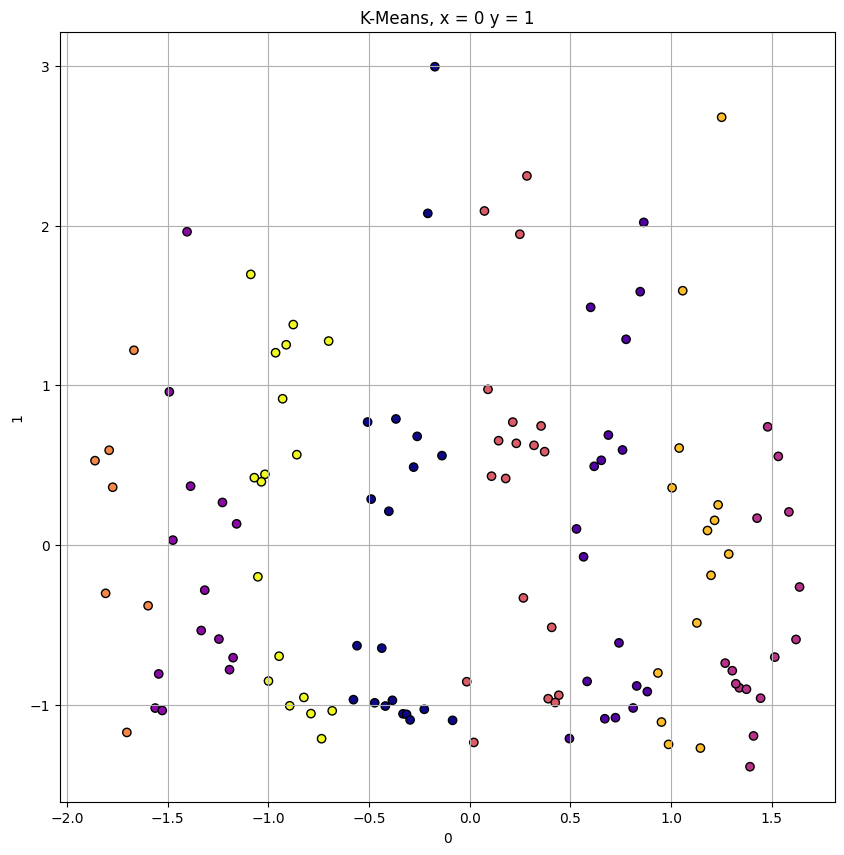

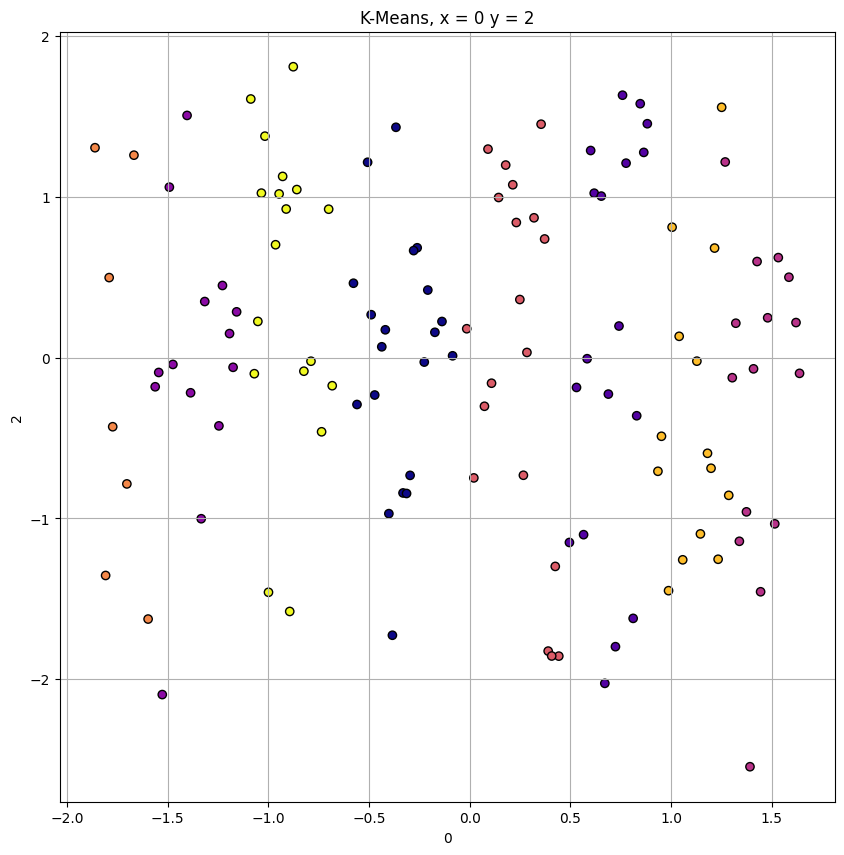

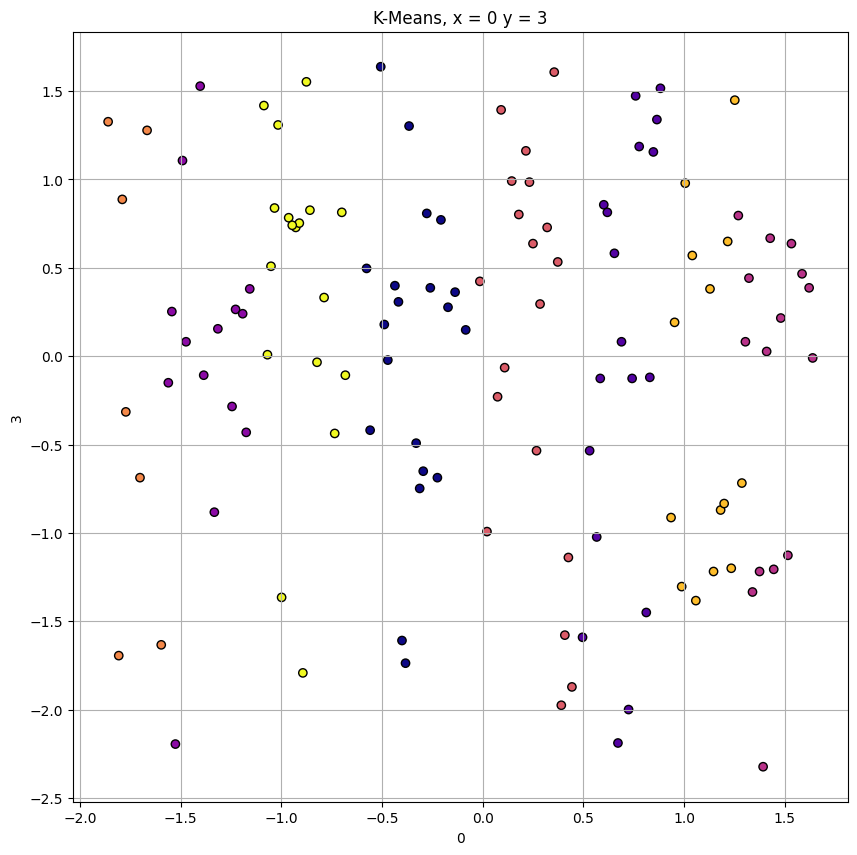

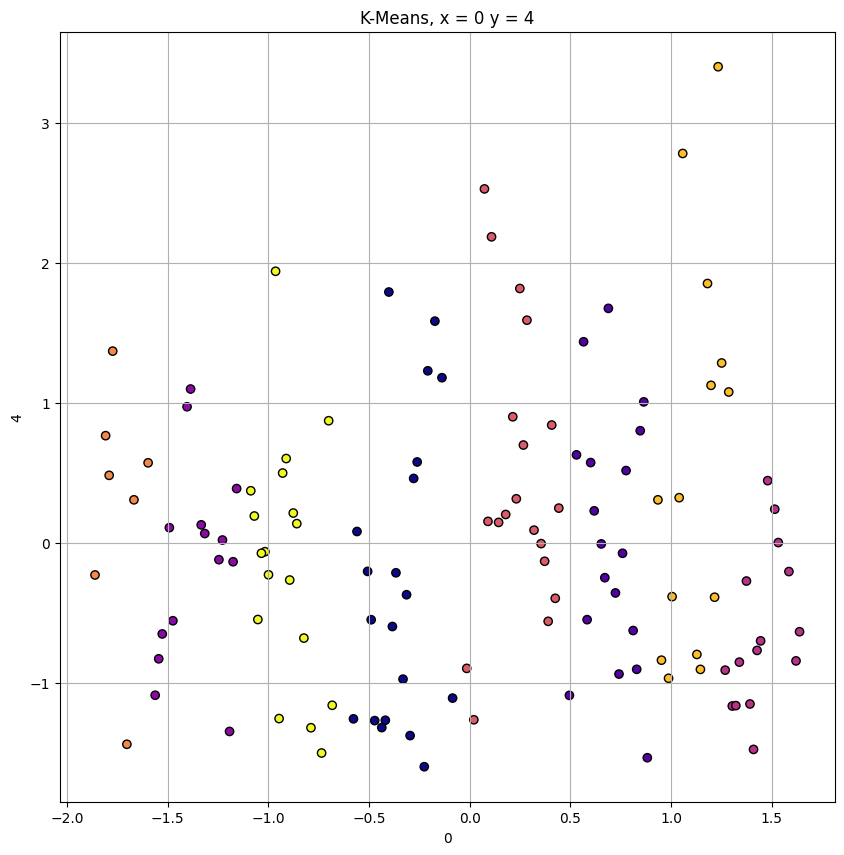

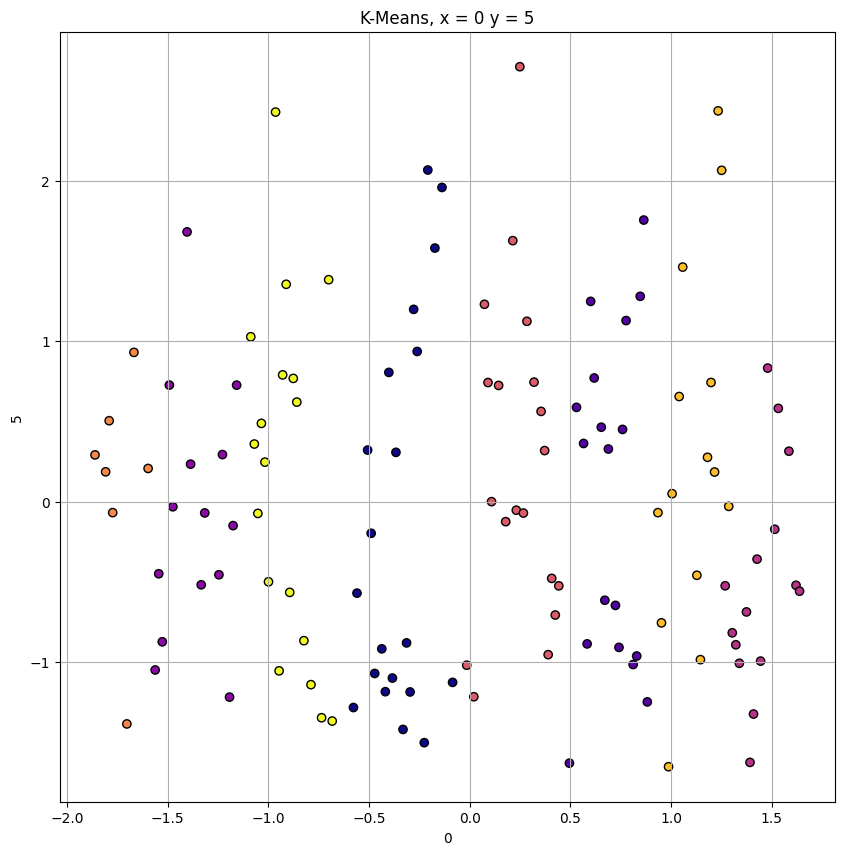

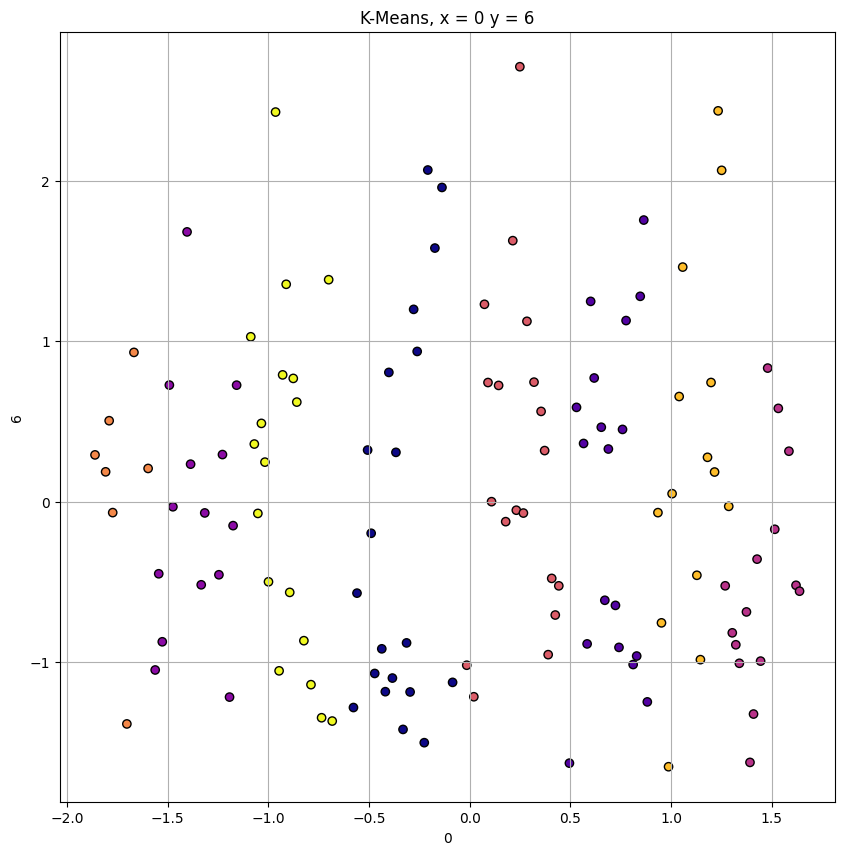

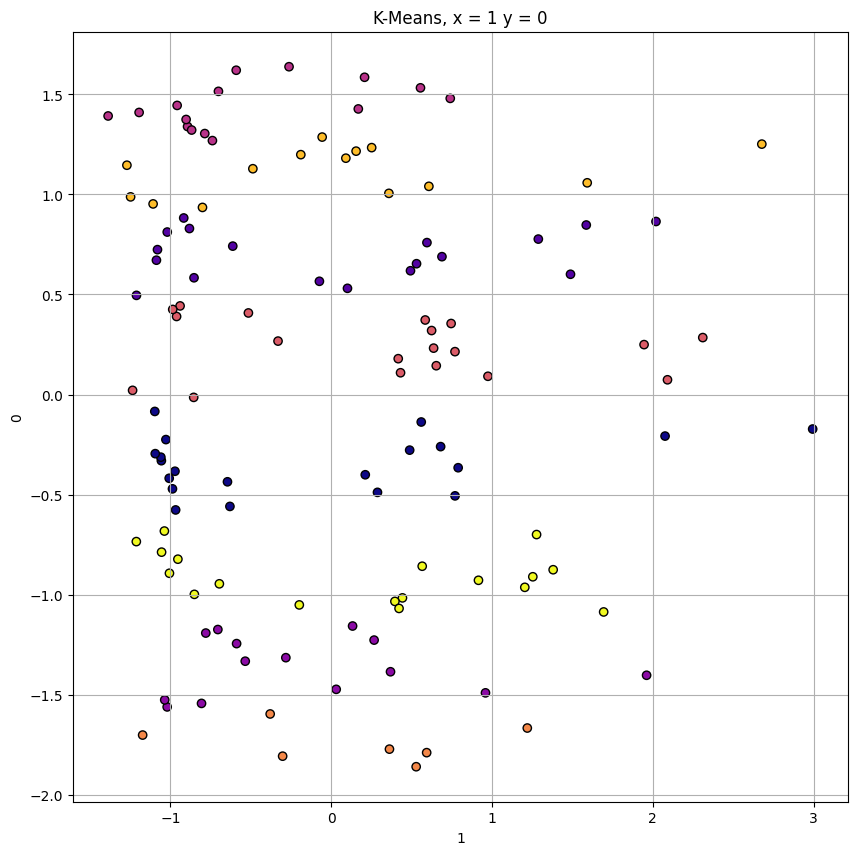

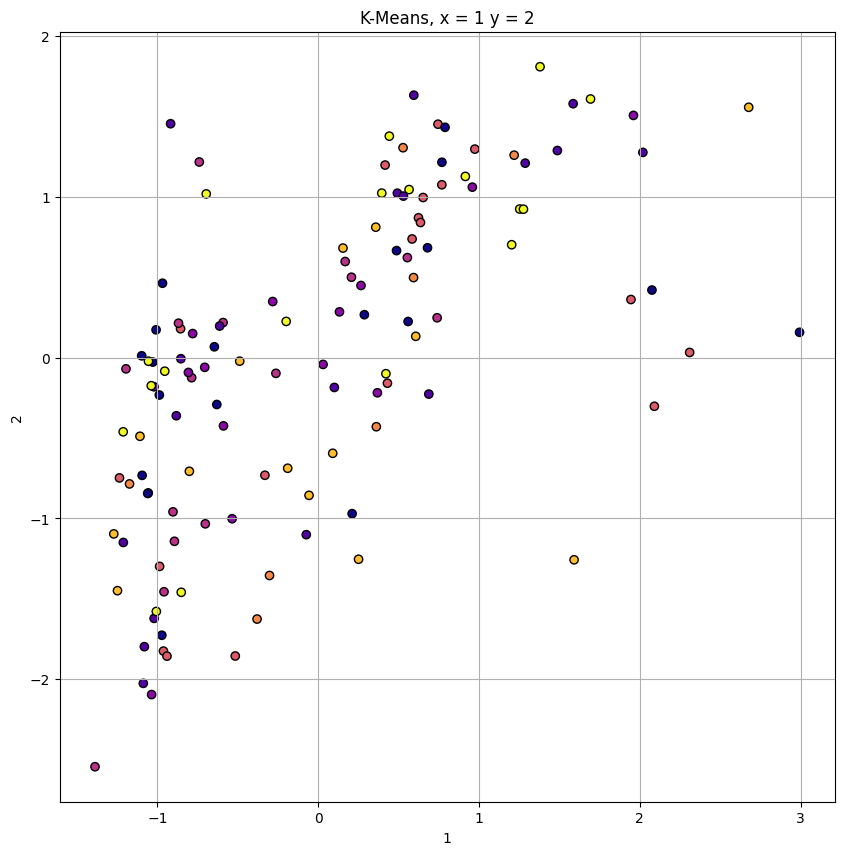

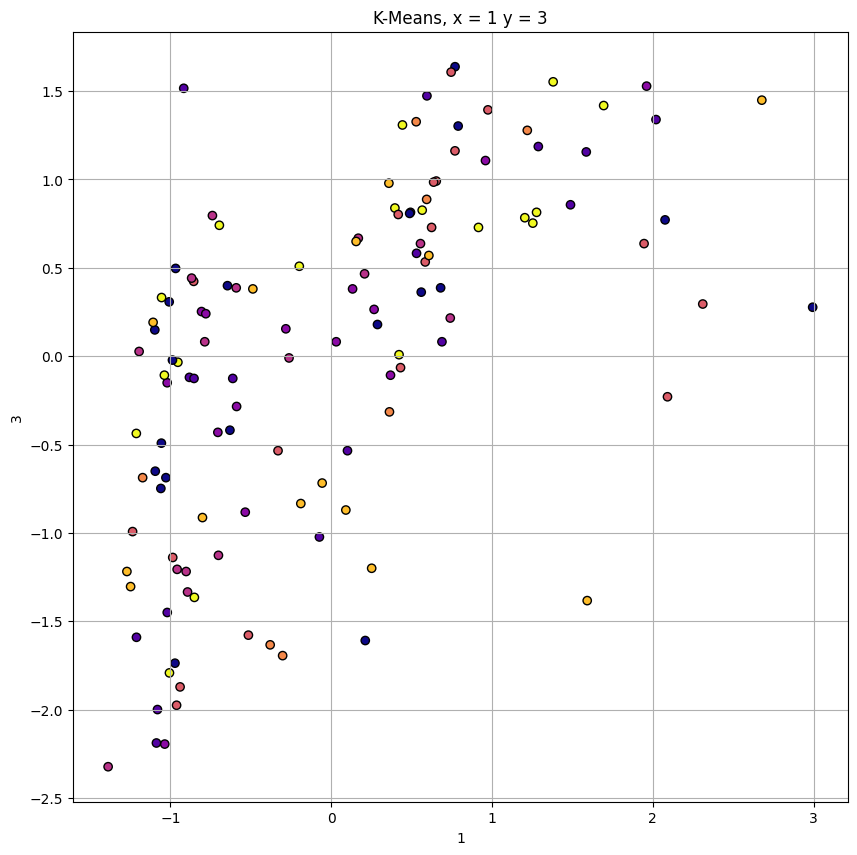

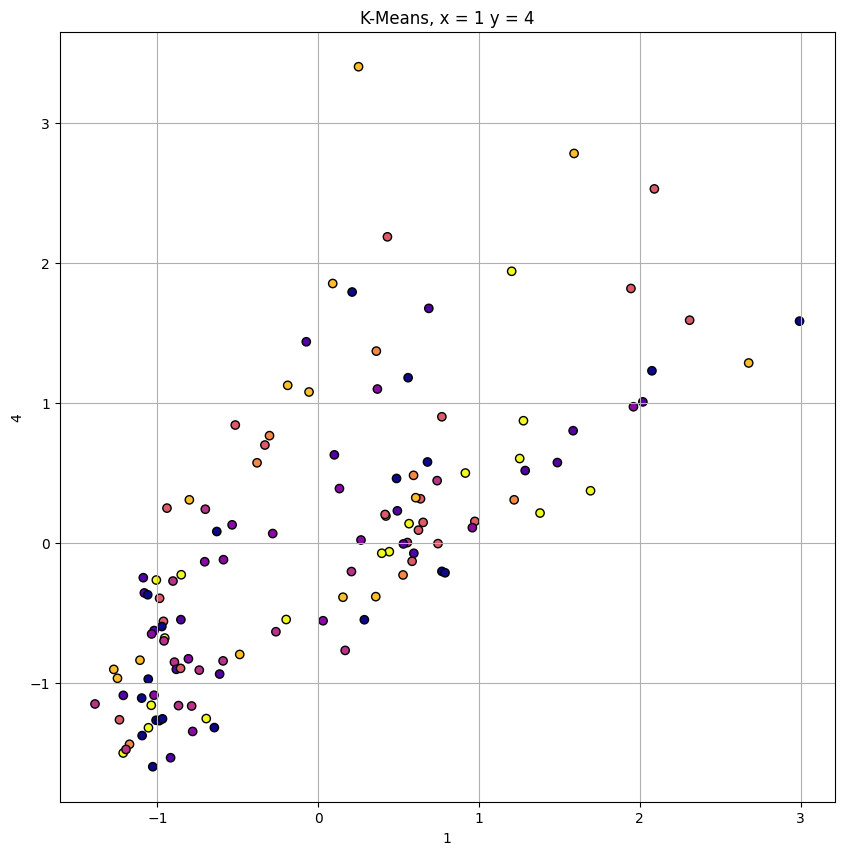

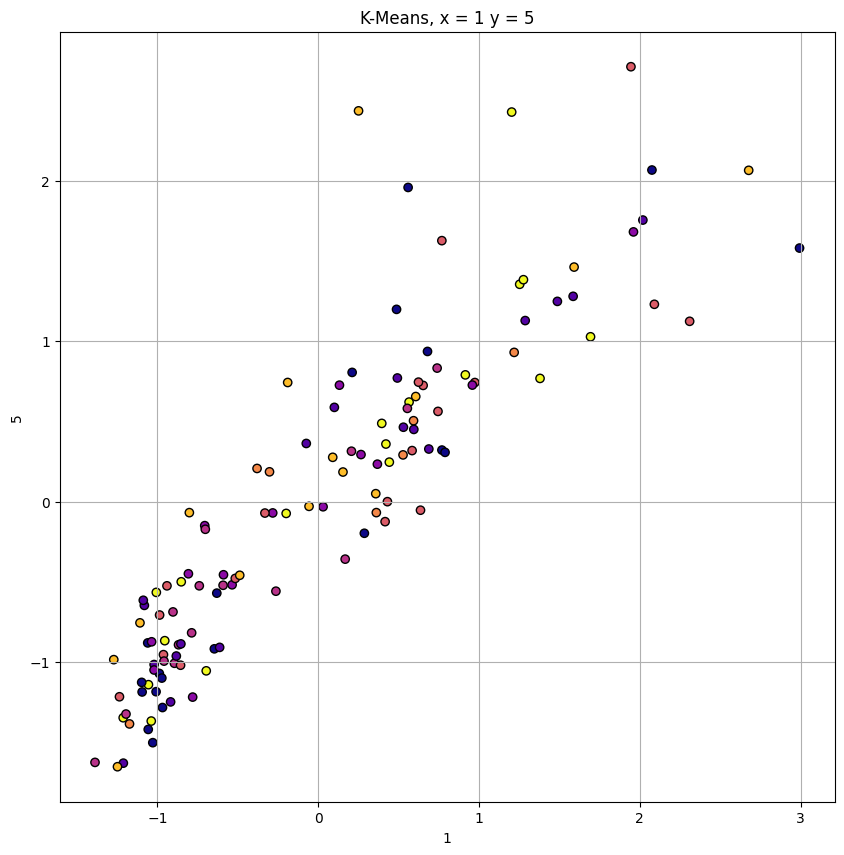

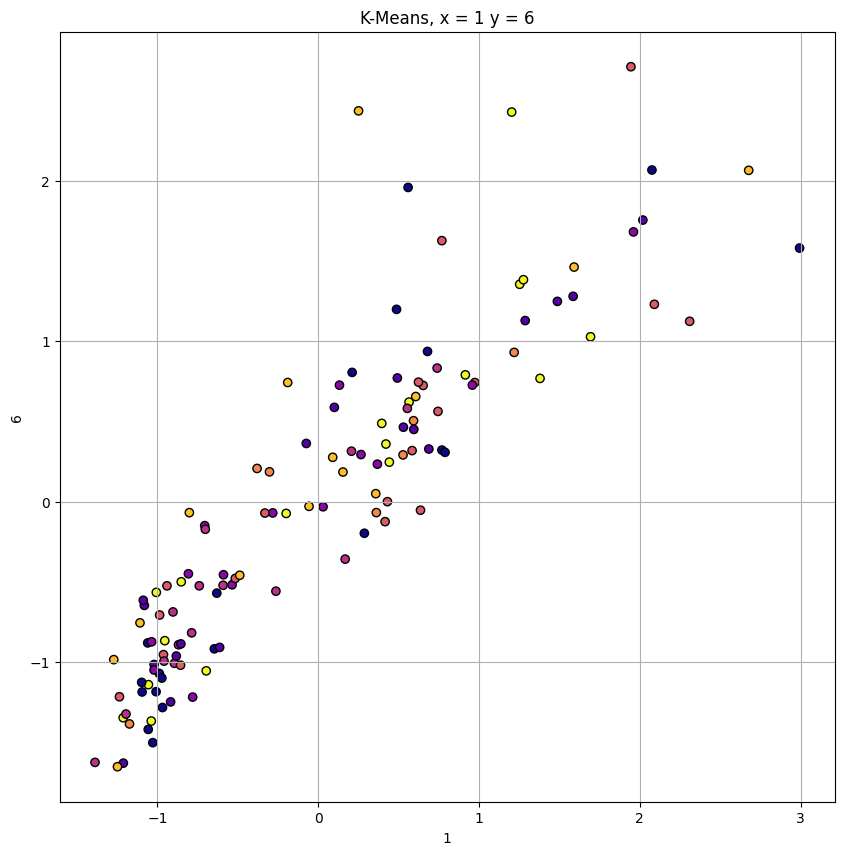

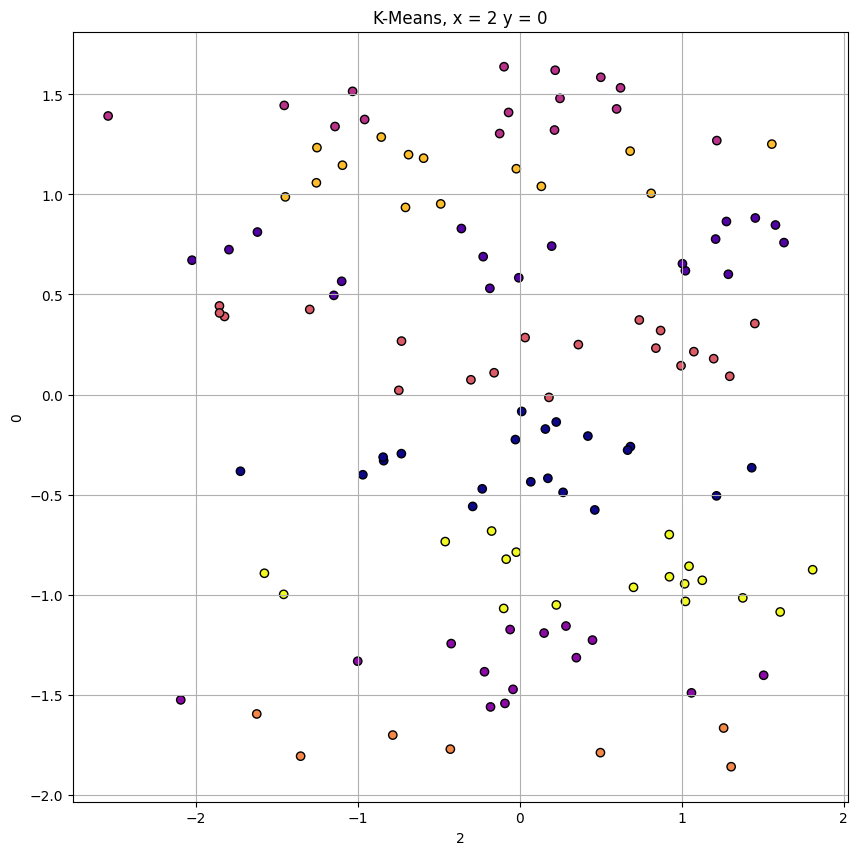

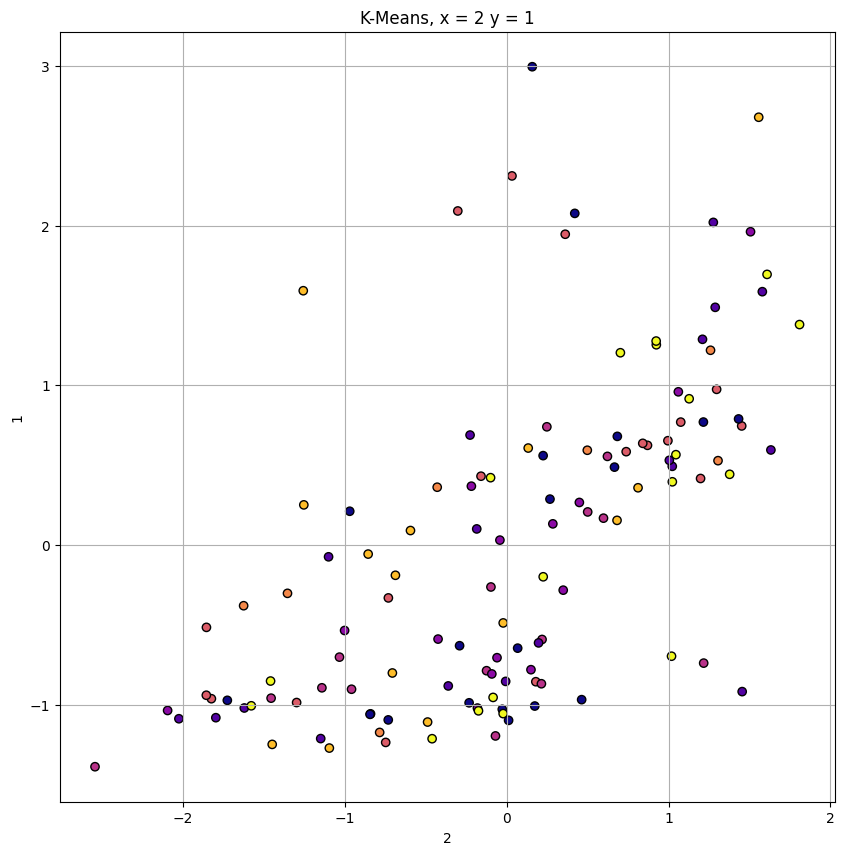

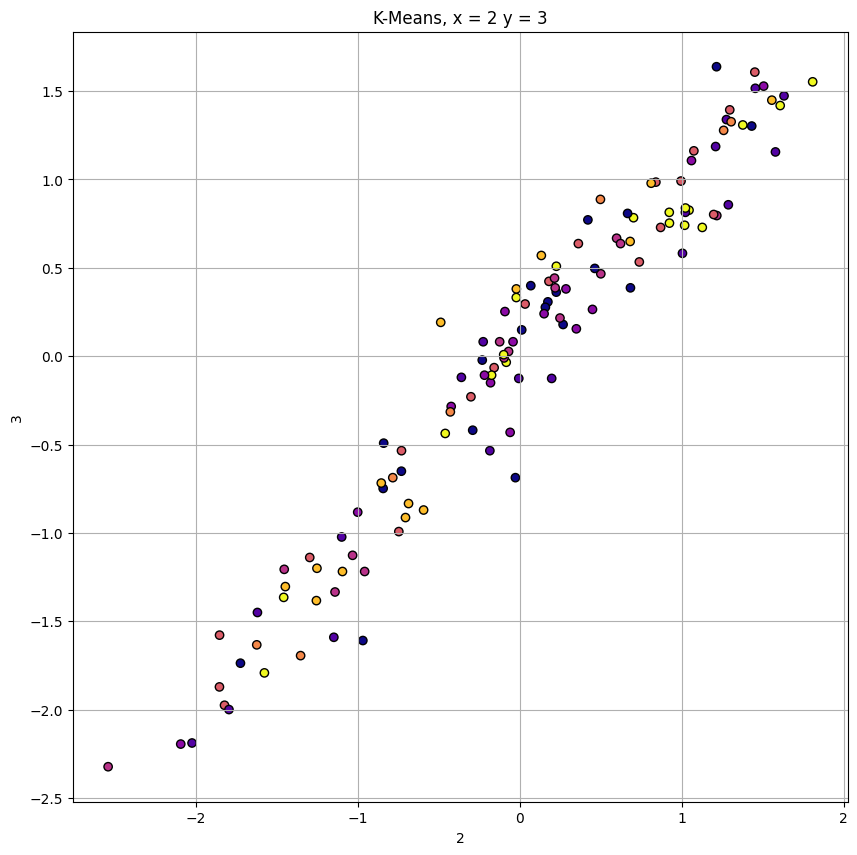

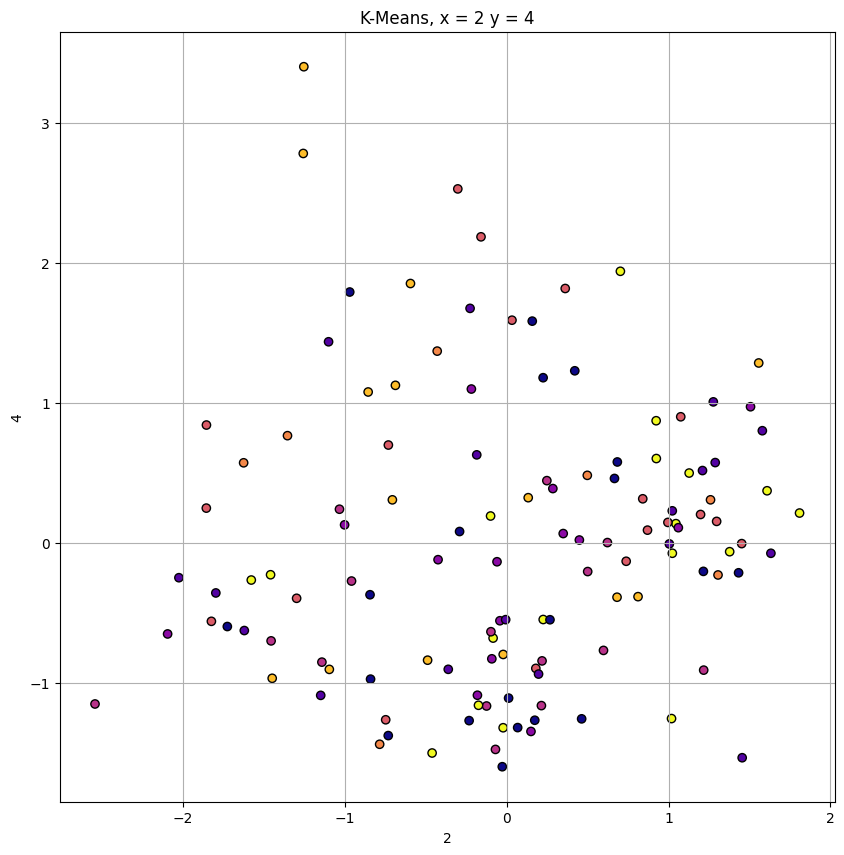

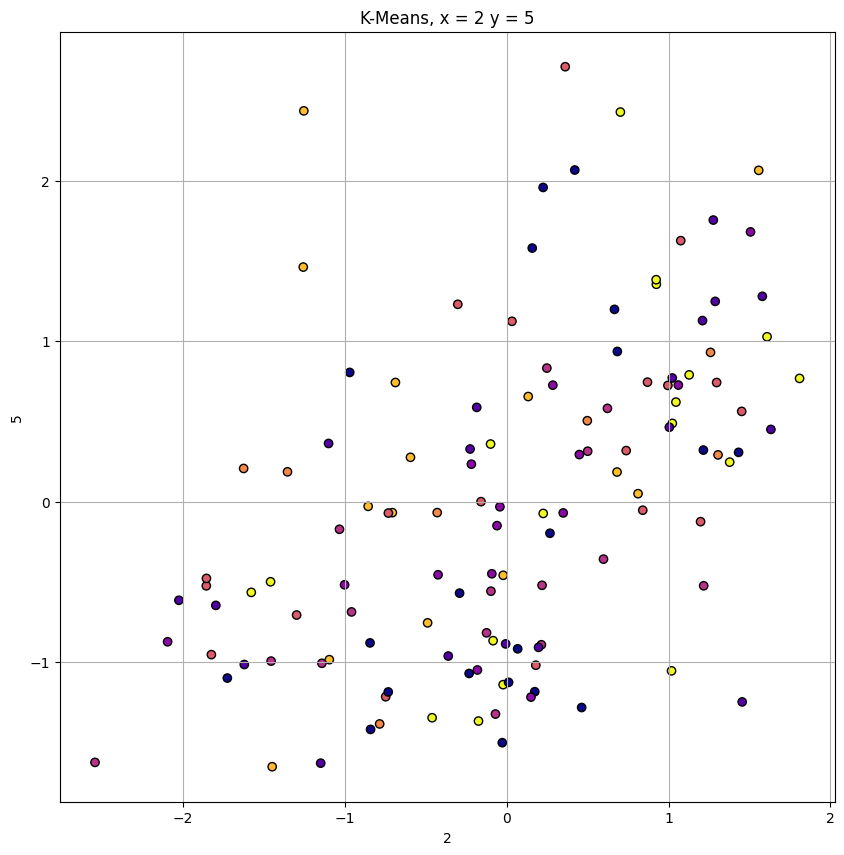

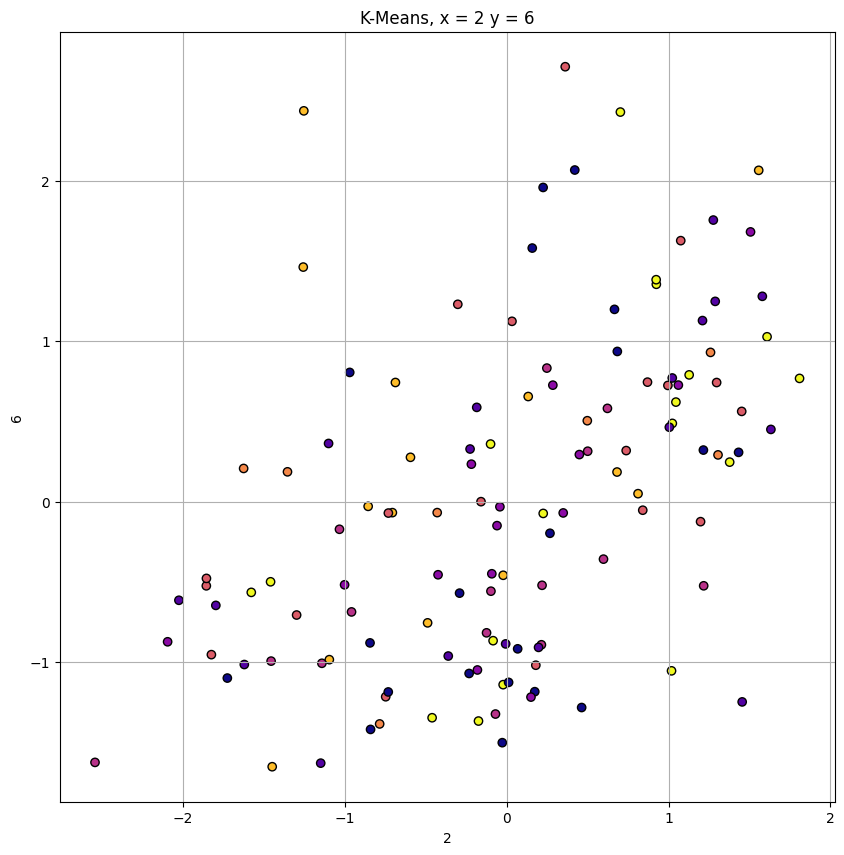

In [50]:
for i in range(0,3):
    for j in range(0,len(df.columns)):
        if i != j:
            plt.figure(figsize=(10,10))
            plt.scatter(df_scal[:,i],df_scal[:,j],c=kmean_labels,cmap='plasma',marker="o",edgecolors="black") # all rows of the column indicated by the number
            plt.grid(True)
            plt.xlabel(f"{i}")
            plt.ylabel(f"{j}")
            plt.title(f"K-Means, x = {i} y = {j}")
            plt.show()

### DBSCAN

In [36]:
dbscan = DBSCAN(eps=1).fit(df_scal)
dbscan_labels = dbscan.labels_

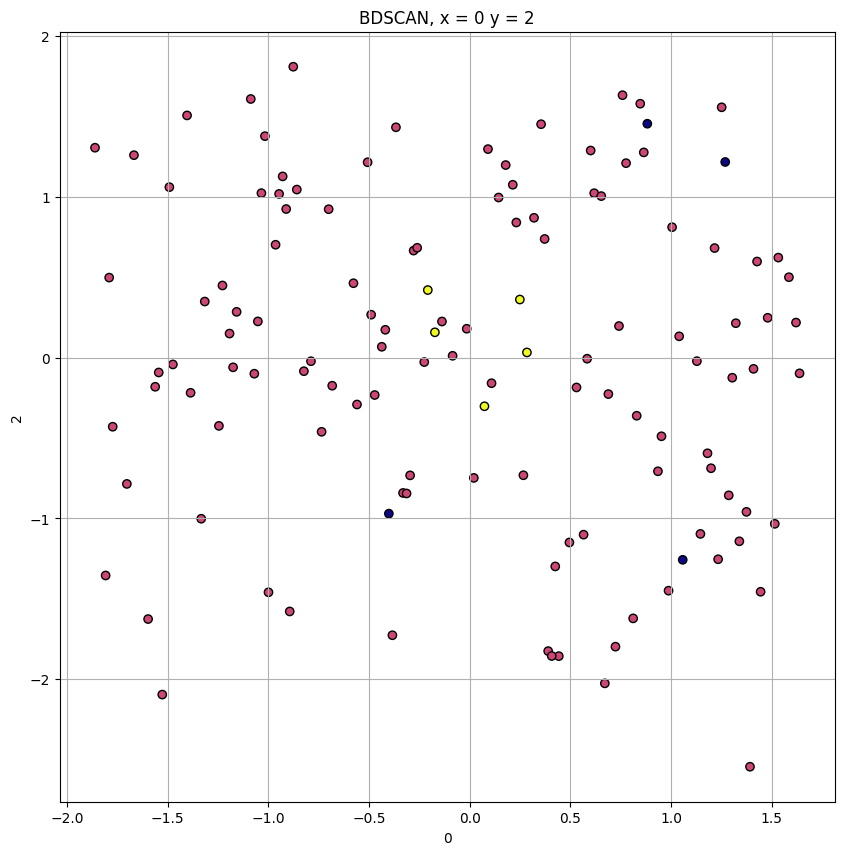

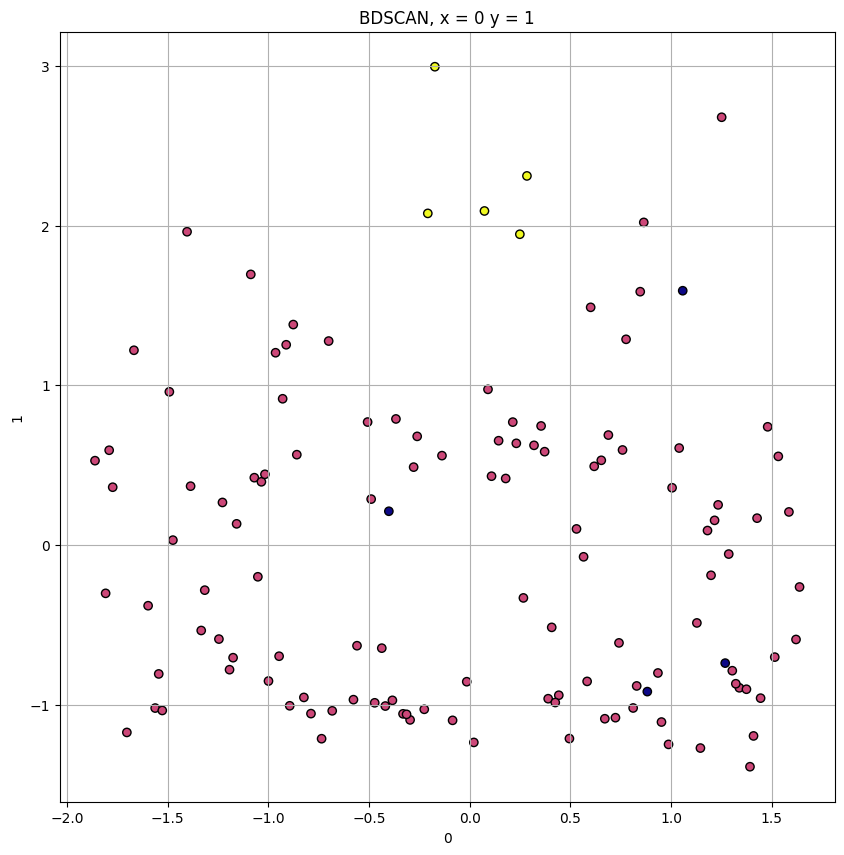

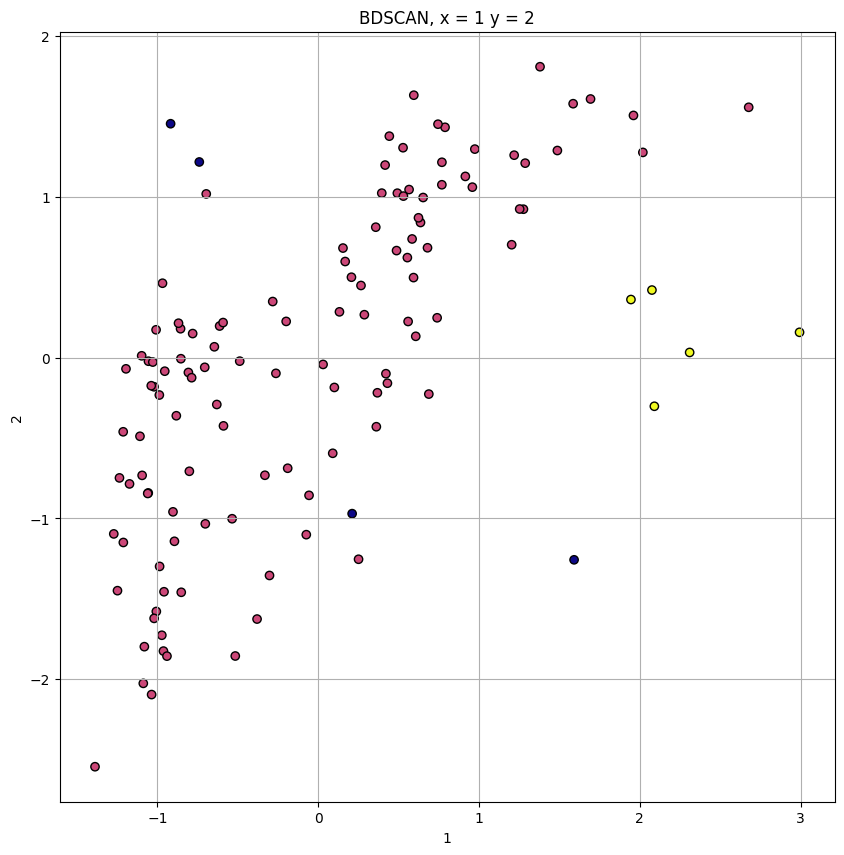

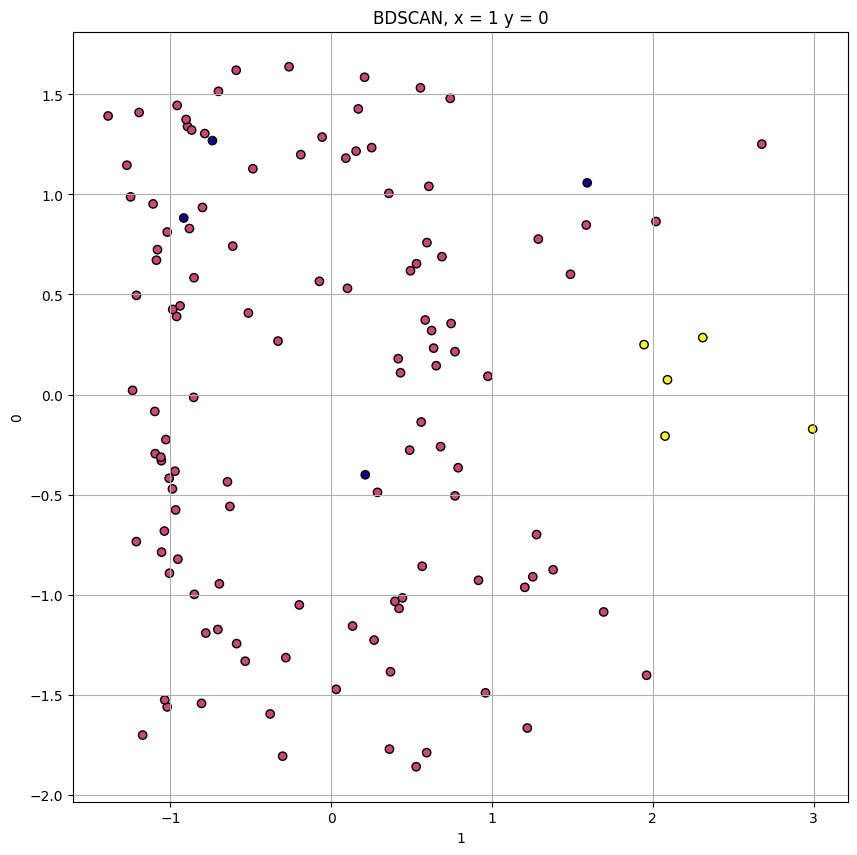

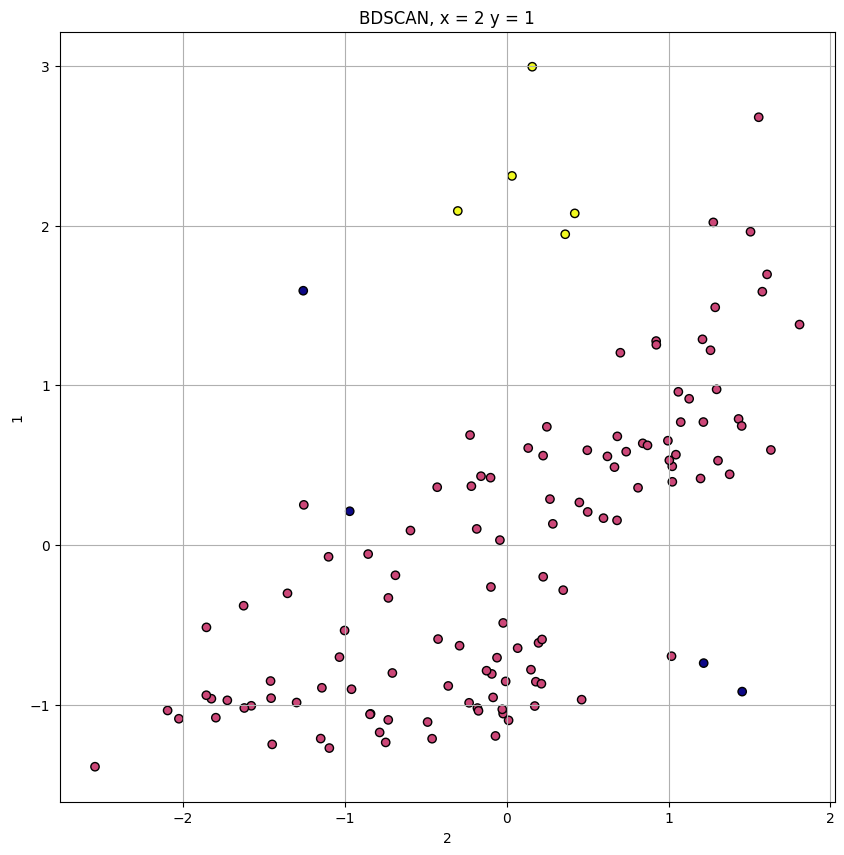

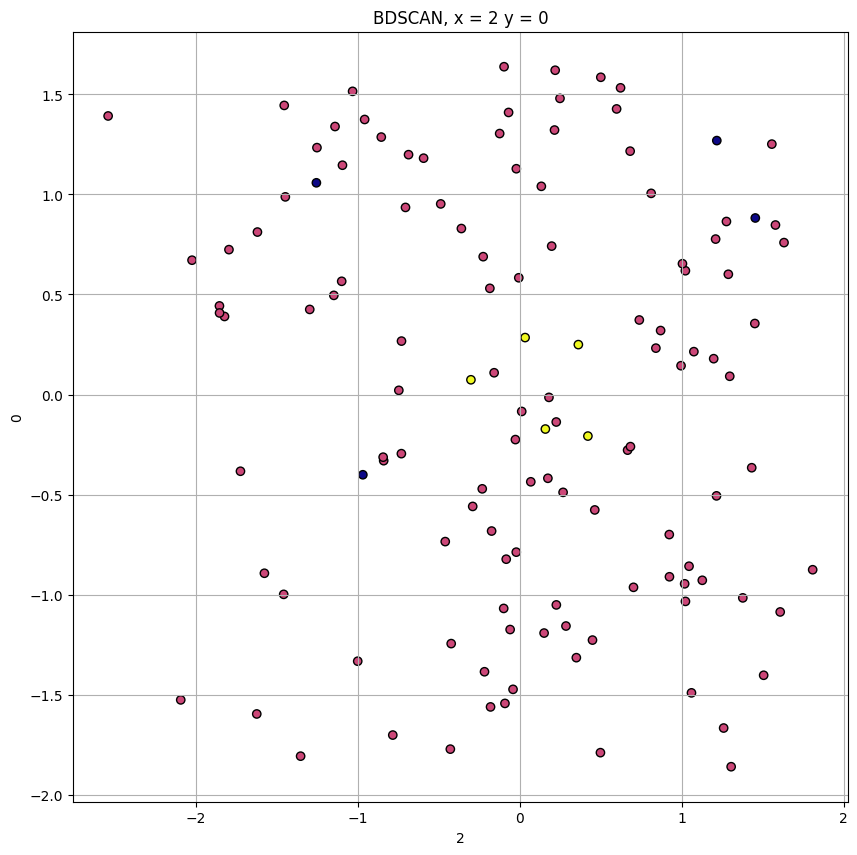

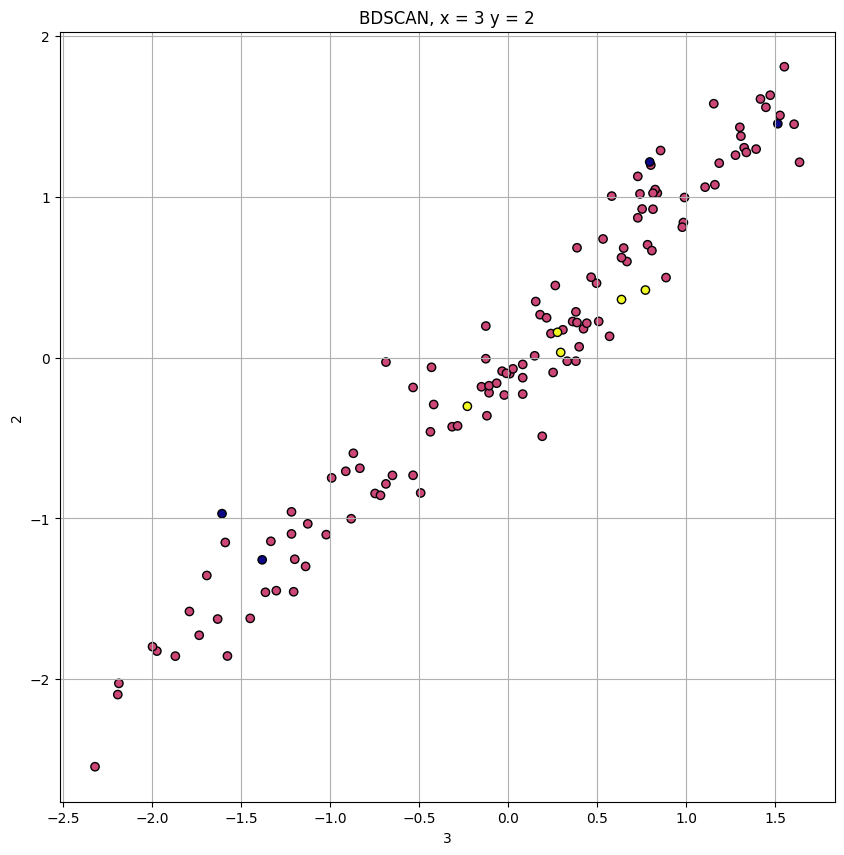

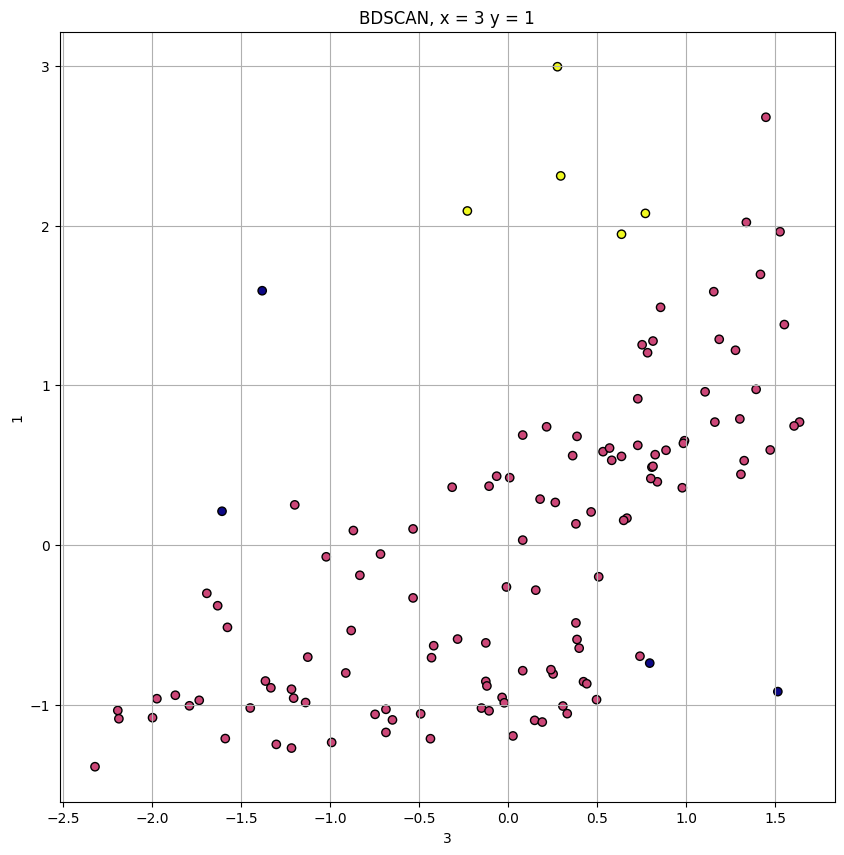

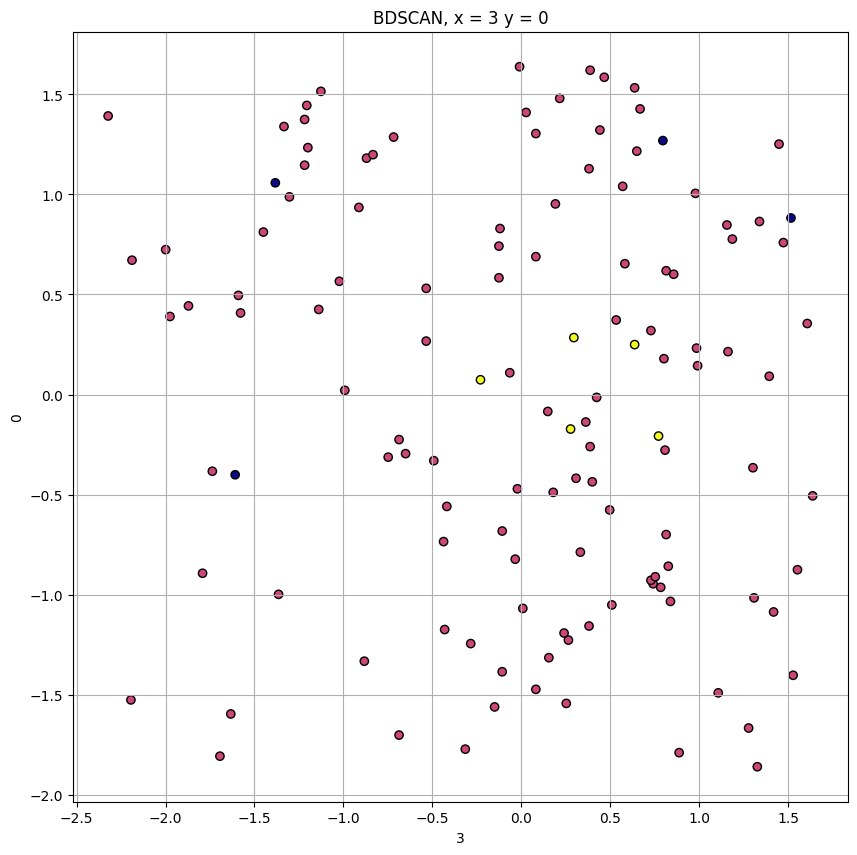

In [37]:
for i in range(0,4):
    for j in range(0,len(df.columns)):
        if i != j:
            plt.figure(figsize=(10,10))
            plt.scatter(df_scal[:,i],df_scal[:,j],c=dbscan_labels,cmap='plasma',marker="o",edgecolors="black") # all rows of the column indicated by the number
            plt.grid(True)
            plt.xlabel(f"{i}")
            plt.ylabel(f"{j}")
            plt.title(f"BDSCAN, x = {i} y = {j}")
            plt.show()
#0,4

### HDBSCAN

In [38]:
hdbscan = HDBSCAN(min_cluster_size=2).fit(df_scal)
hdbscan_lables = hdbscan.labels_
# hdbs = hdbscan.fit_predict(df_scal)

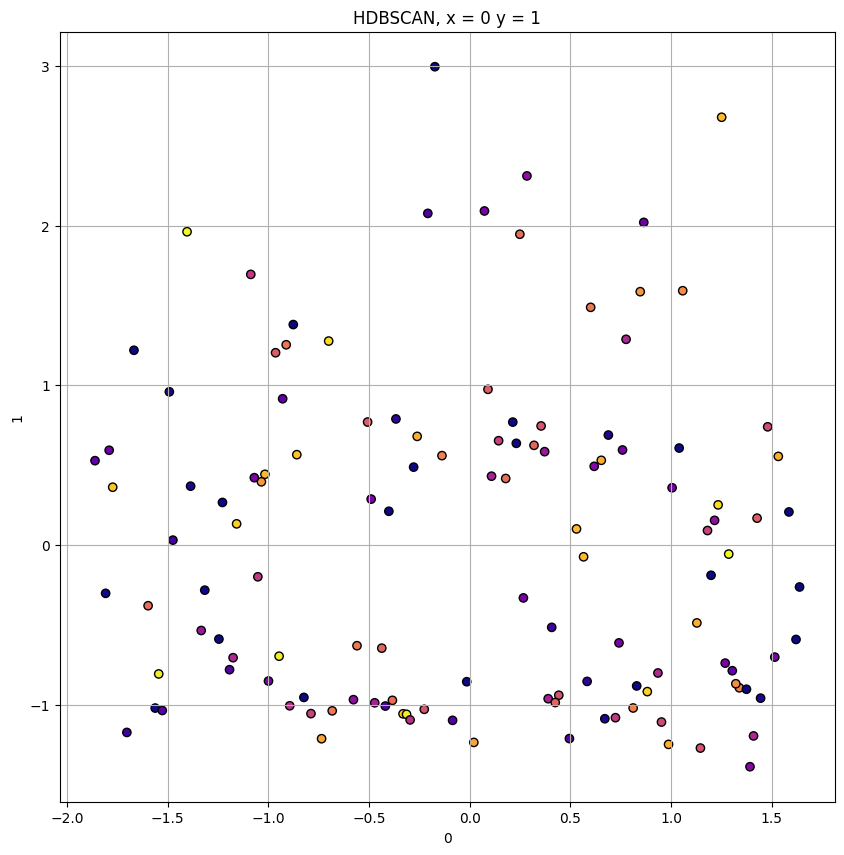

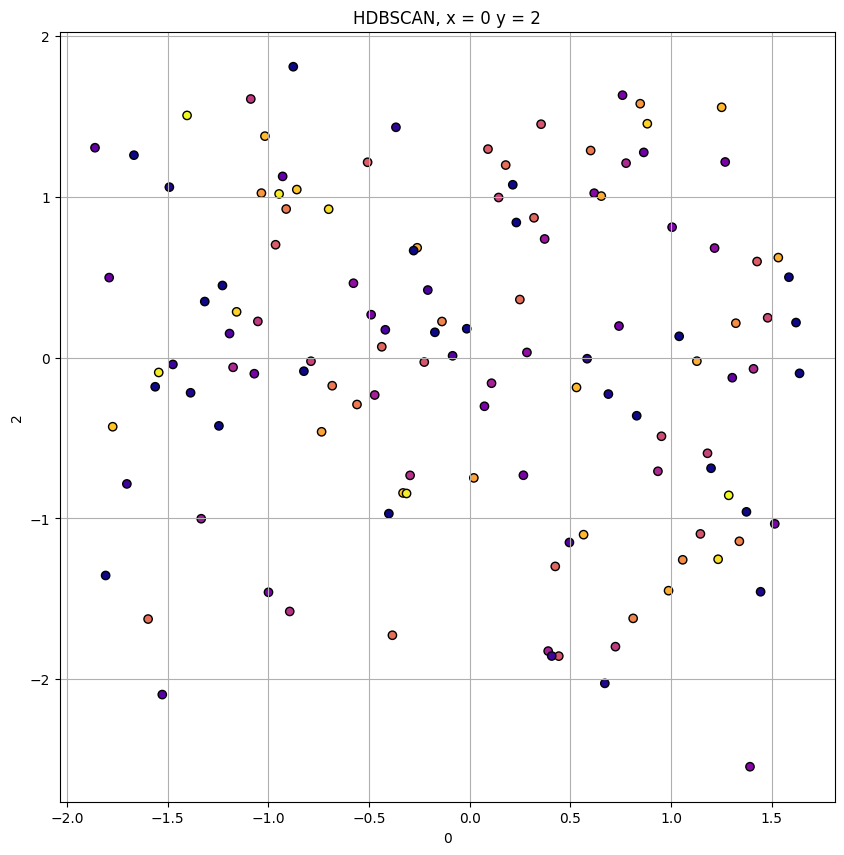

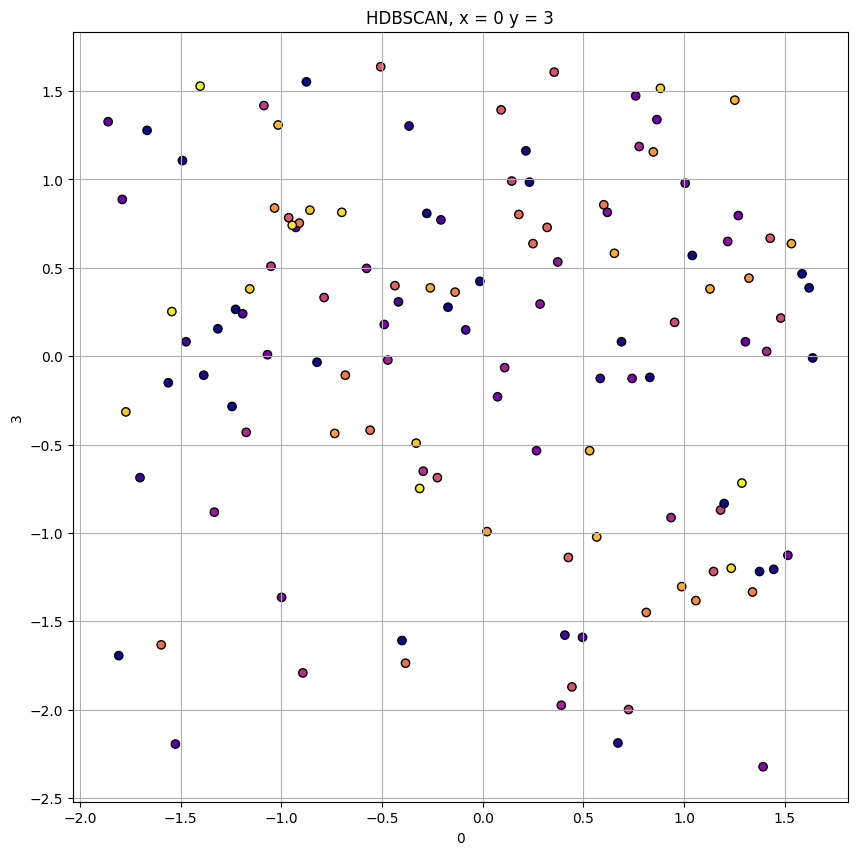

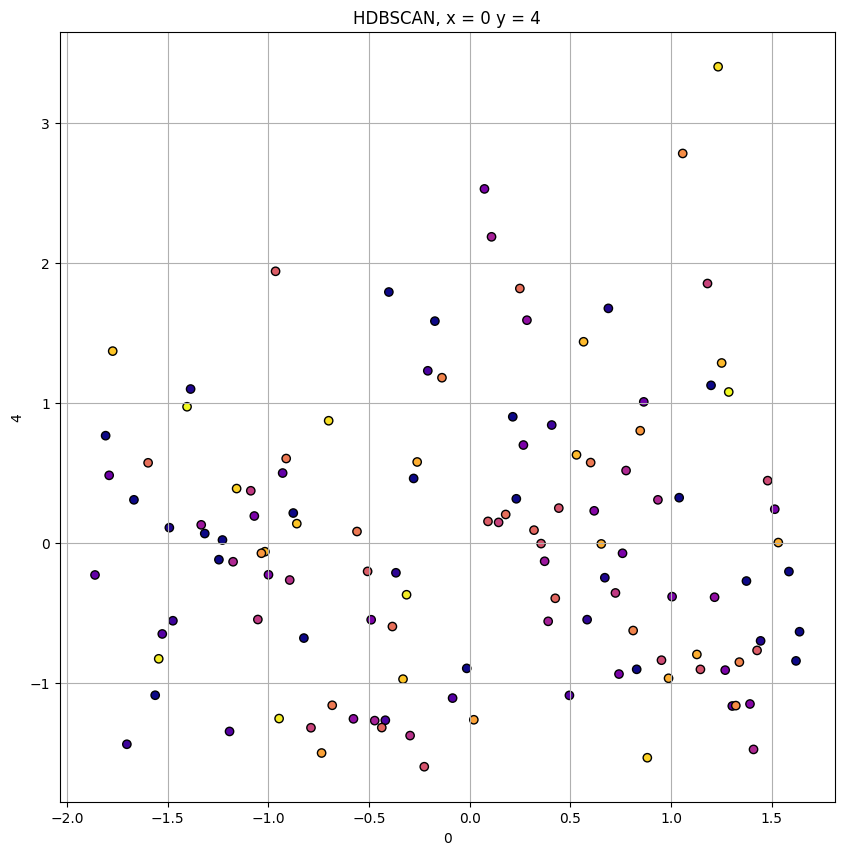

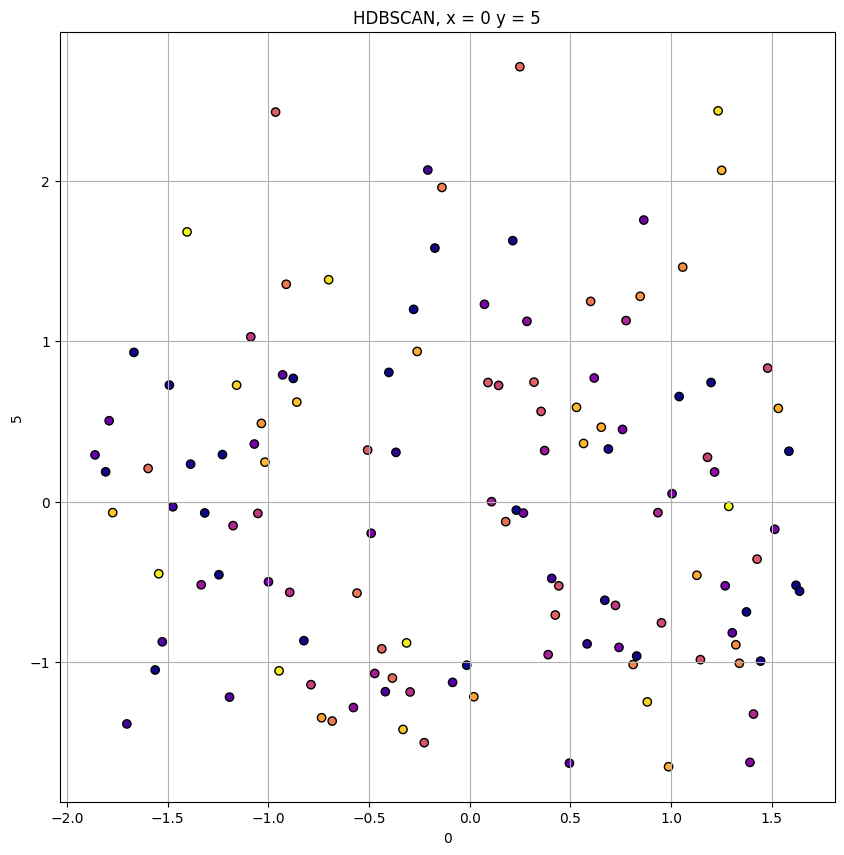

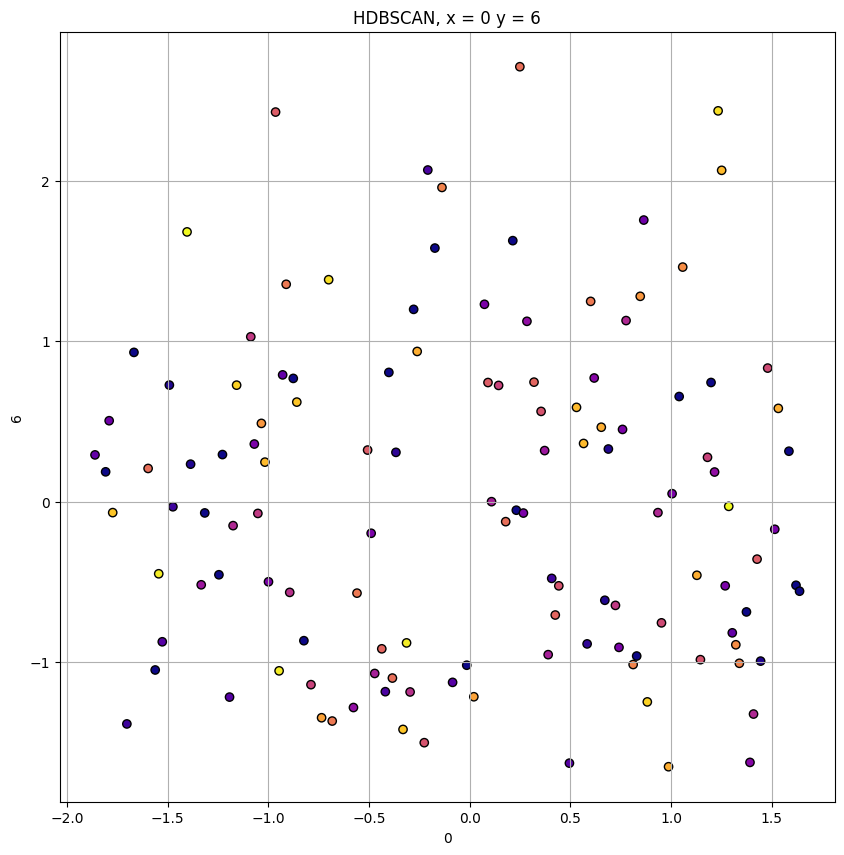

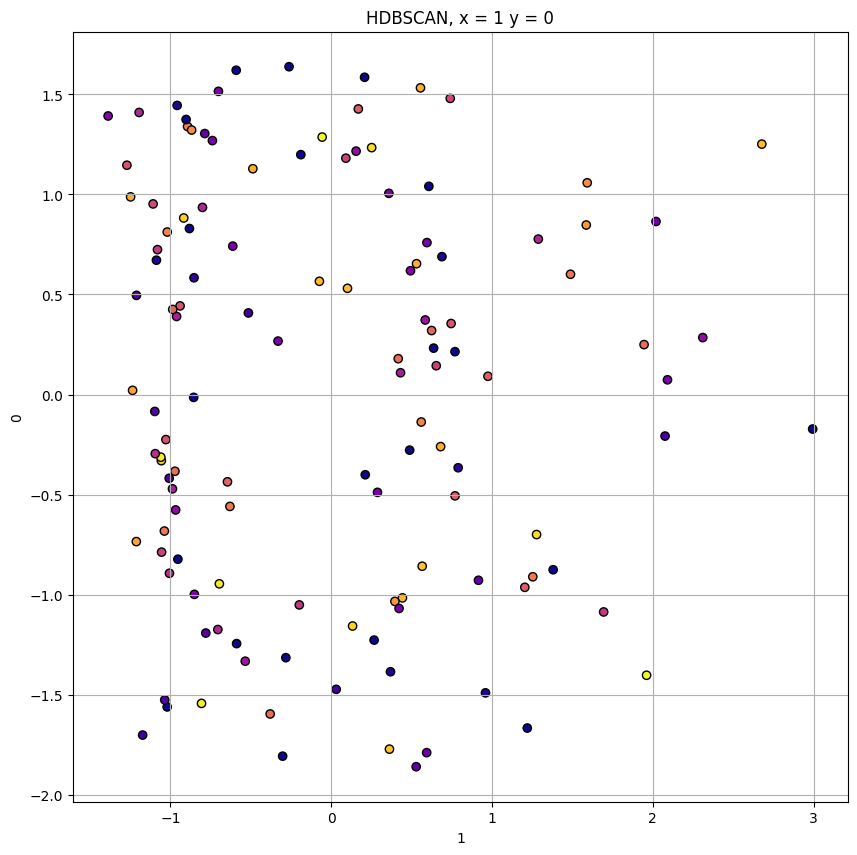

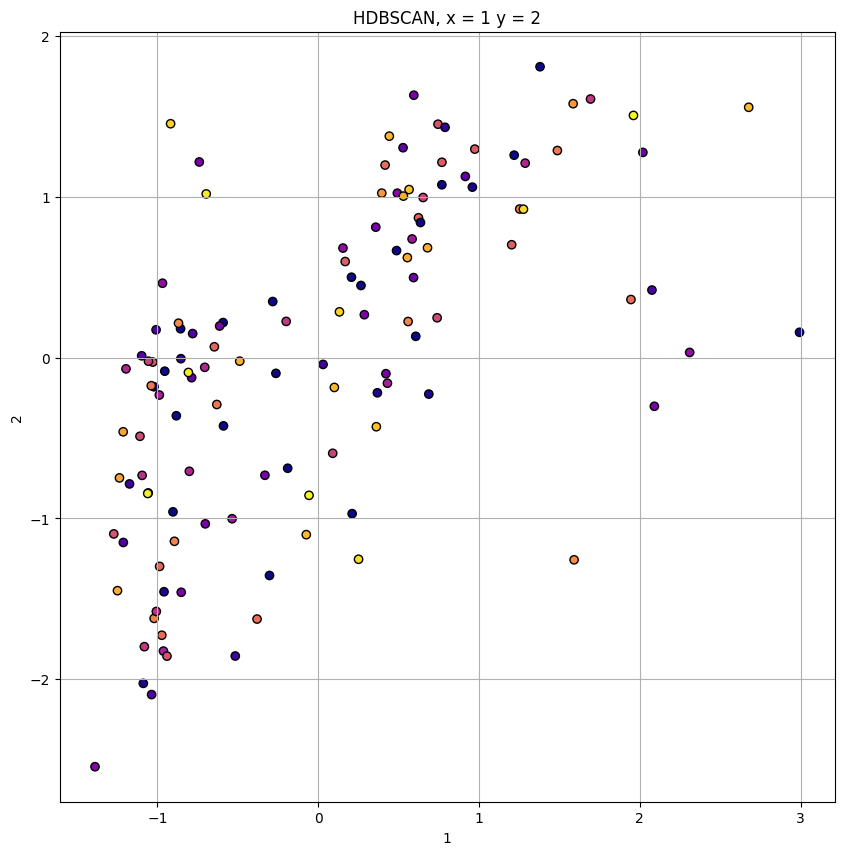

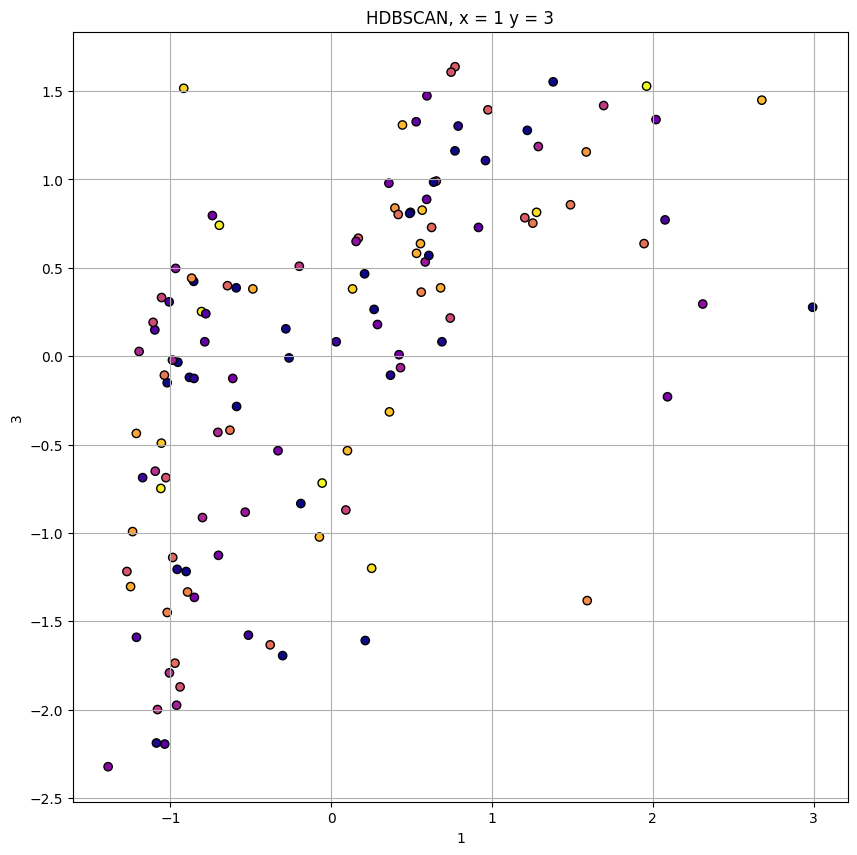

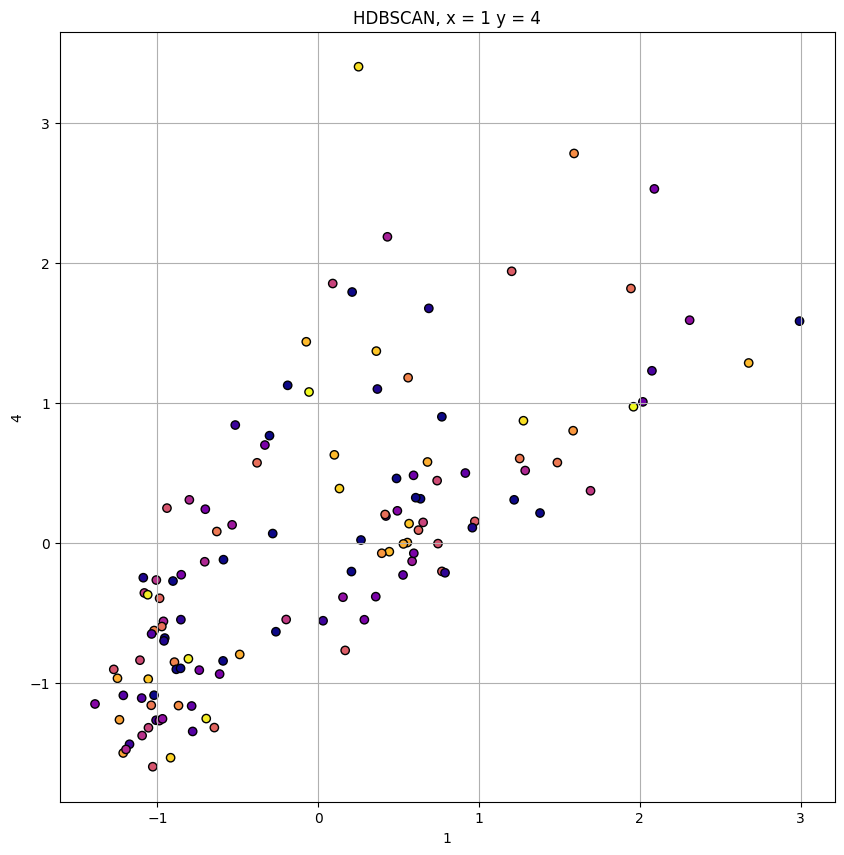

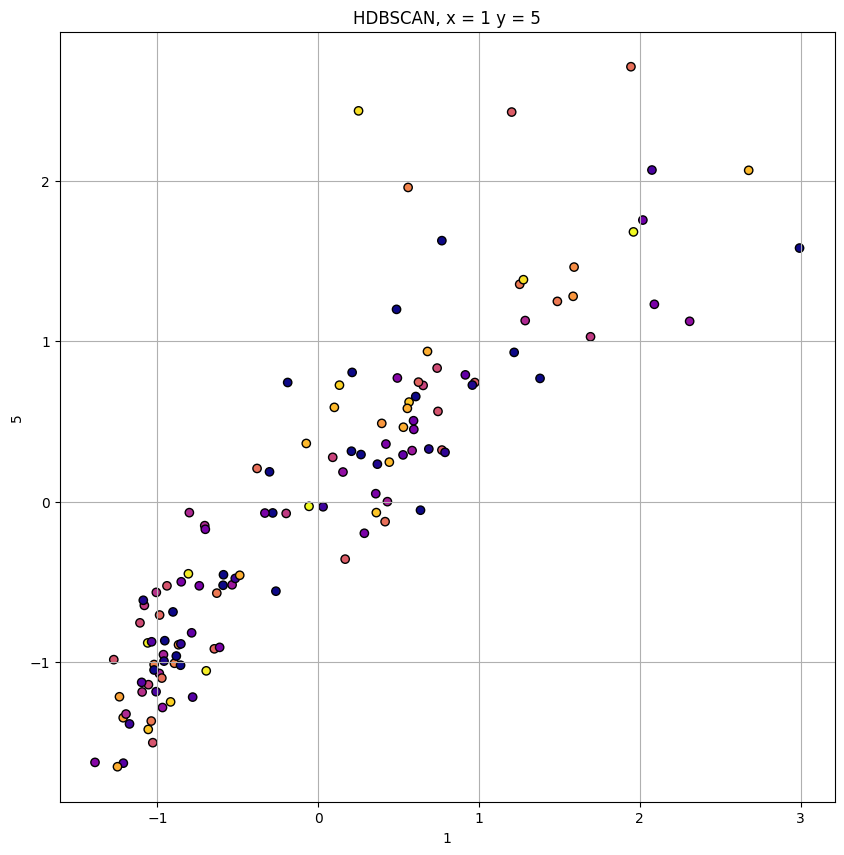

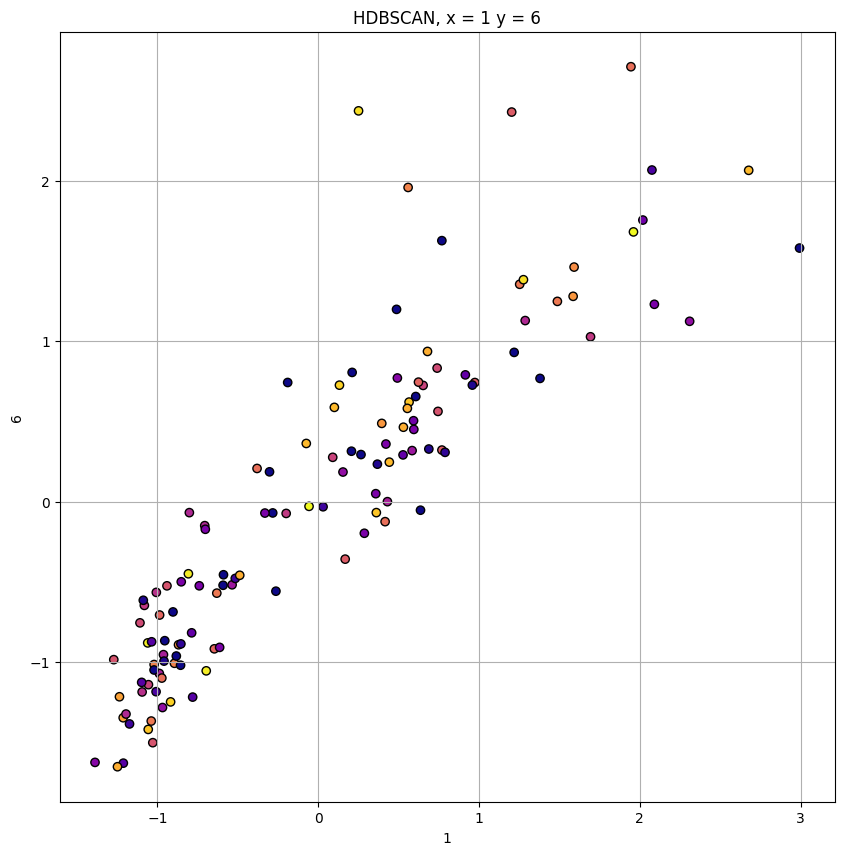

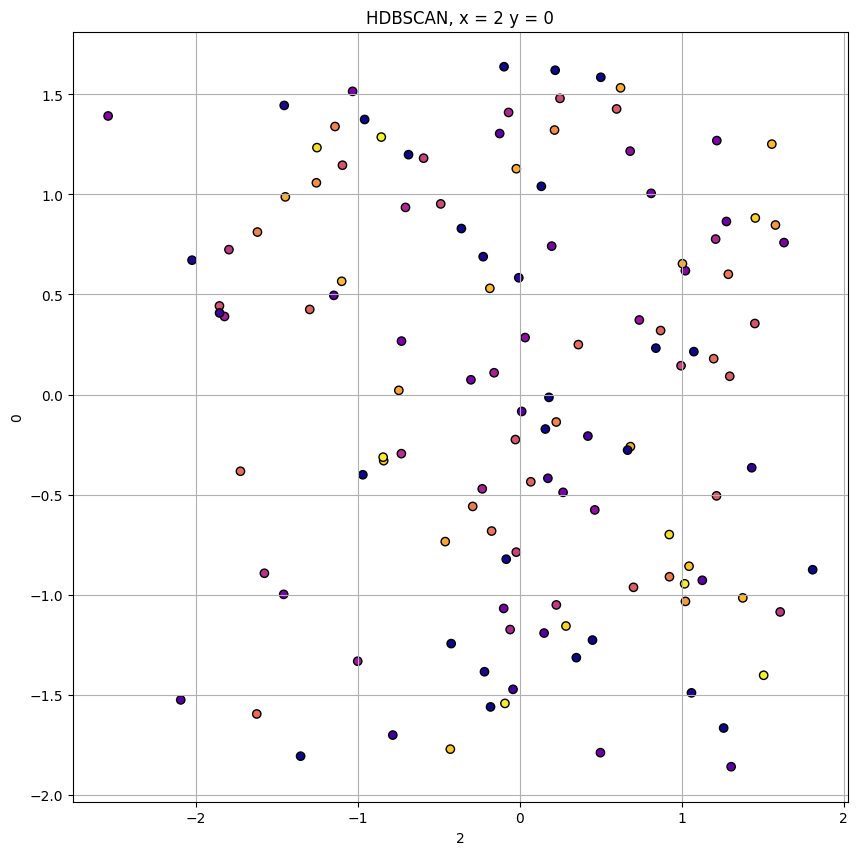

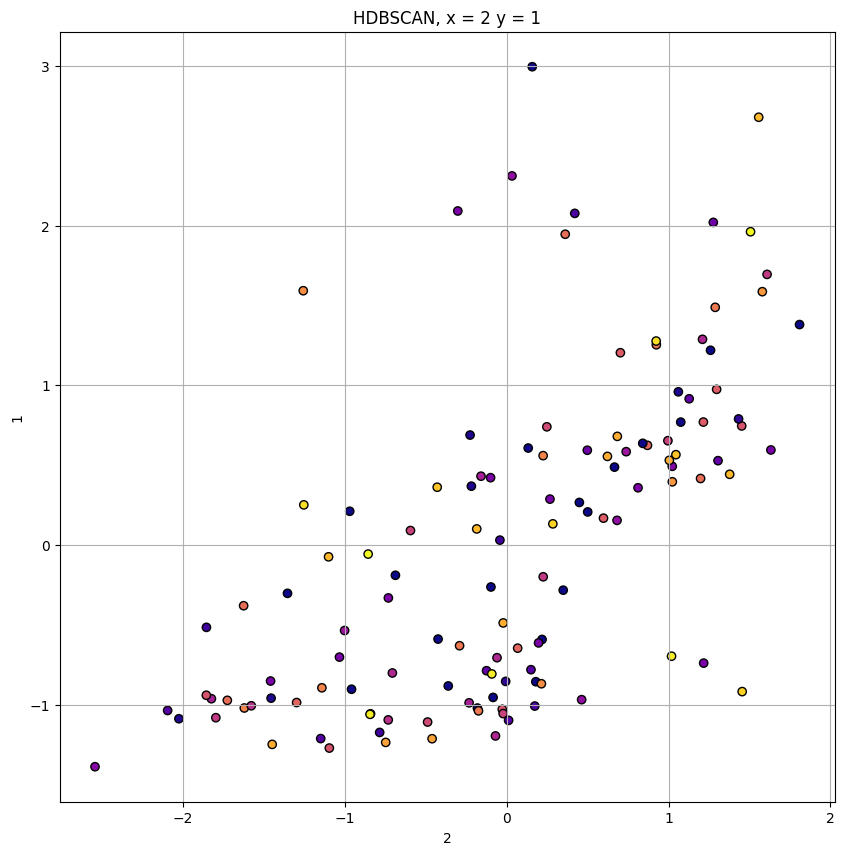

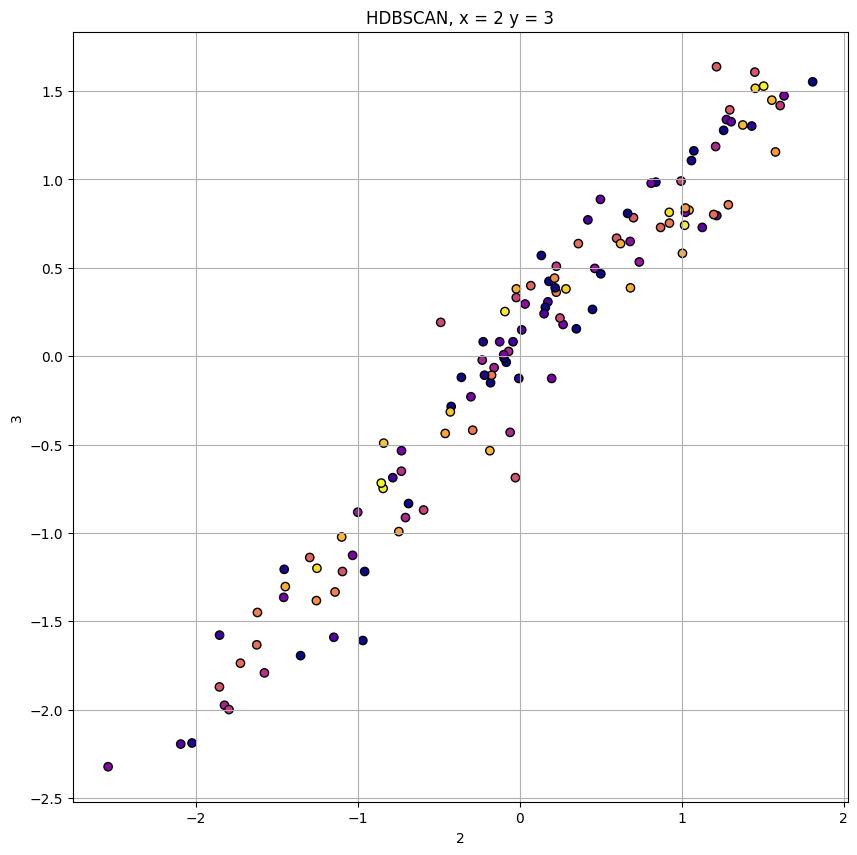

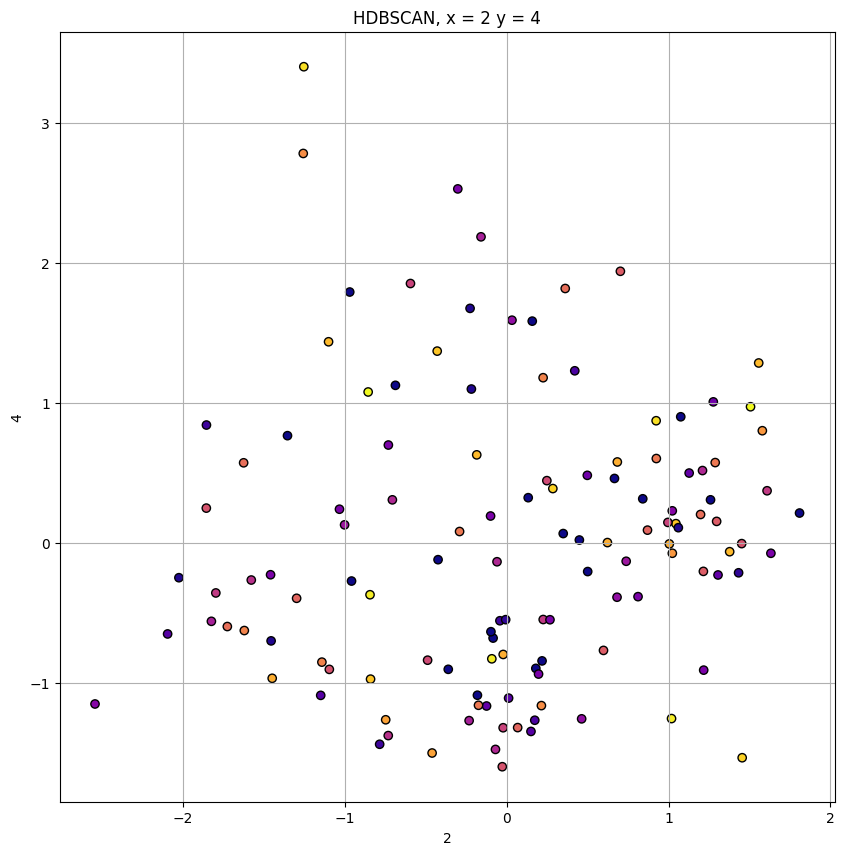

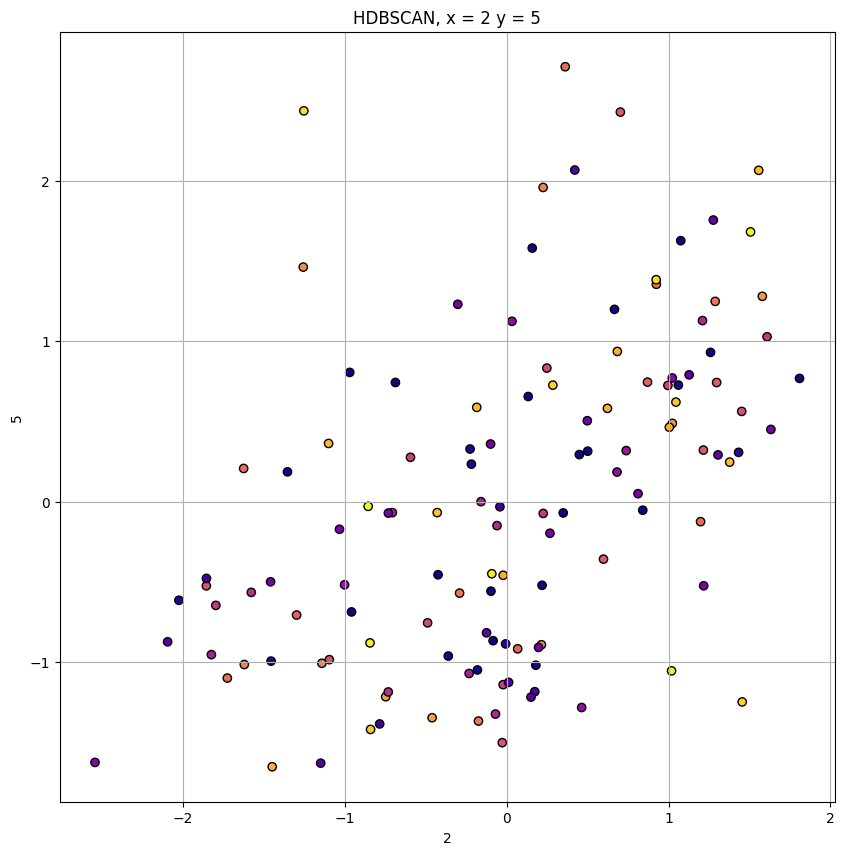

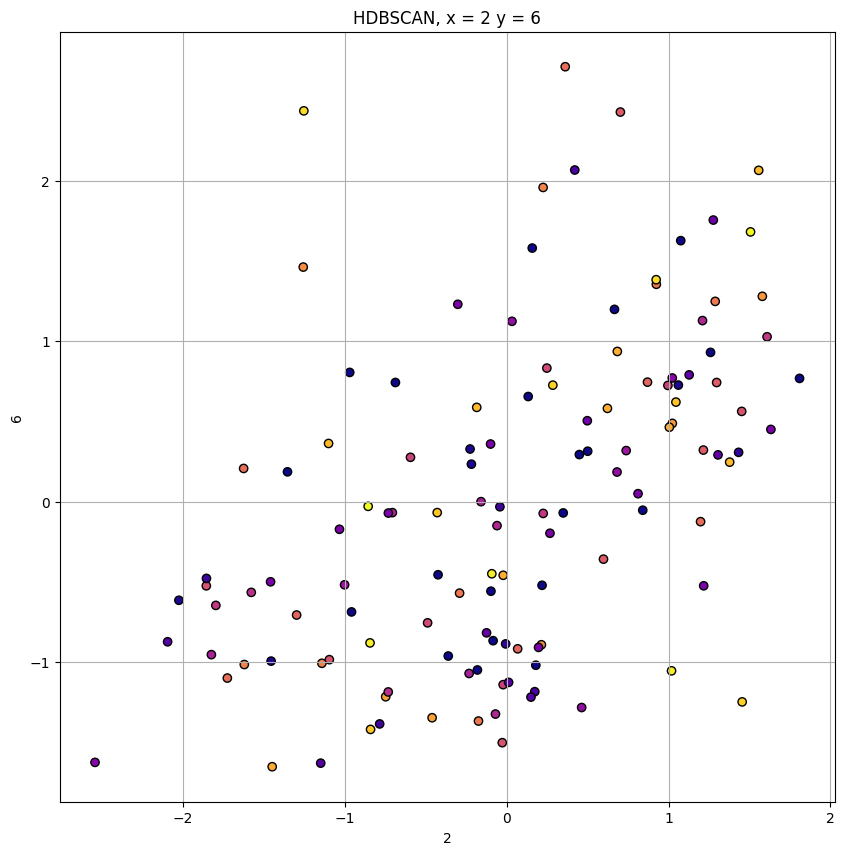

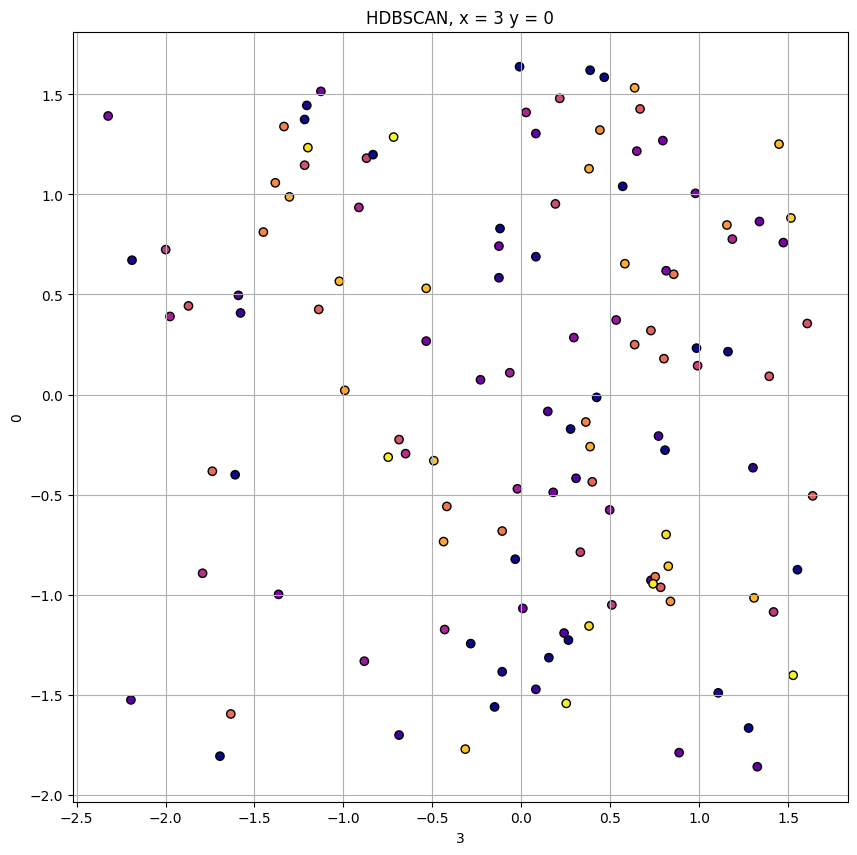

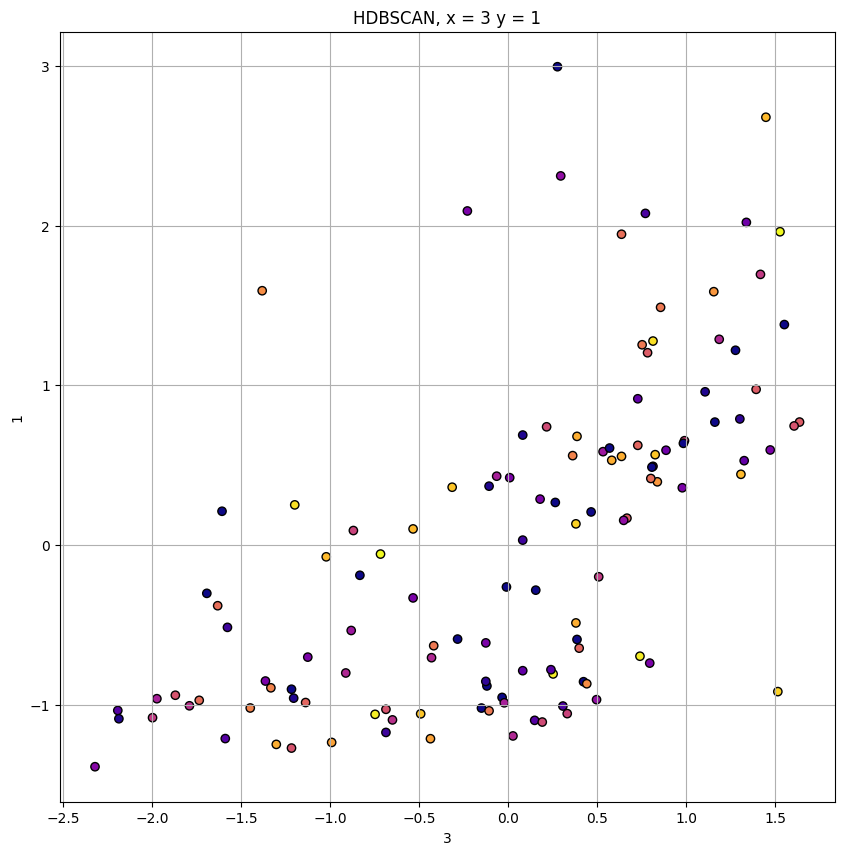

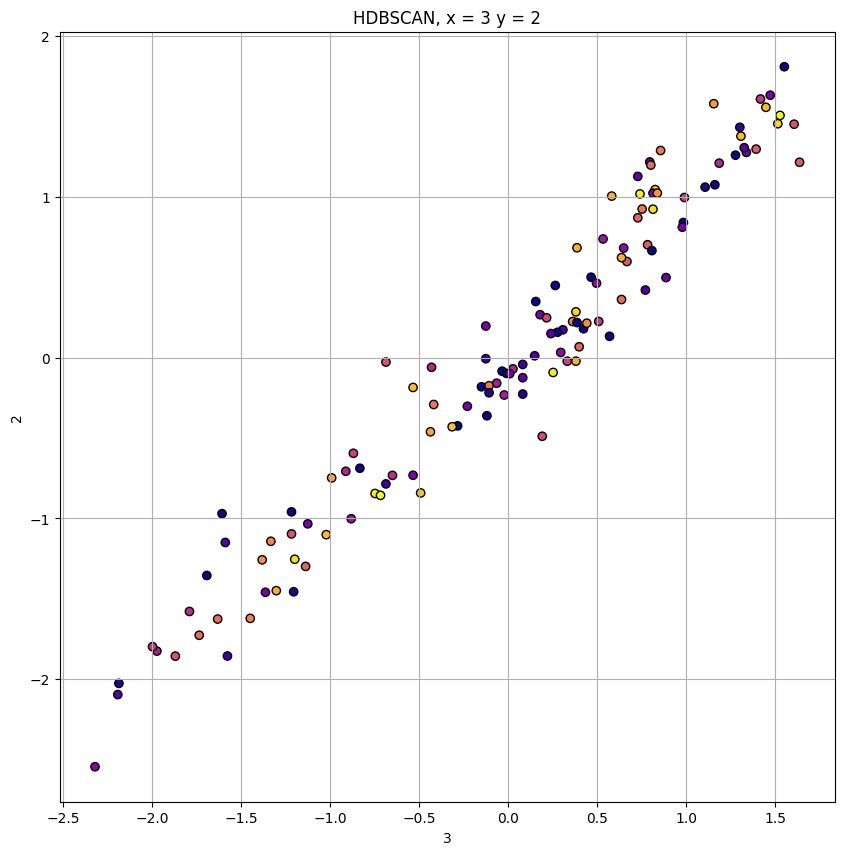

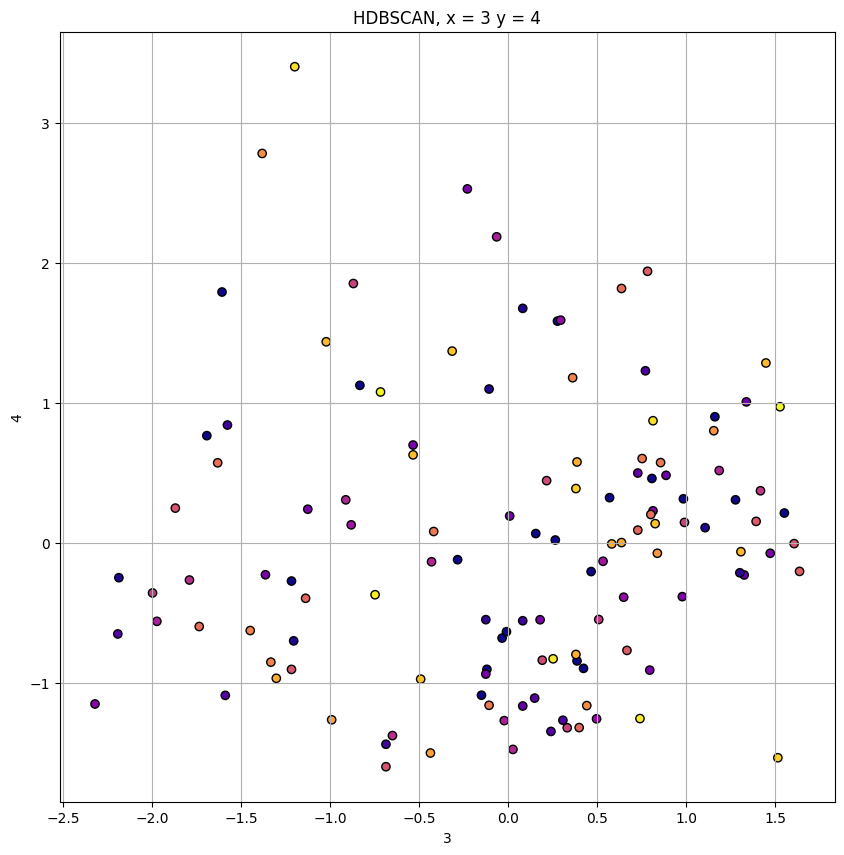

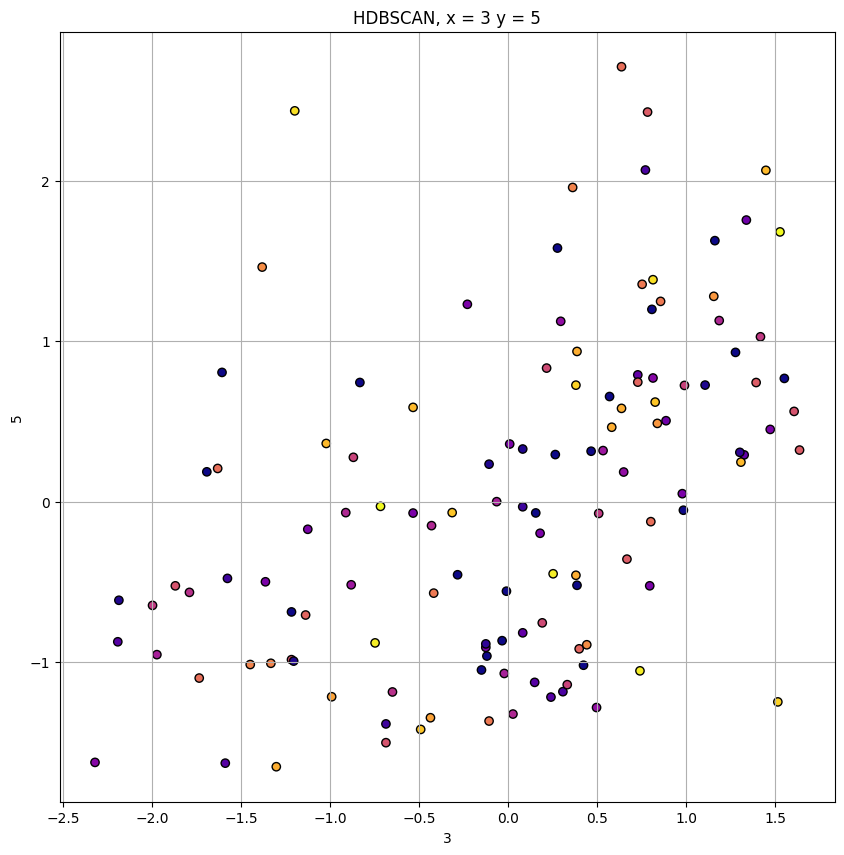

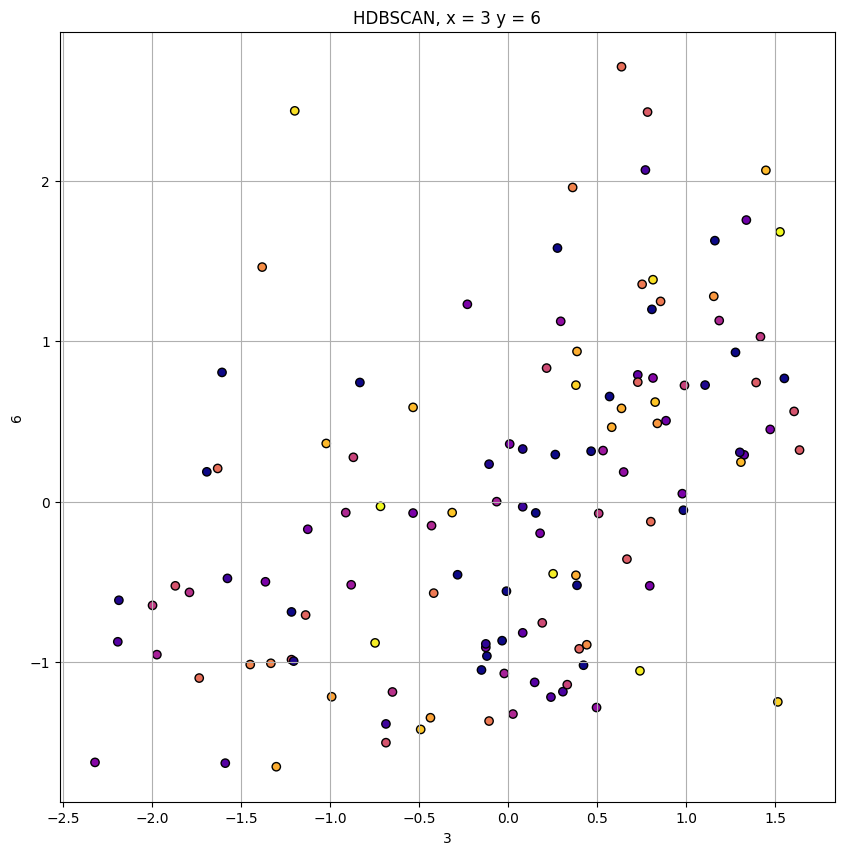

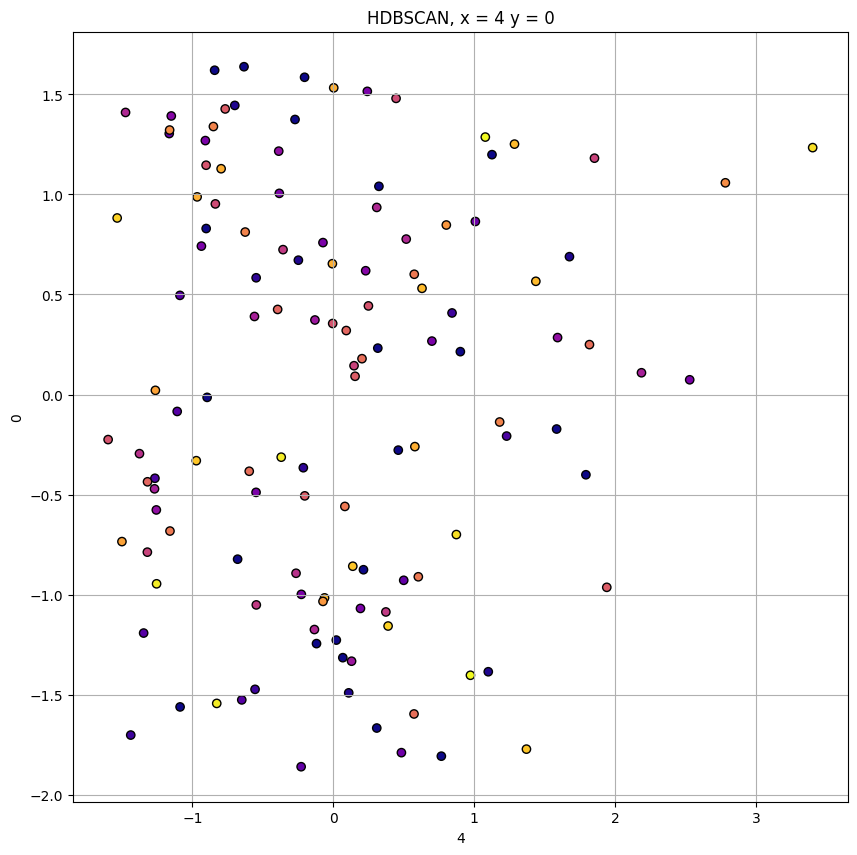

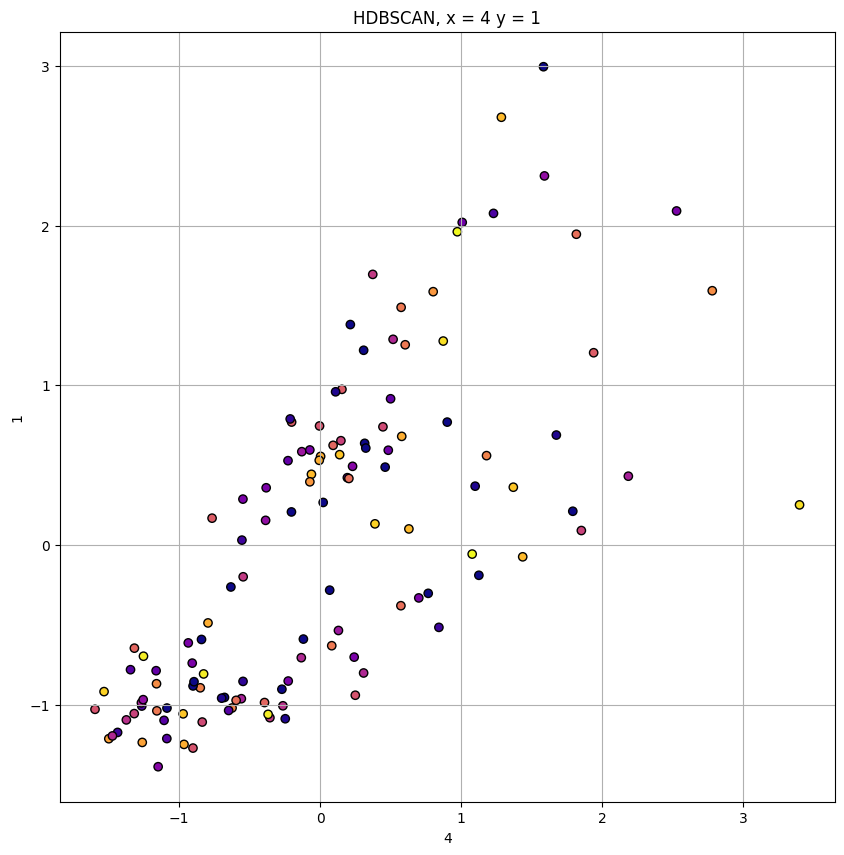

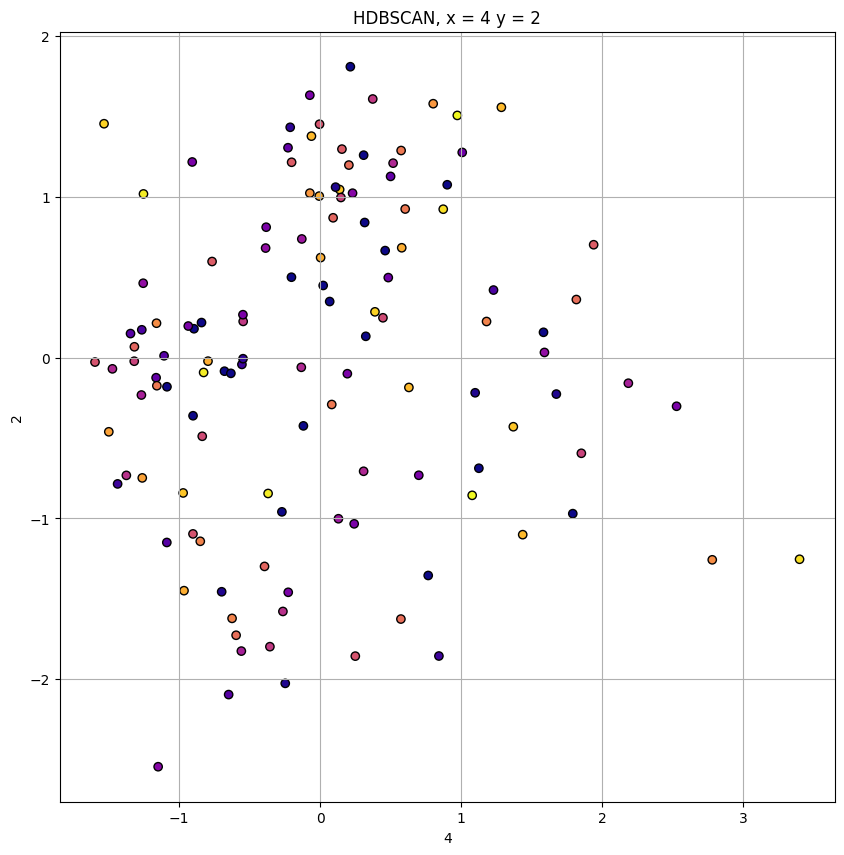

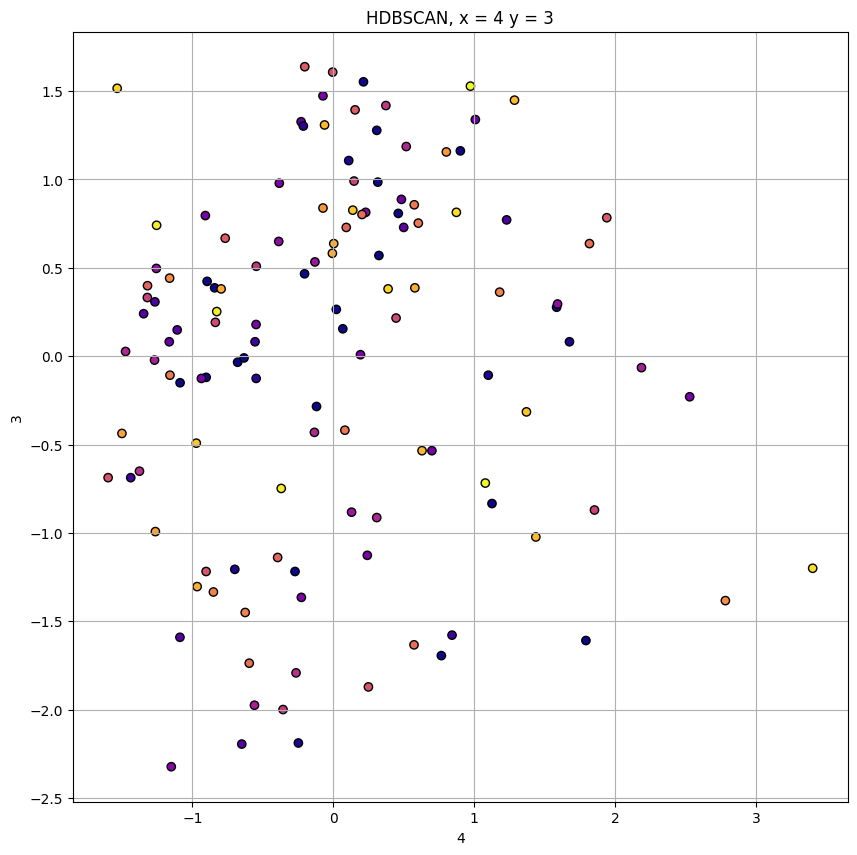

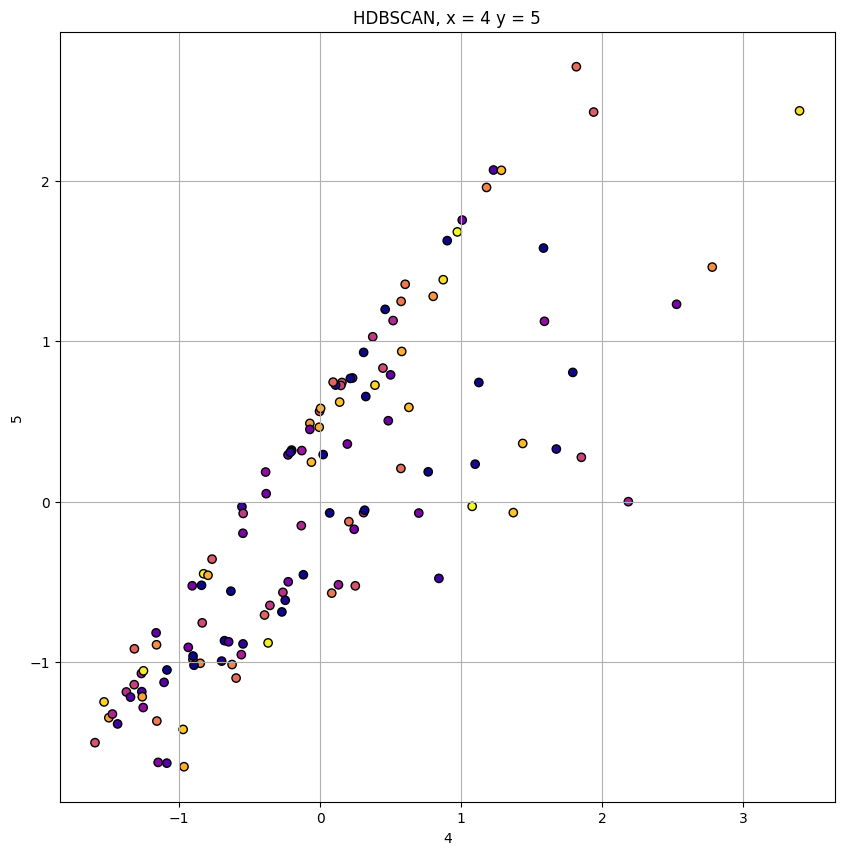

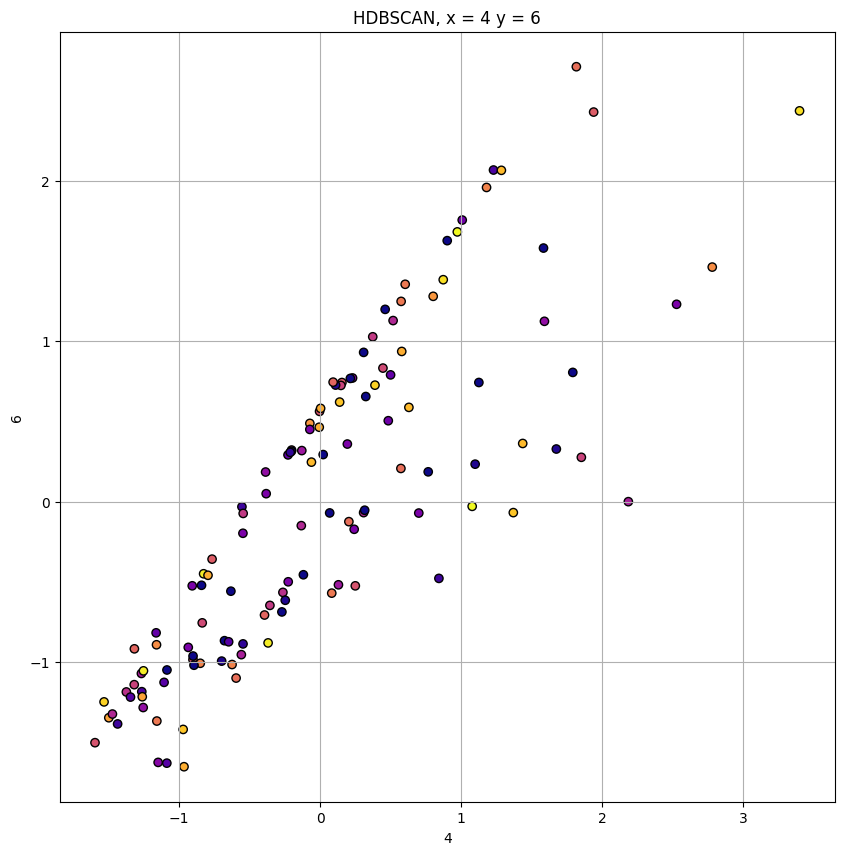

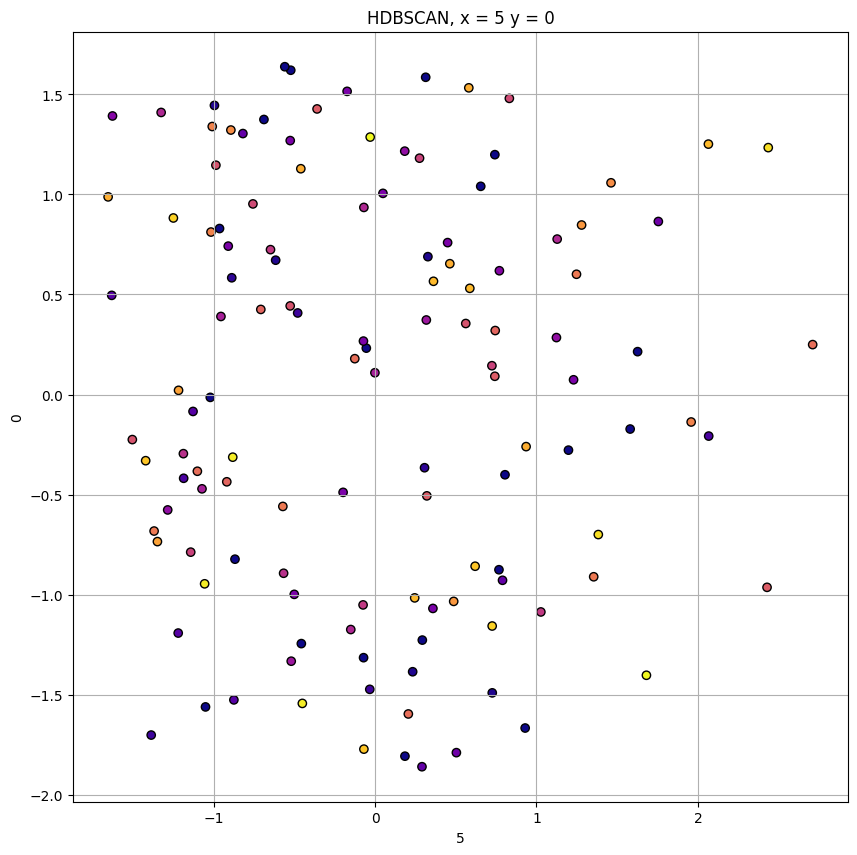

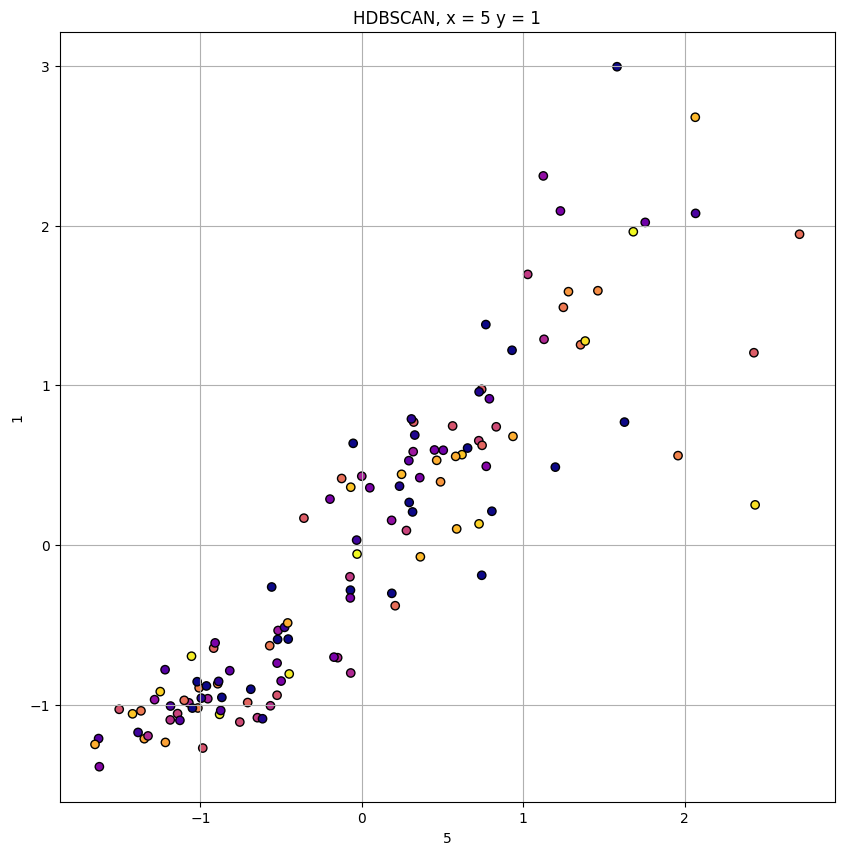

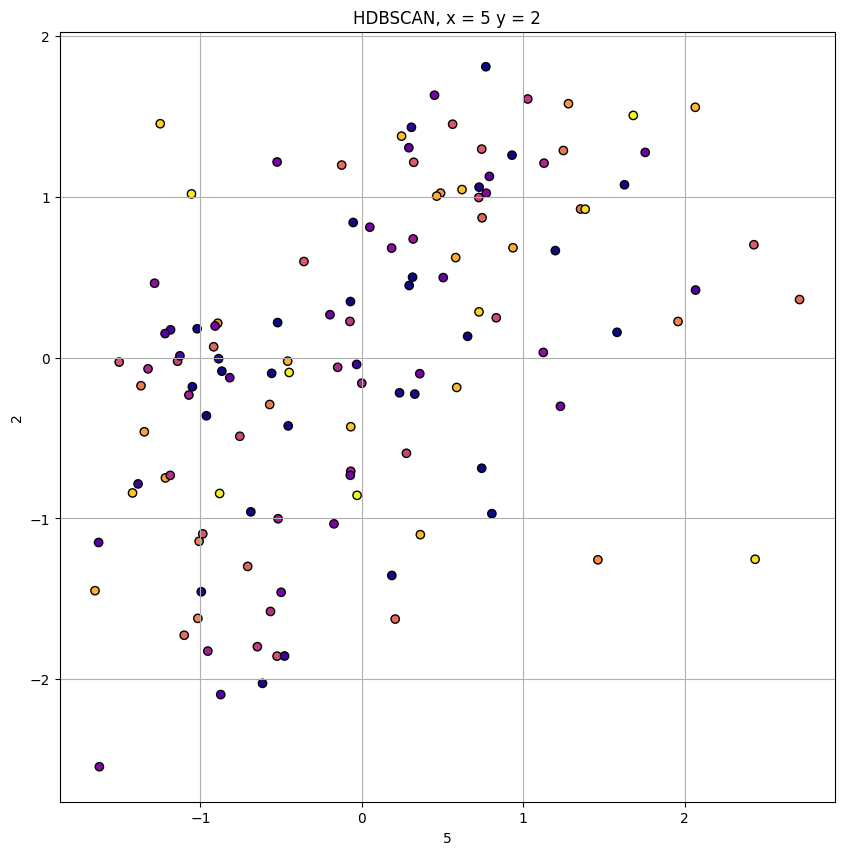

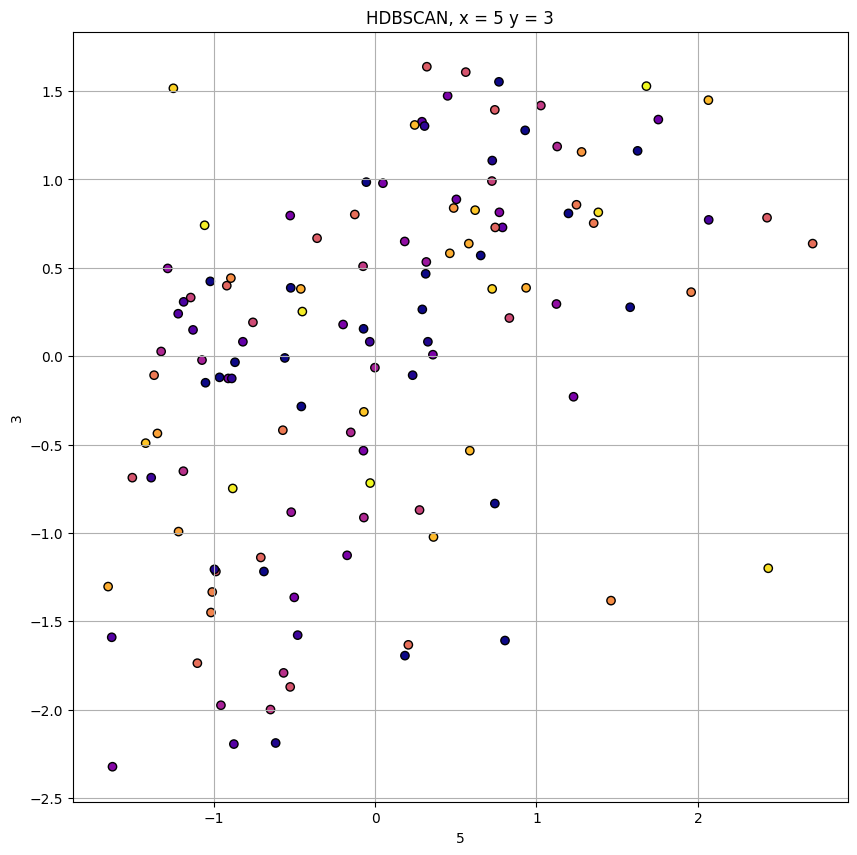

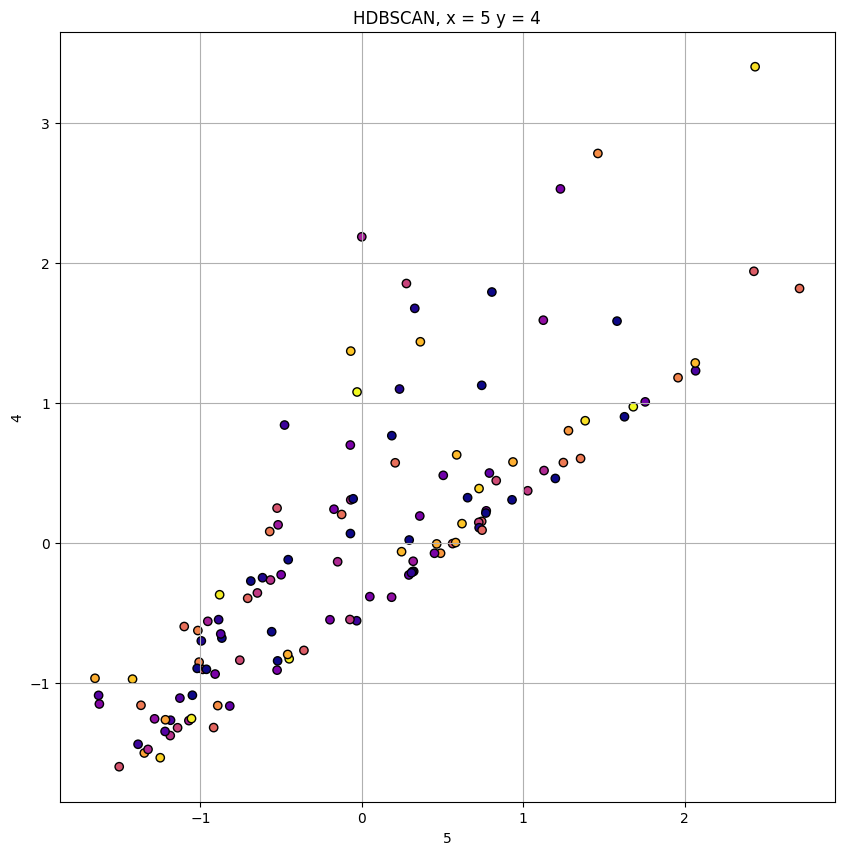

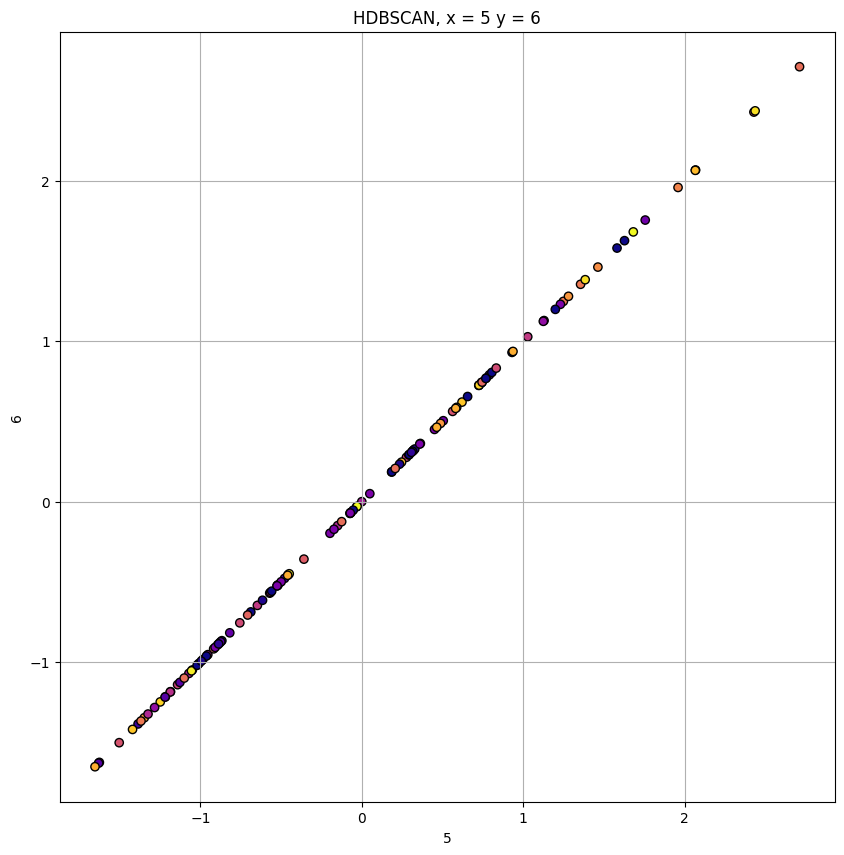

In [51]:
for i in range(0,6):
    for j in range(0,len(df.columns)):
        if i != j:
            plt.figure(figsize=(10,10))
            plt.scatter(df_scal[:,i],df_scal[:,j],c=hdbscan_lables,cmap='plasma',marker="o",edgecolors="black") # all rows of the column indicated by the number
            plt.grid(True)
            plt.xlabel(f"{i}")
            plt.ylabel(f"{j}")
            plt.title(f"HDBSCAN, x = {i} y = {j}")
            plt.show()

### BIRCH

In [ ]:
birch = Birch(n_clusters=4).fit(df_scal)
birchpred = birch.predict(df_scal)

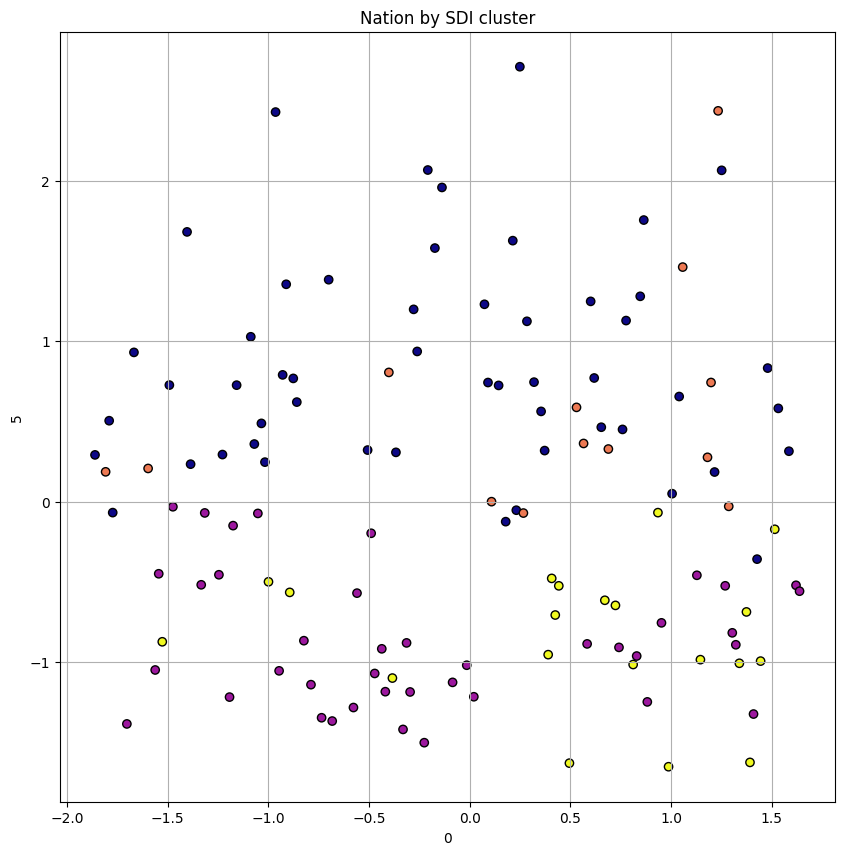

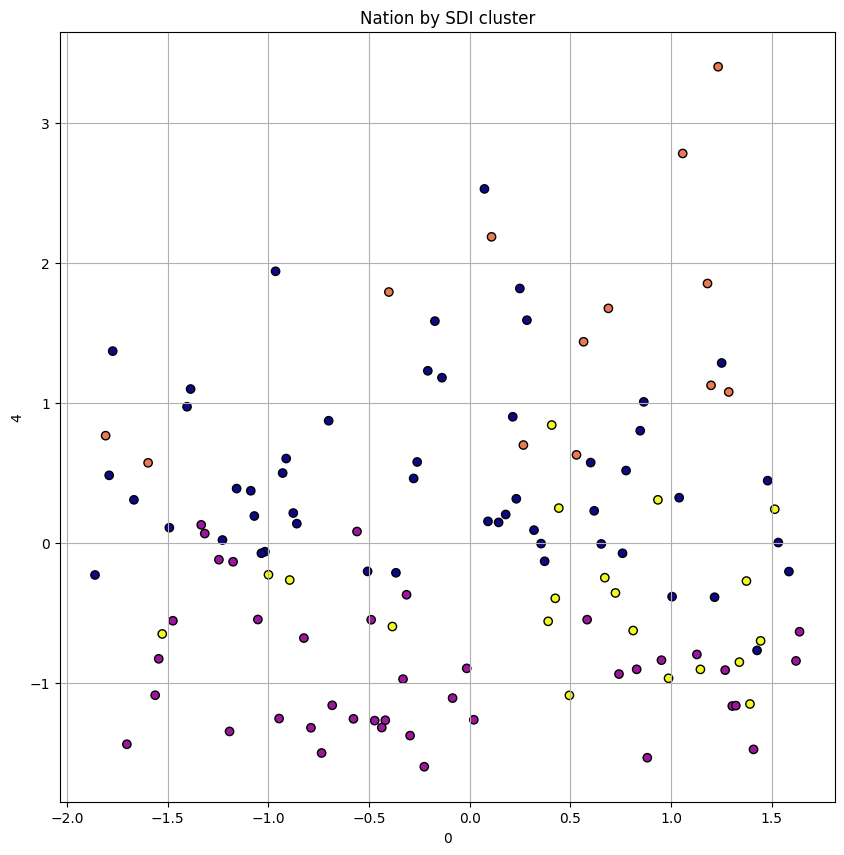

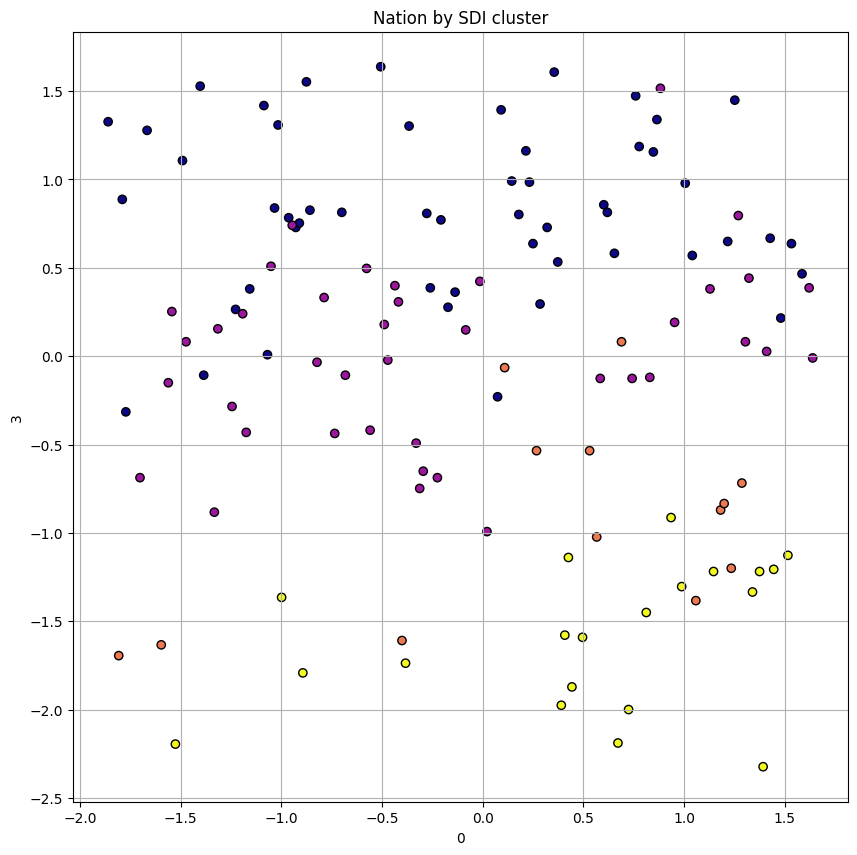

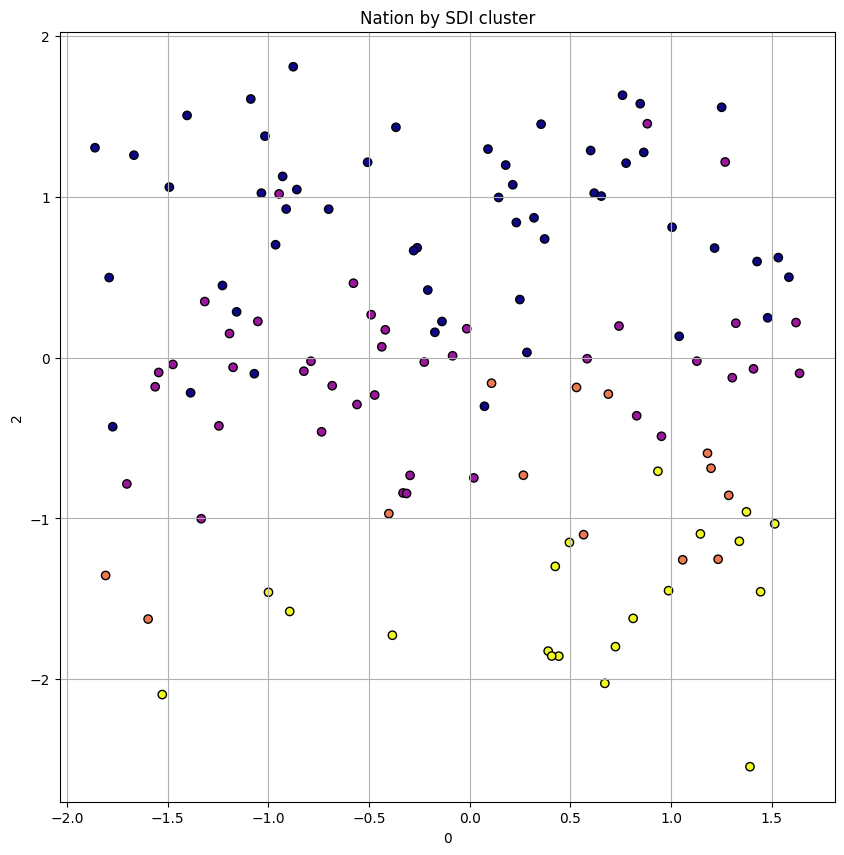

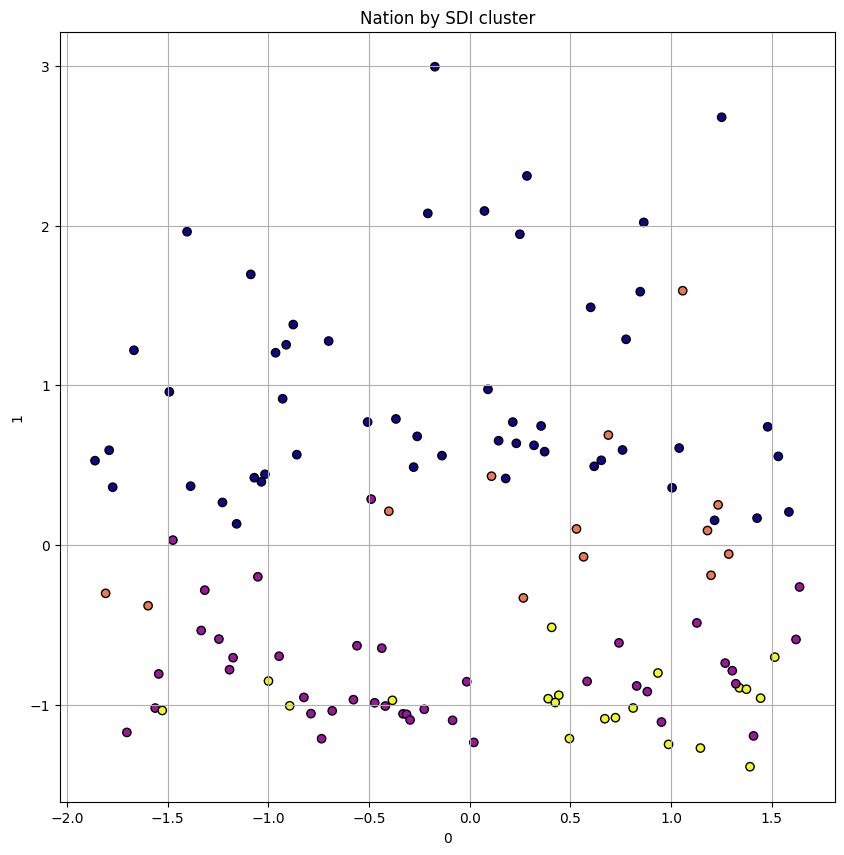

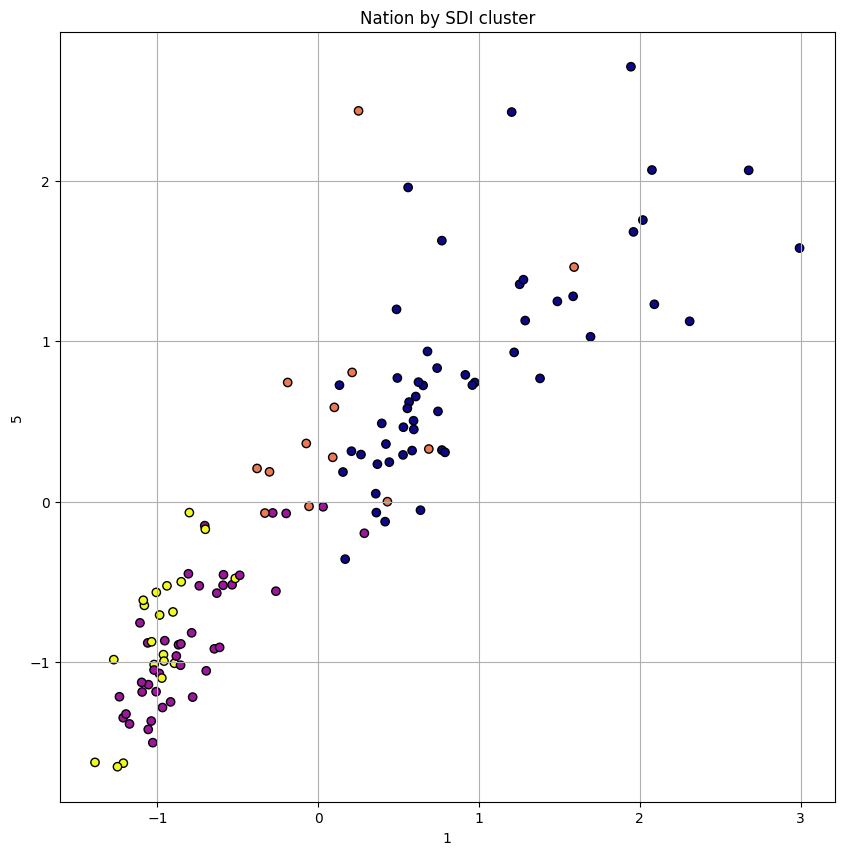

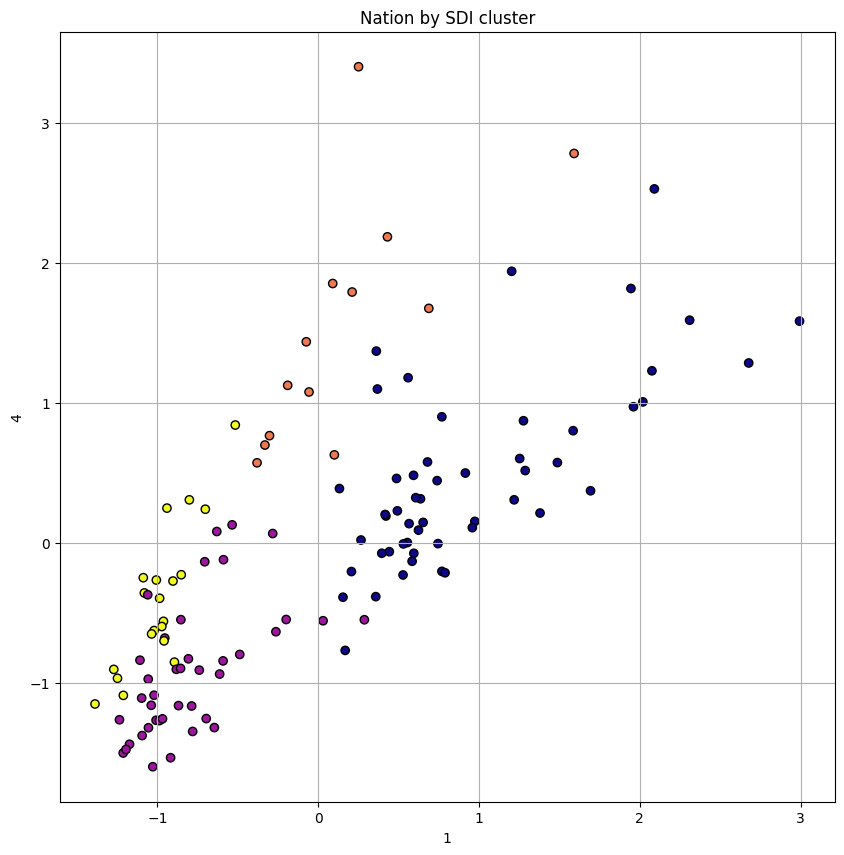

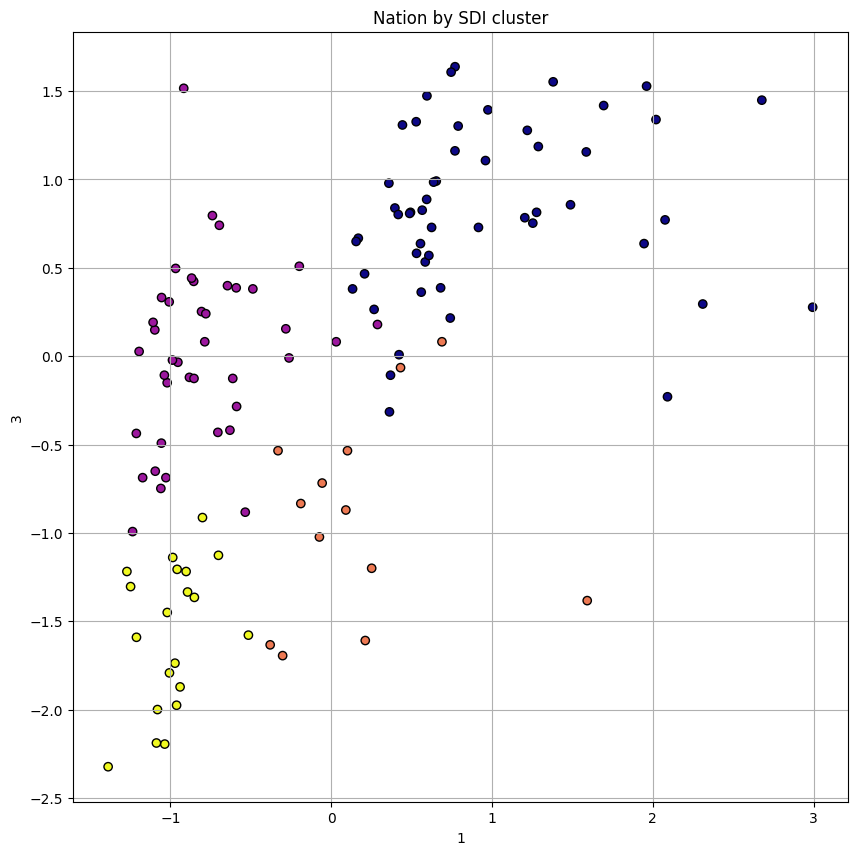

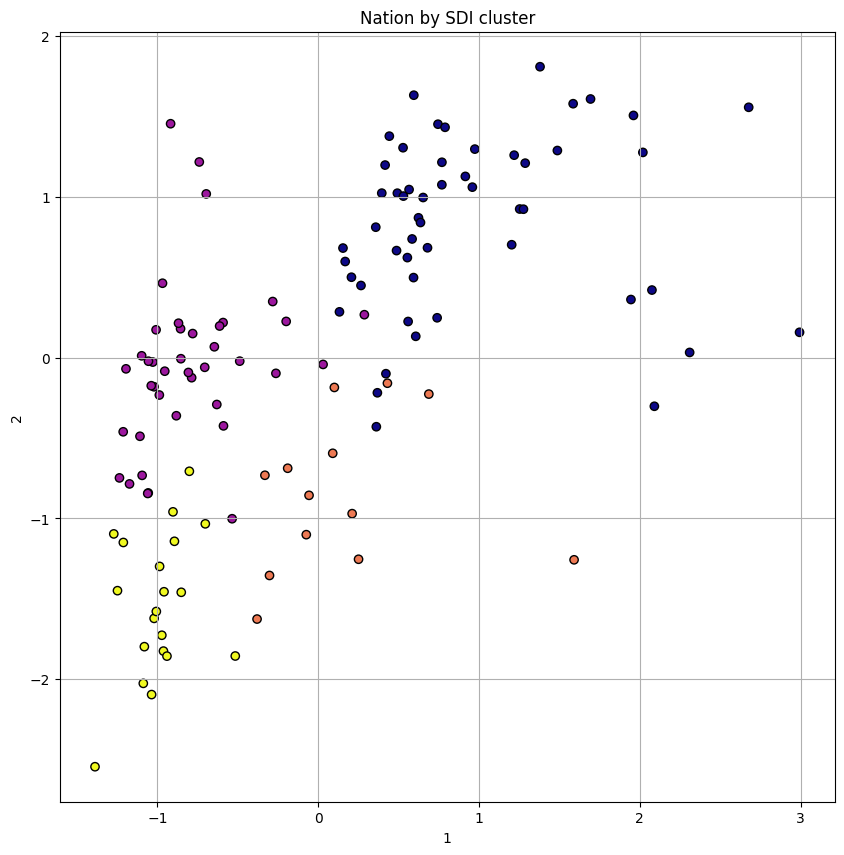

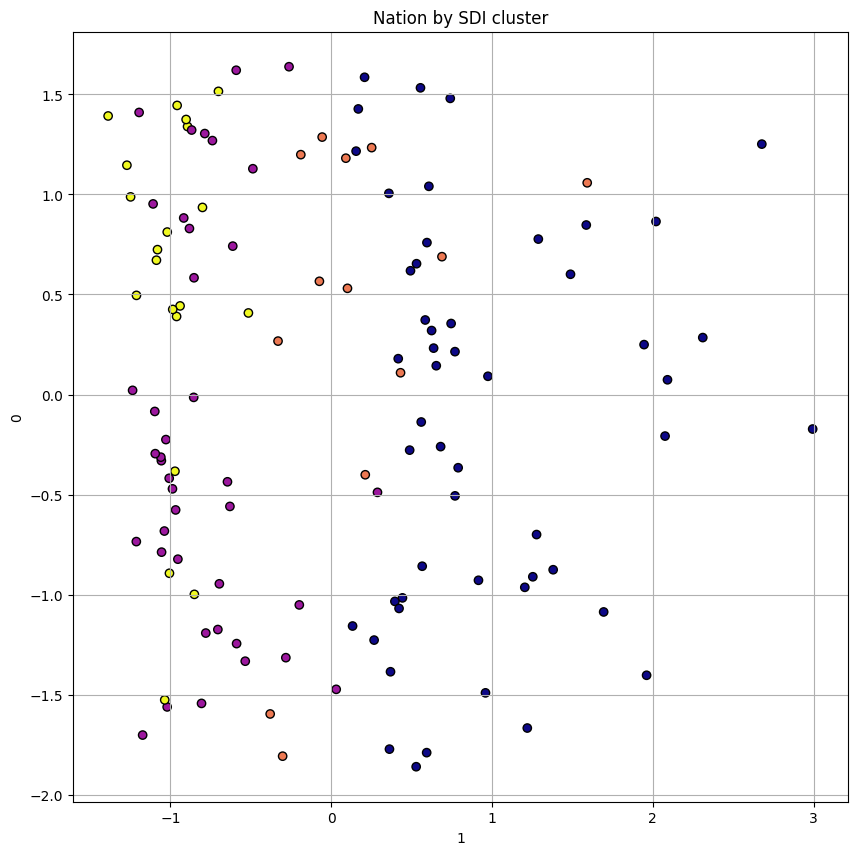

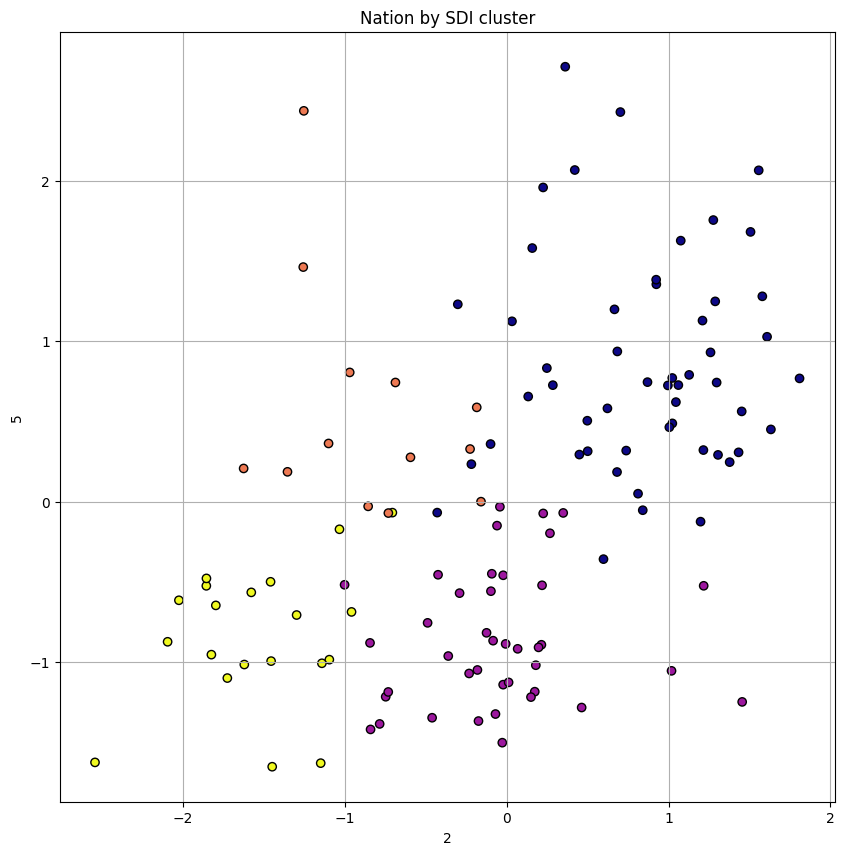

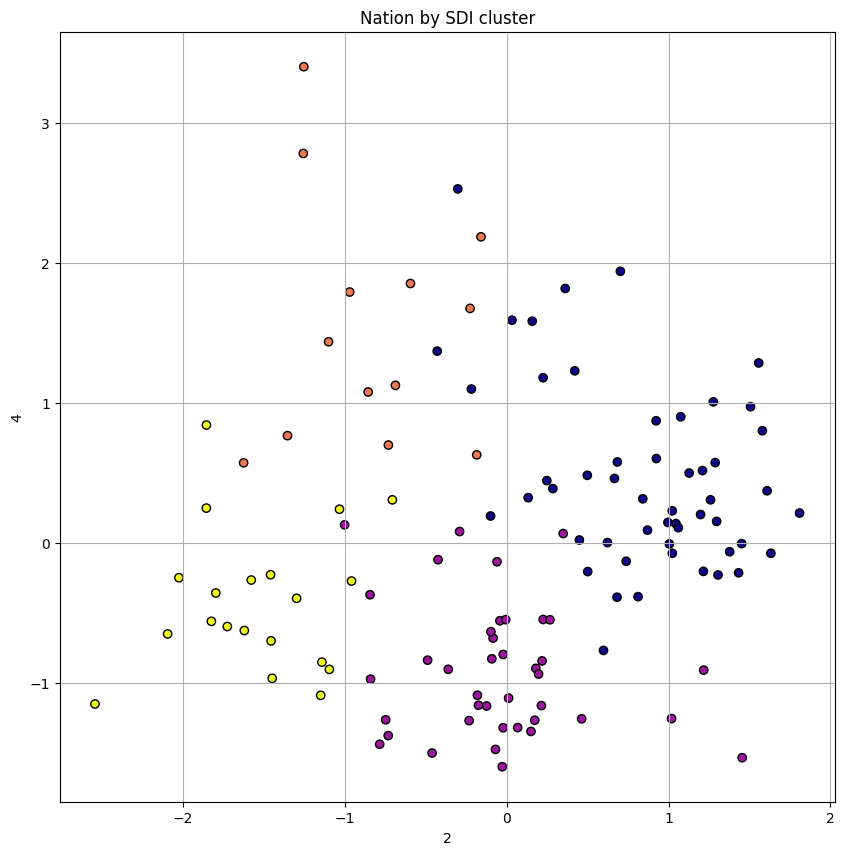

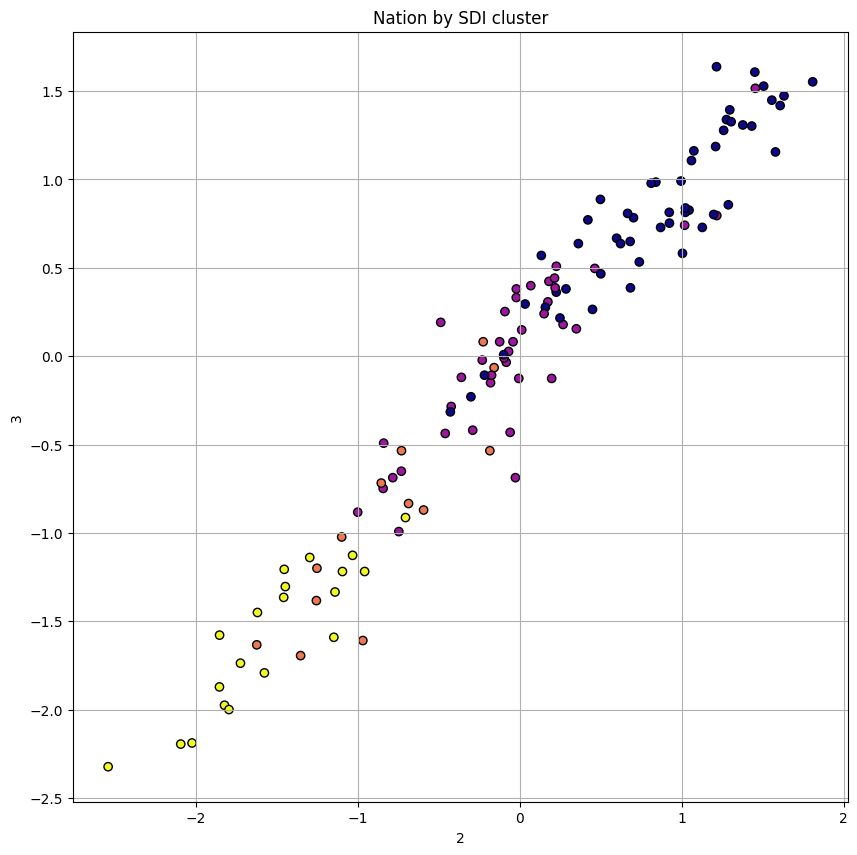

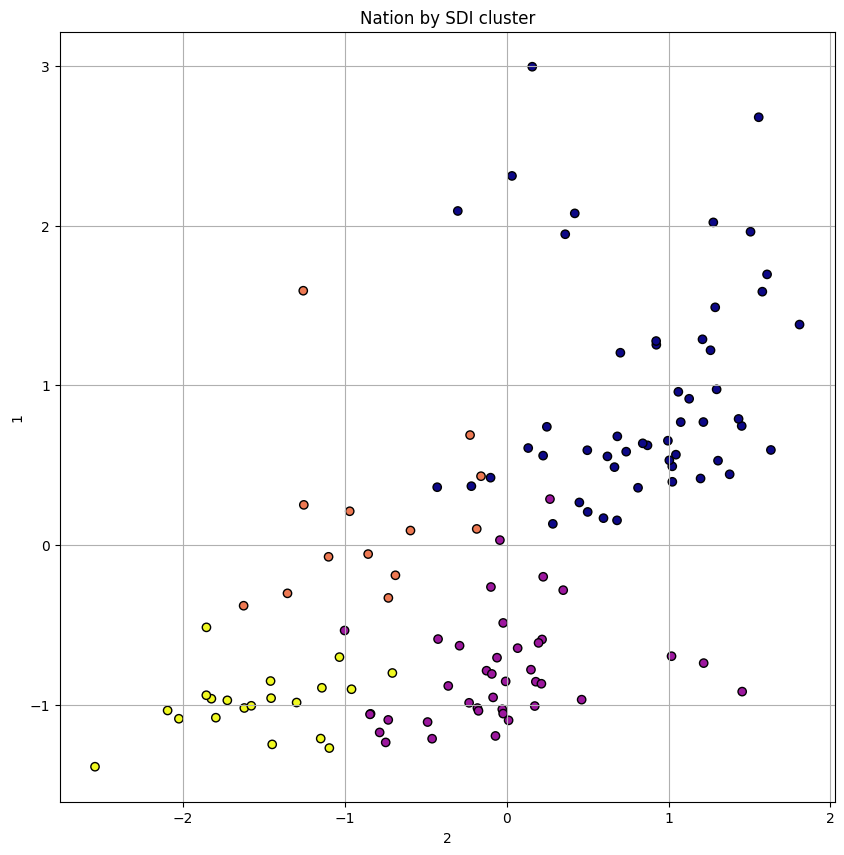

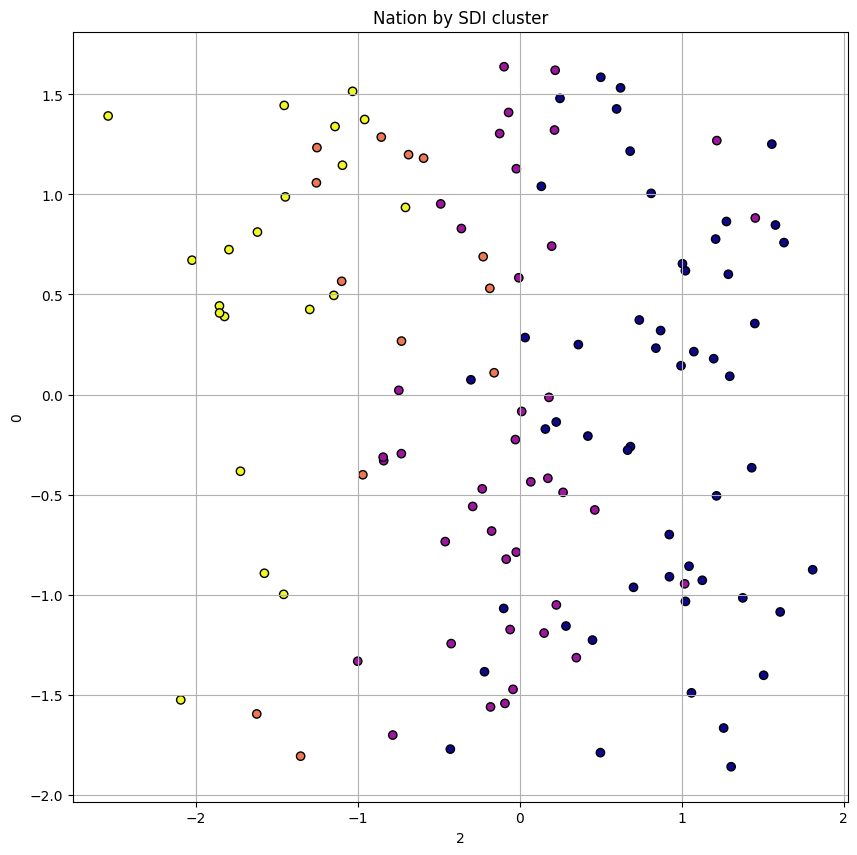

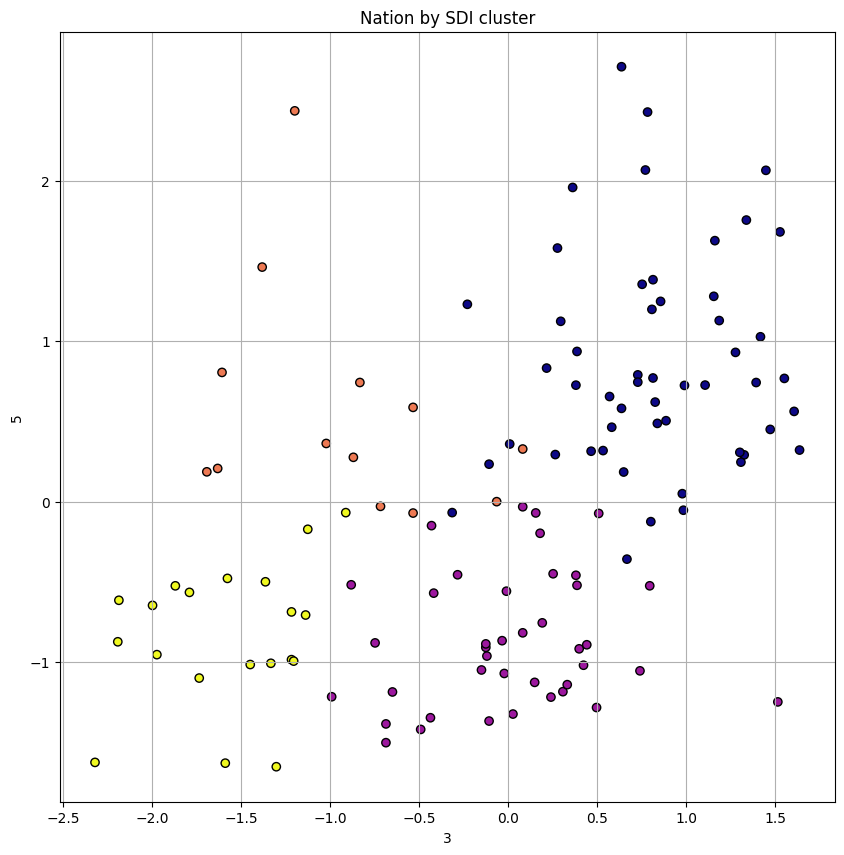

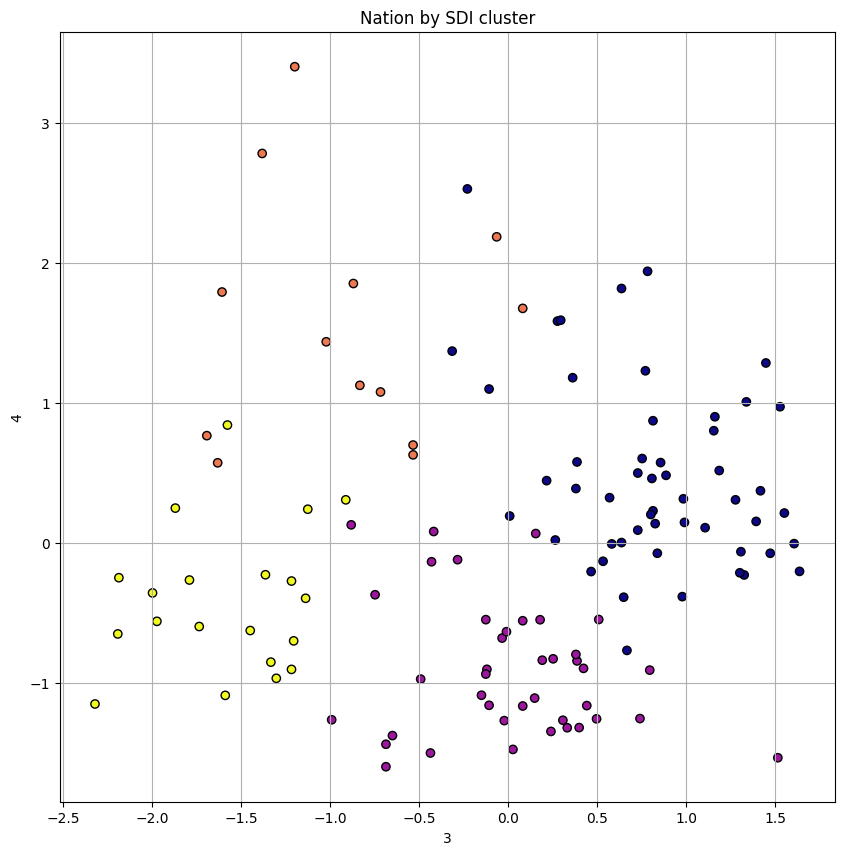

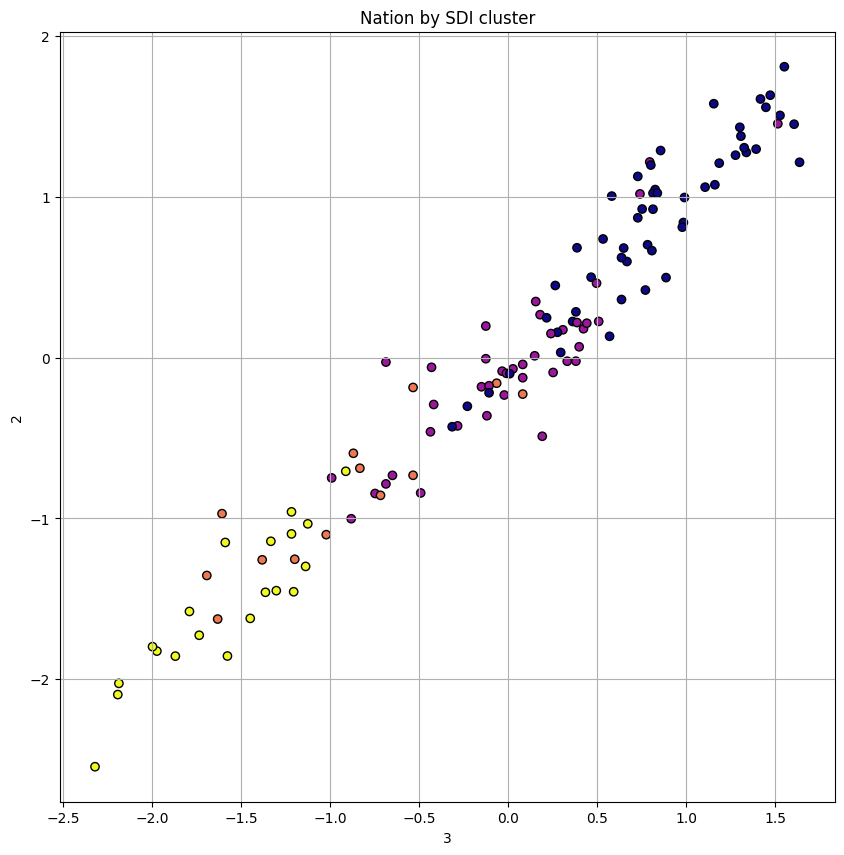

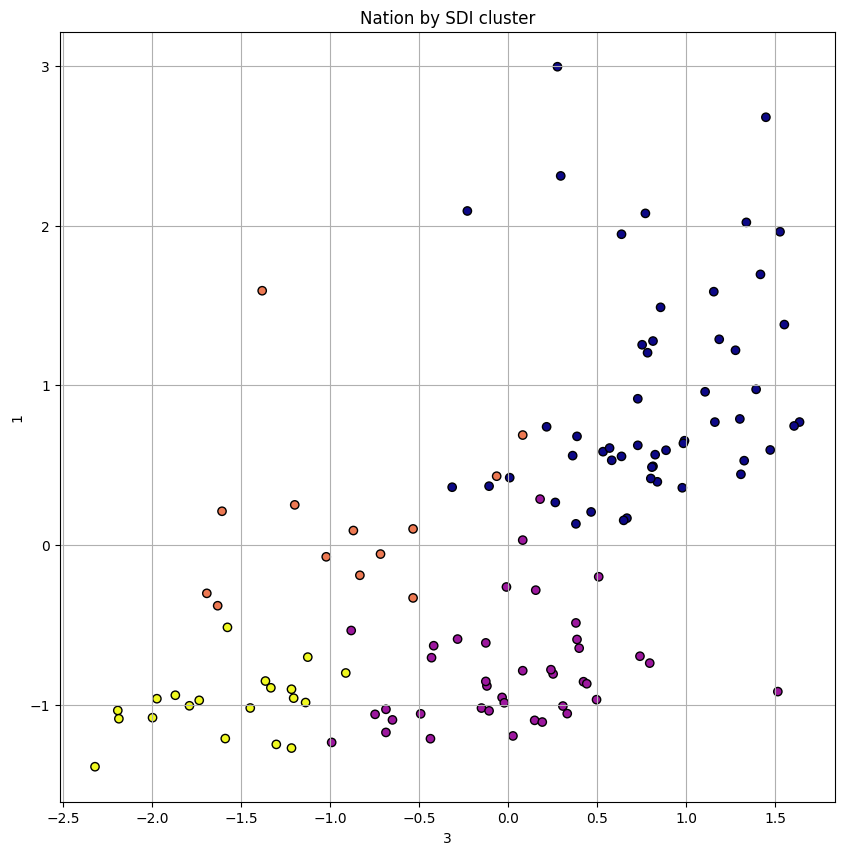

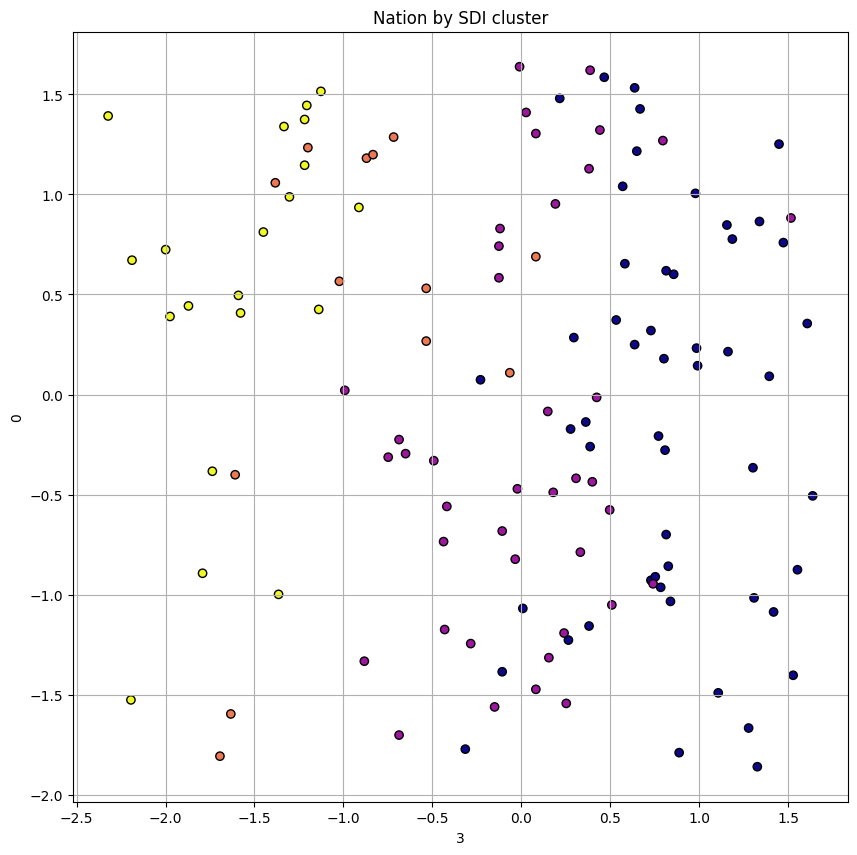

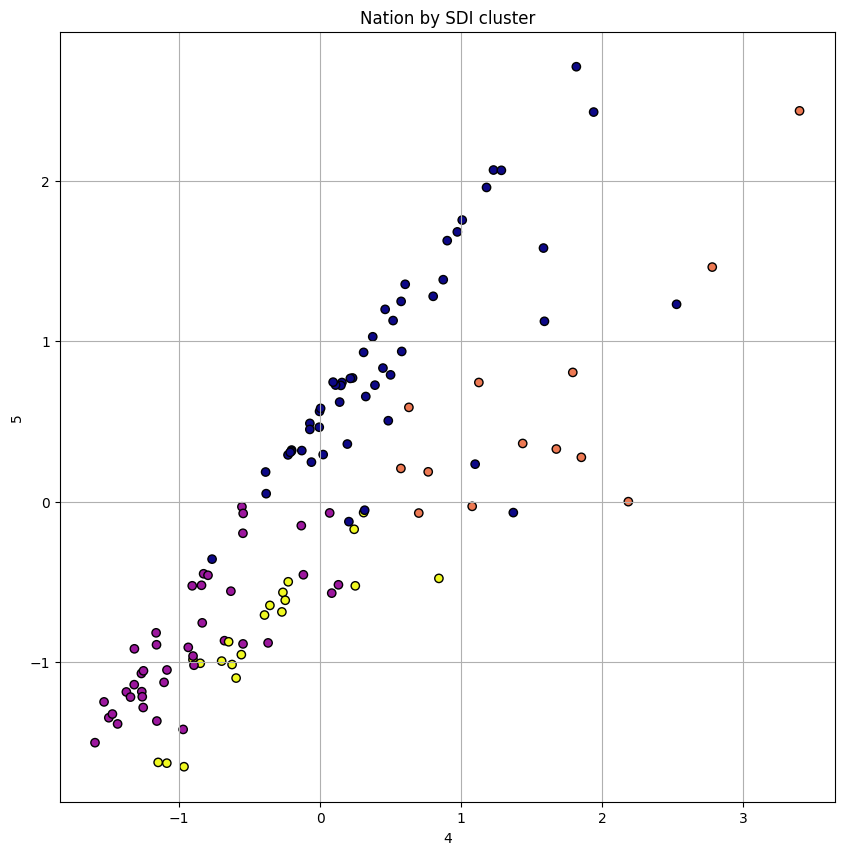

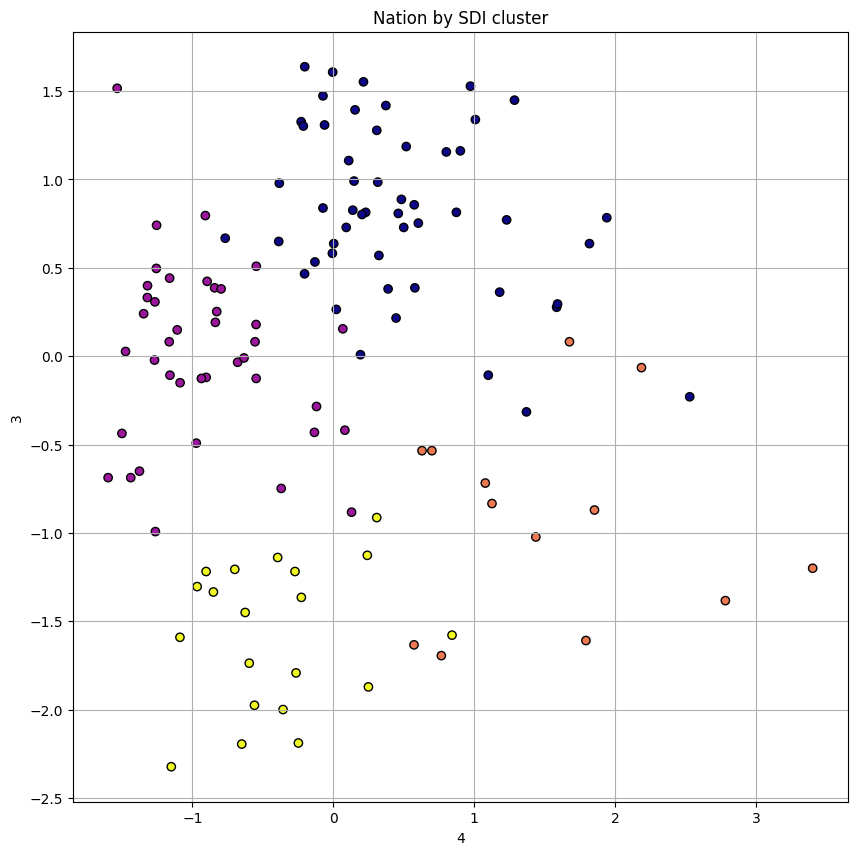

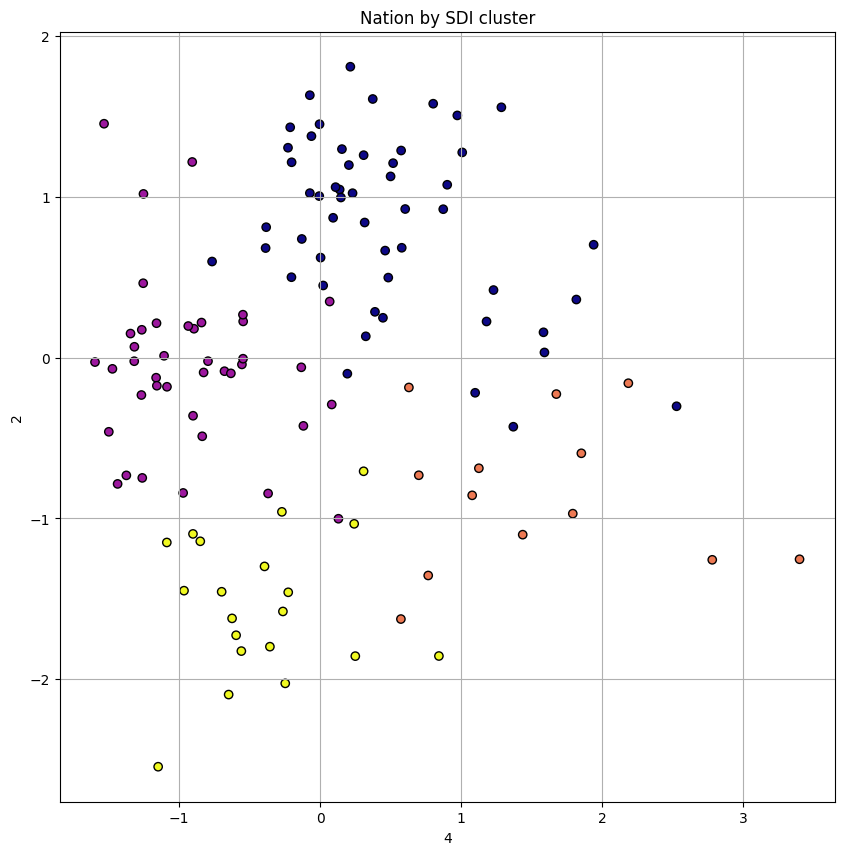

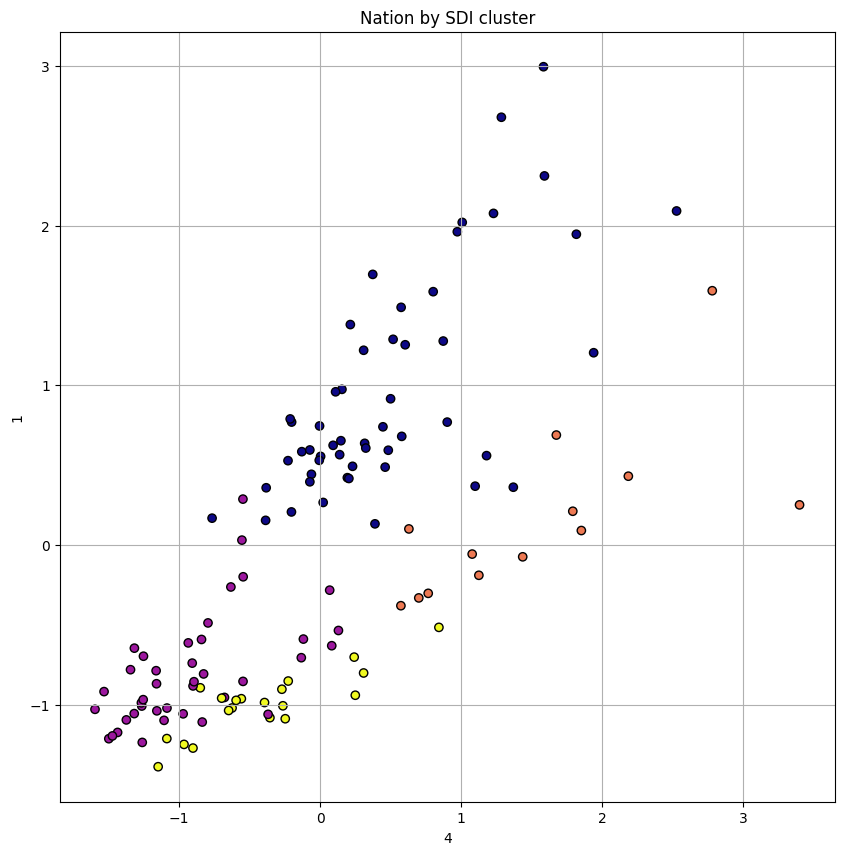

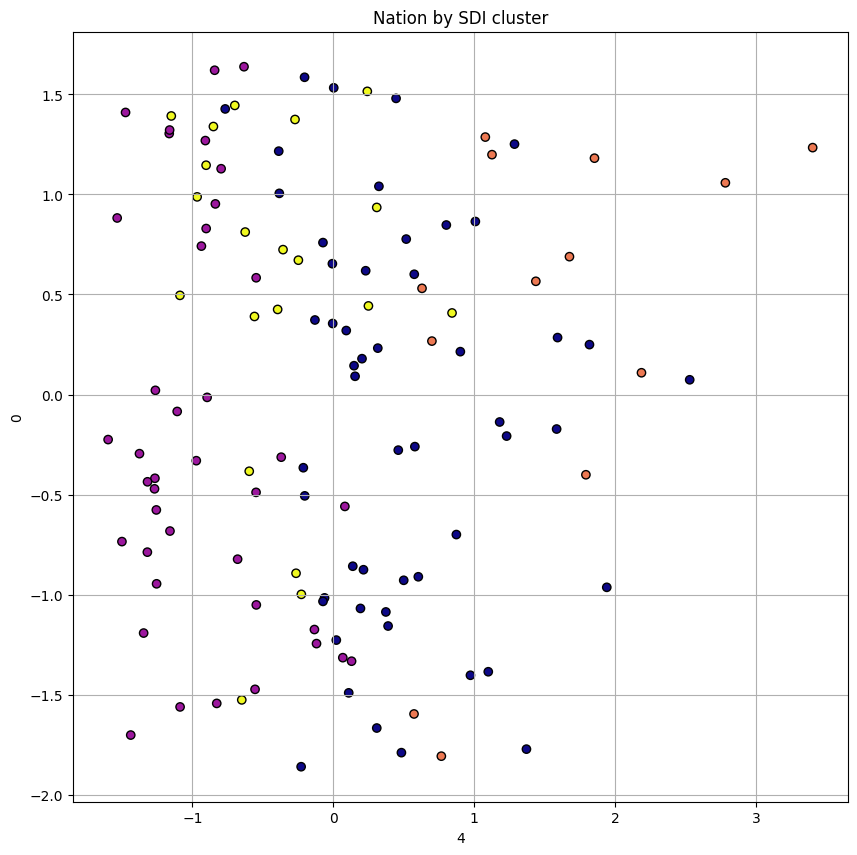

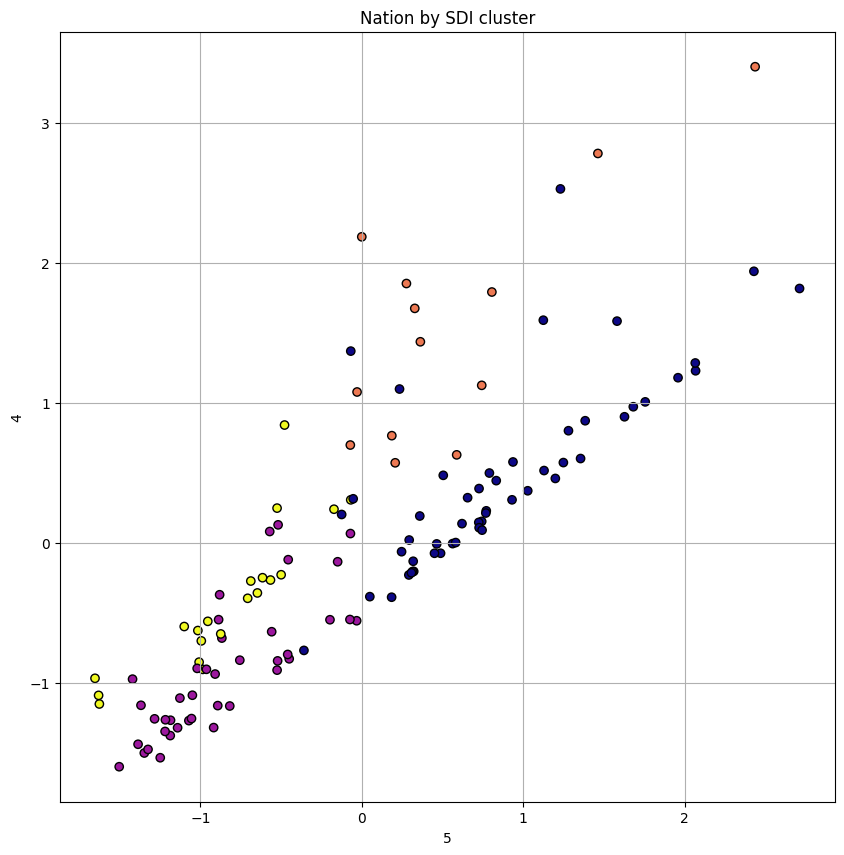

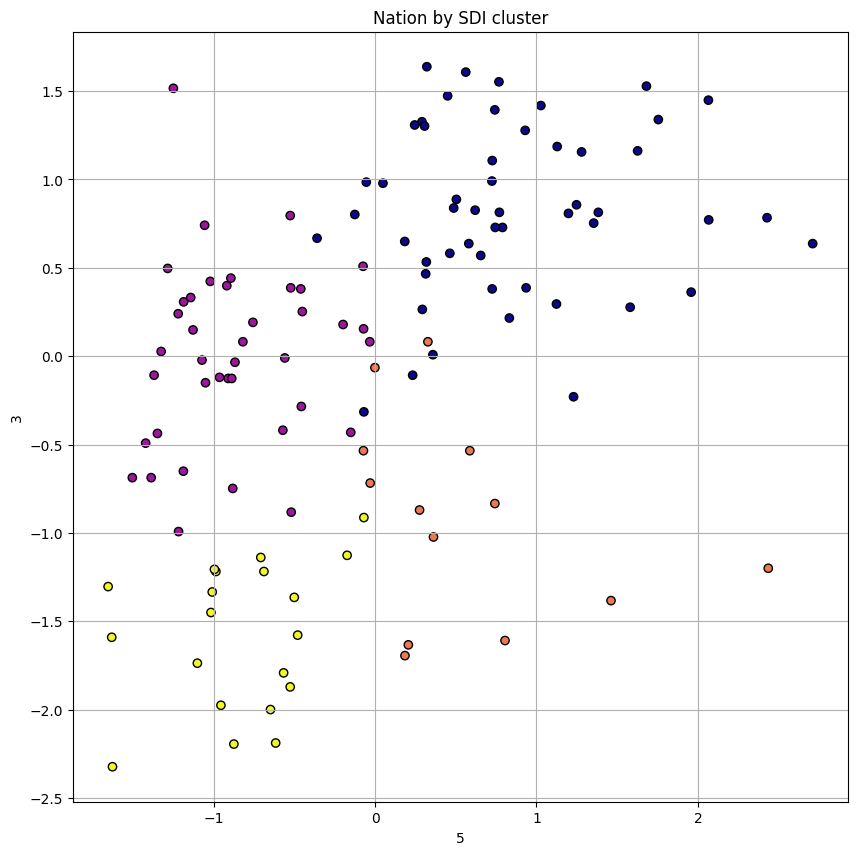

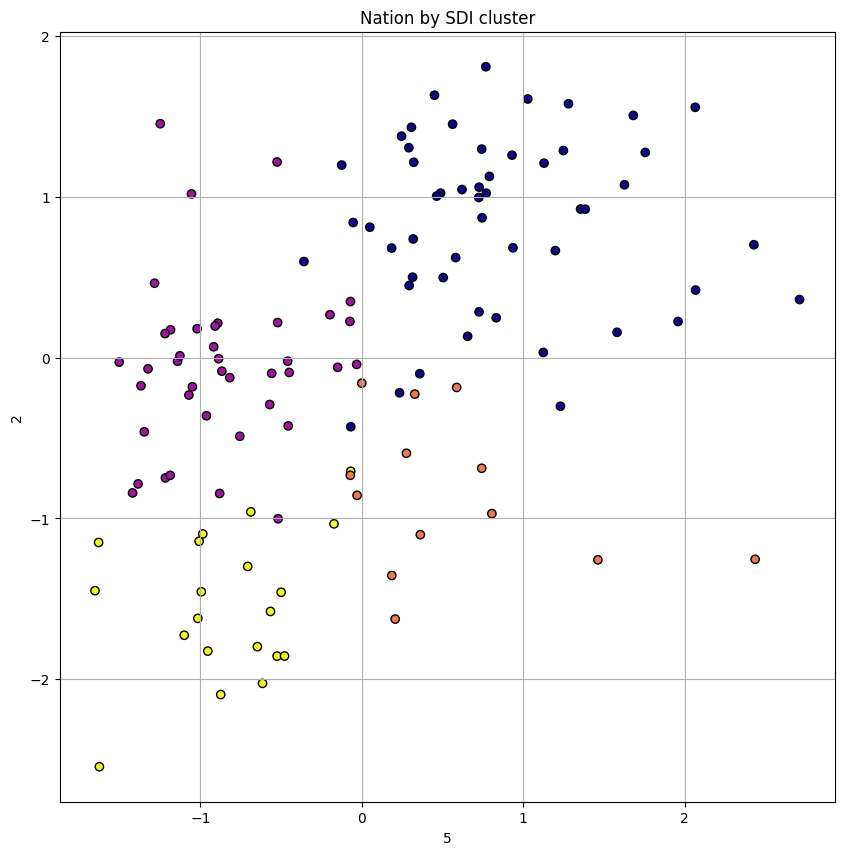

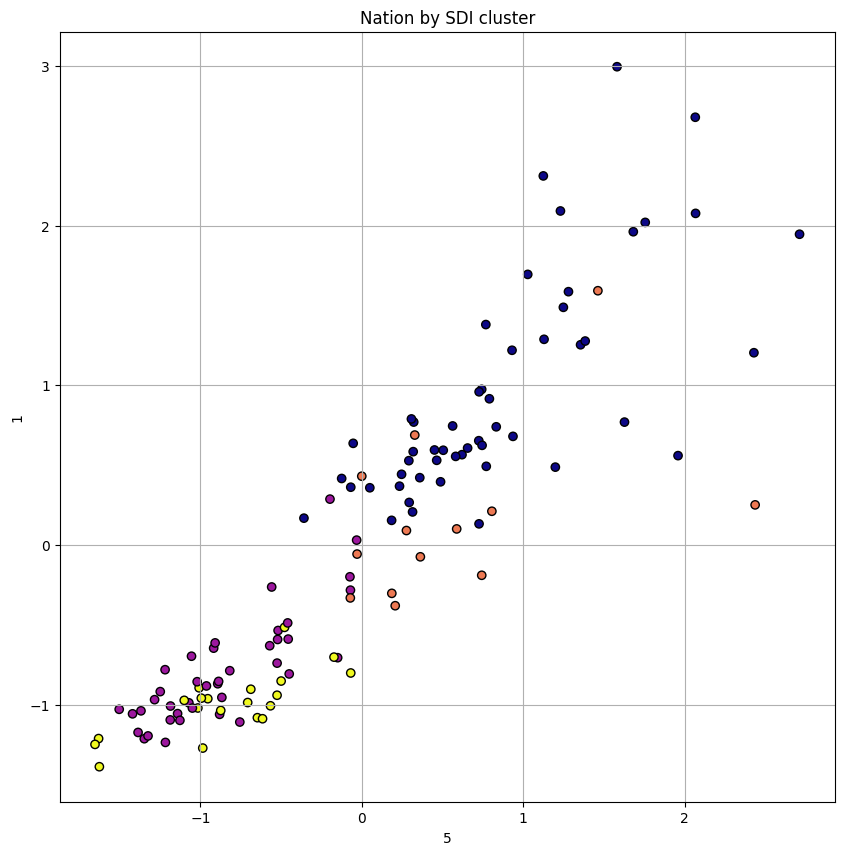

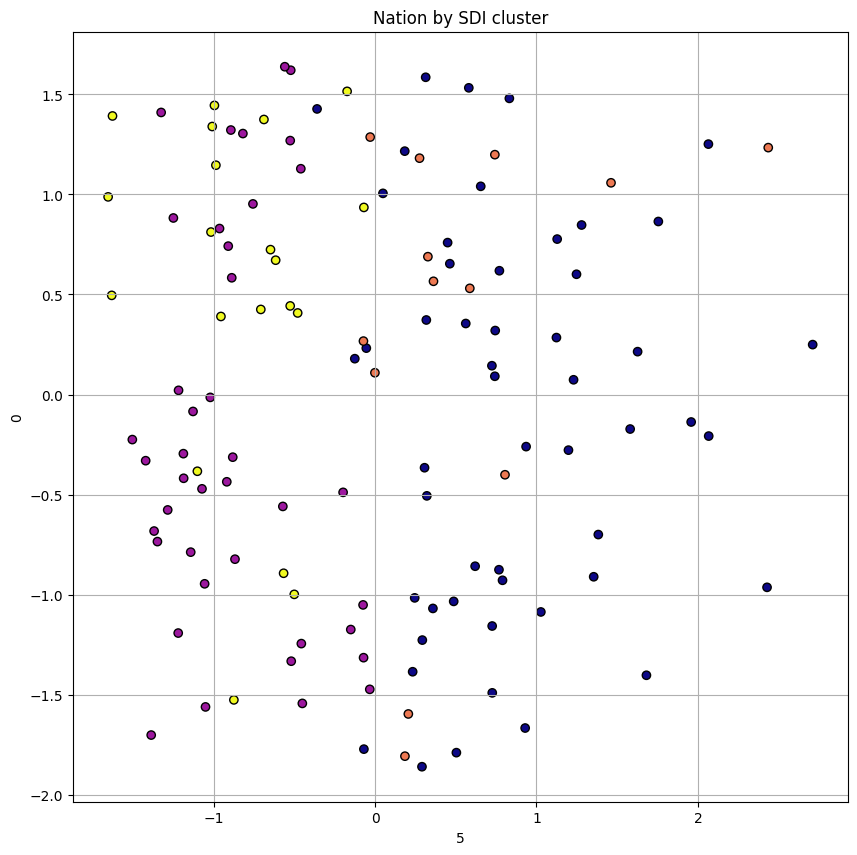

In [ ]:
for i in range(0,6):
    for j in range(0,len(df.columns)):
        if i !=j:
            plt.figure(figsize=(10,10))
            plt.scatter(df_scal[:,i],df_scal[:,j],c=birchpred,cmap='plasma',marker="o",edgecolors="black") # all rows of the column indicated by the number
            plt.grid(True)
            plt.xlabel(f"{i}")
            plt.ylabel(f"{j}")
            plt.title("Nation by SDI cluster")
            plt.show()
#5,1

### BisectingKMeans

In [ ]:
bisect_means = BisectingKMeans(n_clusters=3, random_state=0).fit(df)
bisect_means


BisectingKMeans(n_clusters=3, random_state=0)